# Network Buffer for Boulder, CO

# Import the library

# Follow the below link to install Geopanda


#https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

In [933]:
import time
start = time.time()
# First Run all these in command prompt cell to use geopanda
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3 geopandas

In [934]:
#conda activate geo_env


In [935]:
#python -m ipykernel install --user --name geo_env

In [936]:
import geopandas as gpd

In [937]:
import pandas as pd
from functools import reduce

In [938]:
import sys
'geopandas' in sys.modules

True

In [939]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt

In [940]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import networkx as nx
import osmnx as ox

In [941]:
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

# All inputs

# Inputr your Euclidean Buffer size or your GIS Customize buffer file Here

In [942]:
#buffer size in meter
#size=804.672 #in m, this input is also required for area conversation

In [943]:
# Import streetlight and strava
ss=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/all-aadbt-final-all.csv")
ss=ss[ss["region"]=="Boulder"]
ss=ss[ss["year"]==2019]
ss=ss.drop_duplicates(subset='site_id')
ss.head()

site_id                      site_name sensor_type  year   region  \
125  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
126  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
127  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
128  P004BOU            Folsom at South St.   permanent  2019  Boulder   
129  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

     travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
125             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
126             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
127             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
128             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
129             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

      longitude                                            comment  
125 -105.283132                                                NaN  
126 -105.263103                                                NaN  
127 -105.263773  obsolete OSM link parallel to street link (Id=...  
128 -105.263097                                                NaN  
129 -105.278436                                                NaN

In [944]:
# Get the count location 
c1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/sites_all_study_area.csv")
c1=c1[c1["region"]=="Boulder"]
c1=c1[c1["in_2019"]==1]
c1=c1[['site_id','osm_id_sensor']]
#c1=c1[c1["sensor_type"]=="permanent"]
c1.head(5)
# #print(c1.shape)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id  osm_id_sensor
199  P001BOU    385509341.0
200  P002BOU     43176757.0
201  P003BOU    439968204.0
202  P004BOU     43313642.0
203  P005BOU     46148772.0

In [945]:
# Import the non-fill buffer shape file
nf=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/Boulder-net-buff-60m-2019.shp")
nf.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


buff_dist  site_id                                           geometry
0       2.0  P001BOU  POLYGON ((932931.364 383272.613, 932925.476 38...
1       1.5  P001BOU  POLYGON ((932604.163 384468.500, 932603.606 38...
2       1.0  P001BOU  POLYGON ((933026.142 384656.422, 933021.114 38...
3      0.75  P001BOU  POLYGON ((933024.276 385089.293, 933019.235 38...
4       0.5  P001BOU  POLYGON ((933047.741 385555.734, 933046.241 38...

In [946]:
# merge by site_id
ss1=pd.merge(ss,c1, right_on='site_id', left_on='site_id',how='inner')
ss1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.283132                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor  
0    385509341.0  
1     43176757.0  
2    439968204.0  
3     43313642.0  
4     46148772.0

In [947]:
nf1=pd.merge(ss1,nf, left_on='site_id', right_on='site_id',how='inner')
nf1 = gpd.GeoDataFrame(nf1)
nf1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             3.0  206.745402  102.547945  14.027397    218.0  40.068772   

    longitude comment  osm_id_sensor buff_dist  \
0 -105.283132     NaN    385509341.0       2.0   
1 -105.283132     NaN    385509341.0       1.5   
2 -105.283132     NaN    385509341.0       1.0   
3 -105.283132     NaN    385509341.0      0.75   
4 -105.283132     NaN    385509341.0       0.5   

                                            geometry  
0  POLYGON ((932931.364 383272.613, 932925.476 38...  
1  POLYGON ((932604.163 384468.500, 932603.606 38...  
2  POLYGON ((933026.142 384656.422, 933021.114 38...  
3  POLYGON ((933024.276 385089.293, 933019.235 38...  
4  POLYGON ((933047.741 385555.734, 933046.241 38...

In [948]:
emerging_data=ss1.loc[:,['osm_id_sensor','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']]
emerging_data.columns=['osm_id','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']
emerging_data.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT     stv_adb  stv_c_adb  \
0  385509341.0  P001BOU   permanent  206.745402  102.547945  14.027397   
1   43176757.0  P002BOU   permanent  479.543452   29.739726  10.452055   
2  439968204.0  P003BOU   permanent  607.273809   52.397260  16.424658   
3   43313642.0  P004BOU   permanent  502.851786   29.904110   9.972603   
4   46148772.0  P005BOU   permanent  601.530238   20.808219   9.095890   

   stl_raw  
0    218.0  
1   5359.0  
2   4518.0  
3   3750.0  
4   2382.0

# Change your Buffer size Here

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


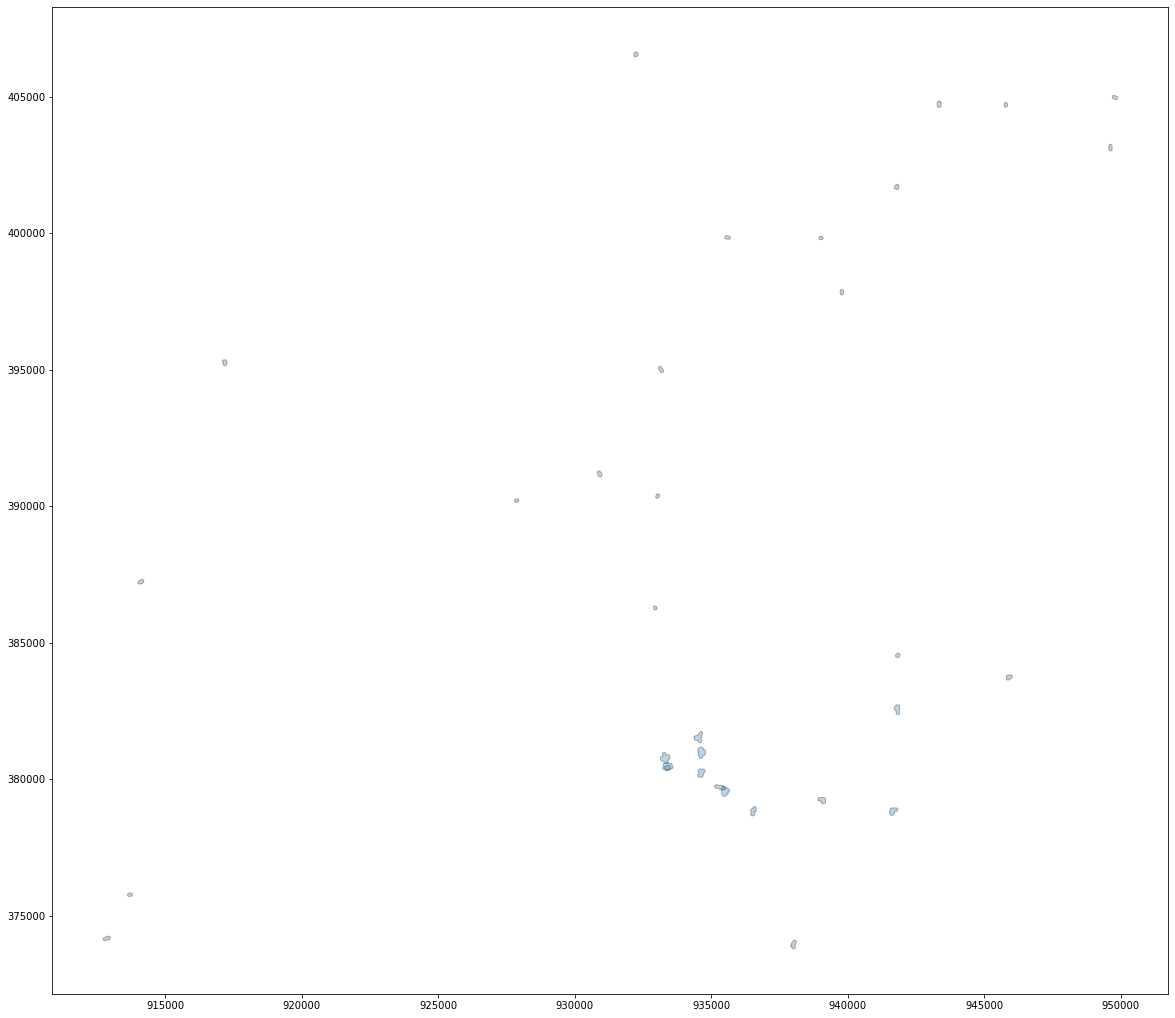

In [949]:
nf2=nf1[nf1['region']=='Boulder']
nf3=nf2[nf1['buff_dist']=='0.1']
ax = nf3.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [950]:
nf3.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
6   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
13  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
20  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
27  P004BOU            Folsom at South St.   permanent  2019  Boulder   
34  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
6              3.0  206.745402  102.547945  14.027397    218.0  40.068772   
13             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
20             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
27             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
34             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

     longitude                                            comment  \
6  -105.283132                                                NaN   
13 -105.263103                                                NaN   
20 -105.263773  obsolete OSM link parallel to street link (Id=...   
27 -105.263097                                                NaN   
34 -105.278436                                                NaN   

    osm_id_sensor buff_dist                                           geometry  
6     385509341.0       0.1  POLYGON ((933015.267 386267.072, 933016.151 38...  
13     43176757.0       0.1  POLYGON ((934593.545 380079.170, 934592.870 38...  
20    439968204.0       0.1  POLYGON ((934514.459 381424.312, 934510.984 38...  
27     43313642.0       0.1  POLYGON ((934679.736 380794.034, 934677.225 38...  
34     46148772.0       0.1  POLYGON ((933287.770 380620.105, 933281.882 38...

# Input the Strava Annual Network shape file here

In [951]:
strava=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/Boulder_Strava_modified.shp")
print(strava.crs)
# Define the current EPSG
strava = strava.set_crs("EPSG:4326")
# Let's take a copy of our layer
strava_proj = strava.copy()

# Reproject the geometries by replacing the values with projected ones
strava_proj = strava_proj.to_crs(epsg=2772)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


epsg:4326


# Input Bike share data here

bs1=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_01.csv")
bs2=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_02.csv")
bs3=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_03.csv")
bs4=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_04.csv")
bs5=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_05.csv")
bs6=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_06.csv")
bs7=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_07.csv")
bs8=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_08.csv")
bs9=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_09.csv")
bs10=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_10.csv")
bs11=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_11.csv")
bs12=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_12.csv")
bs_all=pd.concat([bs1,bs2,bs3,bs4,bs5,bs6,bs7,bs8,bs9,bs10,bs11,bs12],axis=0,ignore_index=True)
bs_all.head(5)

# Input OSM file here

In [952]:
# Input OSM land use shape file here
luse = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/landuse.shp")
# Define the current EPSG (normall for OSM this 3D EPSG code does not change)
lusec = luse.set_crs("EPSG:4326")


# Input OSM Natural shape file here
nature=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/natural.shp")
# Define the current EPSG
nature = nature.set_crs("EPSG:4326")

# Input OSM Point shape file here
pts=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/points.shp")
# Define the current EPSG
pts = pts.set_crs("EPSG:4326")

# Input the place of your study Area to calculate the intersection Density (city or county, Country)
#place="Oregon,USA"

# Input OSM road shape file here
road = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/roads.shp")
# Define the current EPSG
road = road.set_crs("EPSG:4326")

# Import OSM Building shape file to get CBD (City Hall)

In [953]:
# Input OSM road shape file here
building = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/buildings.shp")
print(building.crs)
# Define the current EPSG
building1 = building.set_crs("EPSG:4326")

epsg:4326


# Input NHGIS Block Group shape and CSV file here

In [954]:
# Input the block group shape file of your study area here
bg=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/CO_blck_grp_2018.shp")

# Input Race csv file here
race=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/race.csv")

# Input Age by Sex csv file here
gender=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/age by sex.csv")

# Input education csv file here
edu=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/Education attainment.csv")
# Import school enrollmemt 
scll=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/School Enrollment.csv")

# Input Median age csv file here
age=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/median_age.csv")

# Input Median House Hold income csv file here
income=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/median_hh_income.csv")

# Input House hold Type csv file here
hhdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/household_type.csv")

# Input Population csv file here
pdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/population.csv")

# Input Employment csv file here
edensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/employment.csv")

# Means of Transportation data
bike_commute=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/Bike_commute_co_2019_blck_grp.csv")

# Insert LEHD Job Data, WAC file

In [955]:
# Input job csv file here
Number_job=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/co_wac_S000_JT00_2018.csv")
Number_job.head(4)
# Input the block group shape file of your study area here
bg_lehd=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/tabblock2010_08_pophu.shp")


# Import slope file

In [956]:
eu = rasterio.open('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/boulderc.img')

# Weather data needs to input three things
1. Chrome driver link (no need for kaggle as it is already set)
2. Dates you want to extract the data (format: yyyy-m, for example, 2019-4)
3. page of weather underground from where you want to extract the data

Please change the dates and page link only for other sttudy area at weather section which you will find before the Random forest variable selections.

WGS84 Latitude/Longitude: "EPSG:4326"

UTM Zones (North): "EPSG:32633"

UTM Zones (South): "EPSG:32733

# Input Study Area Boundary Shape file here

In [957]:
BA_all=gpd.read_file('http://web.pdx.edu/~jbroach/bike-data-fusion/study_area_boundaries.geojson')

In [958]:
BA_all

fid     region              comment  epsg_local  \
0    1    Boulder                 None        2772   
1    2     Eugene                 None        2839   
2    3       Bend                 None        2839   
3    4  Charlotte                 None        3358   
4    5     Dallas                 None        2845   
5    6   Portland  metro planning area        2838   

                                            geometry  
0  MULTIPOLYGON (((-105.64858 40.06198, -105.6480...  
1  MULTIPOLYGON (((-123.73473 43.94406, -123.7392...  
2  MULTIPOLYGON (((-121.40550 44.39315, -121.4025...  
3  MULTIPOLYGON (((-80.74046 35.37771, -80.73779 ...  
4  MULTIPOLYGON (((-96.52941 32.54528, -96.52964 ...  
5  MULTIPOLYGON (((-123.13045 45.47864, -123.1307...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

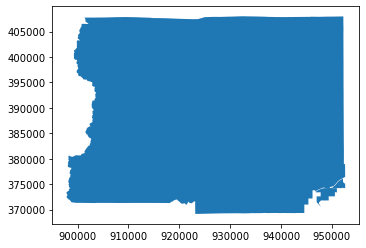

In [959]:
region = "Boulder"
# select regional boundary and transform to local coords for buffering
local_poly = BA_all[BA_all['region'] == region]
local_srid = int(local_poly['epsg_local'])
local_poly = local_poly.to_crs(local_srid)
local_poly.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

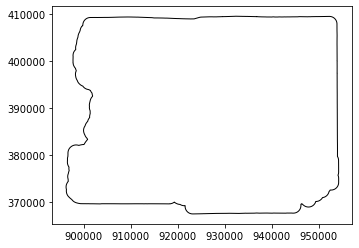

In [960]:
one_mile = 1609.34 # meters
pba = local_poly.buffer(one_mile)
pba.plot(color="none")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

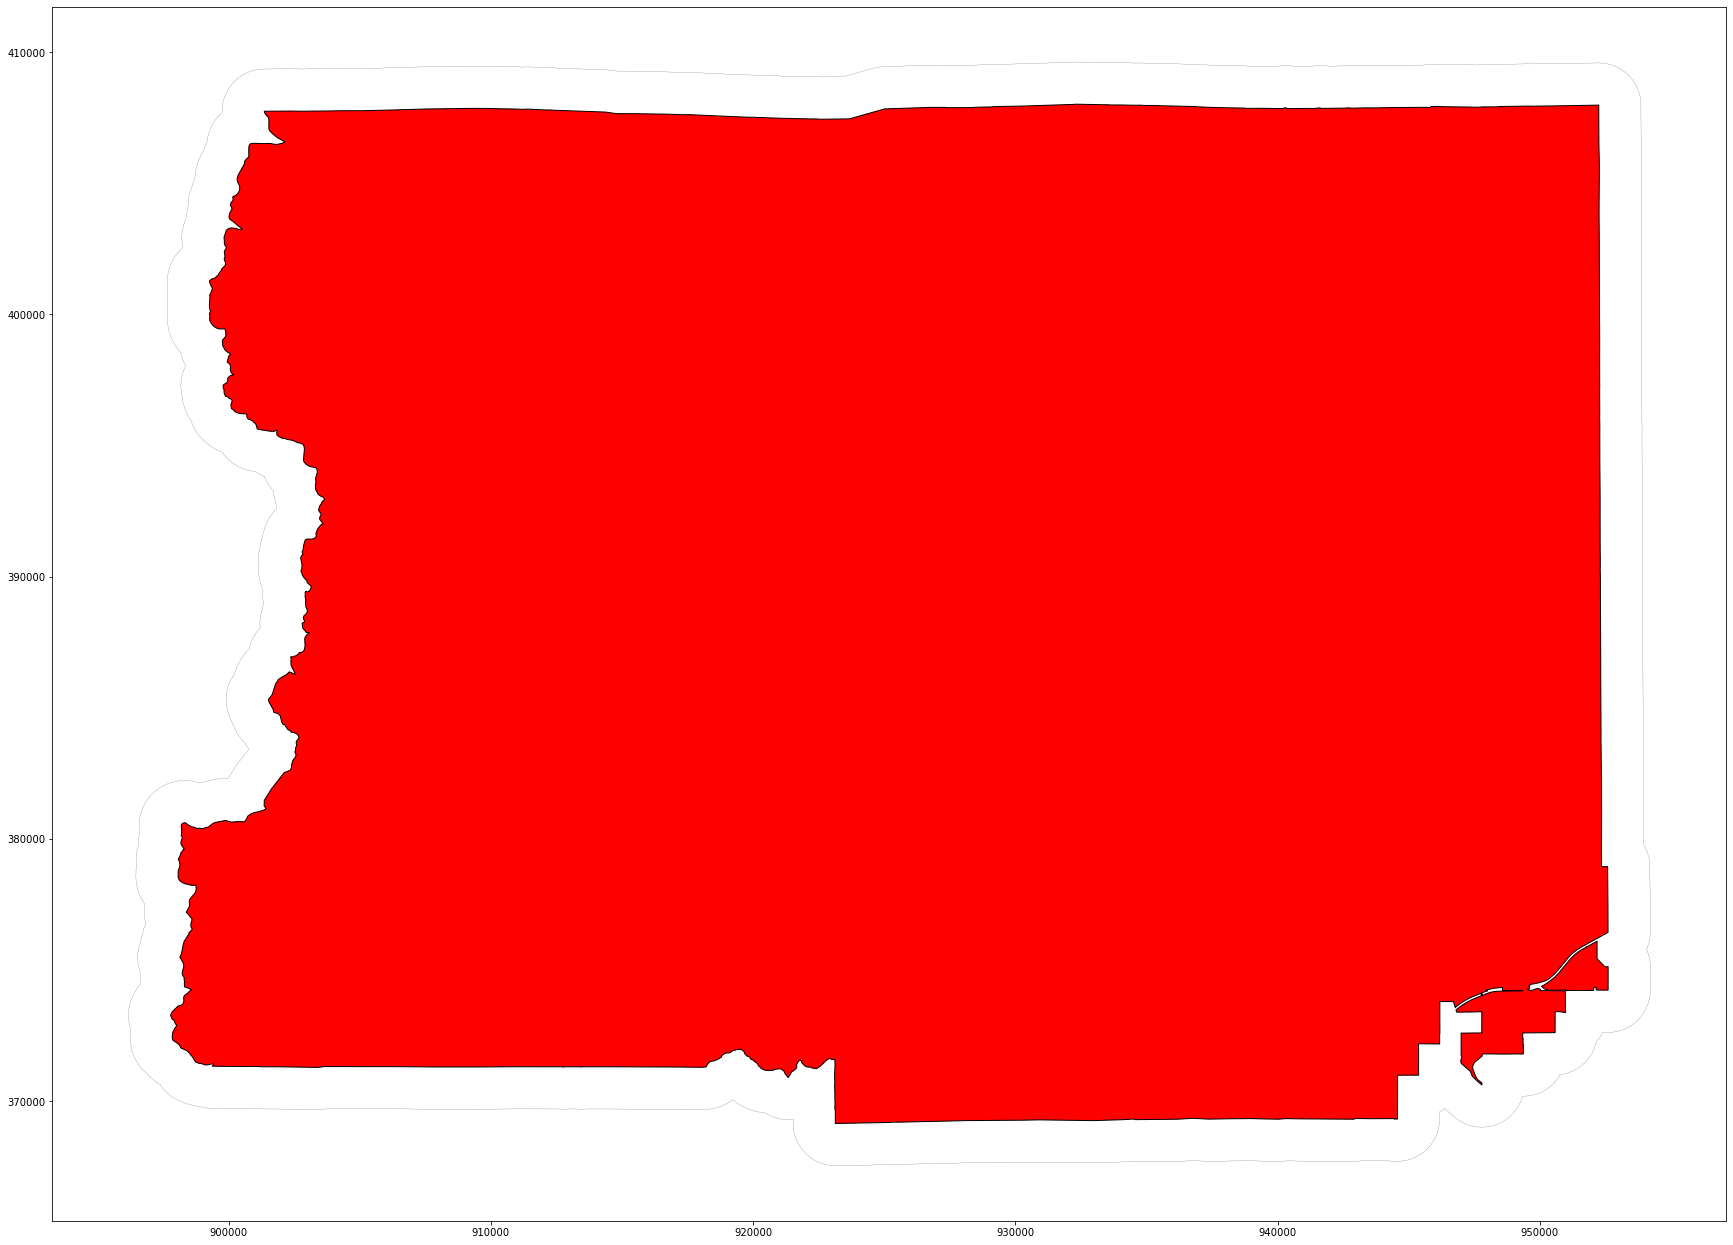

In [961]:
fig, ax = plt.subplots(figsize = (30,25)) 
local_poly.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 0.15,ax=ax) #Use your second dataframe

# Read the counter location file as gdf

In [962]:
df = gpd.GeoDataFrame(
    nf1, geometry=gpd.points_from_xy(nf1.longitude, nf1.latitude))
df.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             3.0  206.745402  102.547945  14.027397    218.0  40.068772   

    longitude comment  osm_id_sensor buff_dist                     geometry  
0 -105.283132     NaN    385509341.0       2.0  POINT (-105.28313 40.06877)  
1 -105.283132     NaN    385509341.0       1.5  POINT (-105.28313 40.06877)  
2 -105.283132     NaN    385509341.0       1.0  POINT (-105.28313 40.06877)  
3 -105.283132     NaN    385509341.0      0.75  POINT (-105.28313 40.06877)  
4 -105.283132     NaN    385509341.0       0.5  POINT (-105.28313 40.06877)

In [963]:
# set the co-ordinate system first
df = df.set_crs("EPSG:4211")
# Let's take a copy of our layer
gdf0_proj = df.copy()

# Reproject the geometries by replacing the values with projected ones
eco_proj = gdf0_proj.to_crs(epsg=2772)
eco_proj.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             3.0  206.745402  102.547945  14.027397    218.0  40.068772   

    longitude comment  osm_id_sensor buff_dist                       geometry  
0 -105.283132     NaN    385509341.0       2.0  POINT (932901.665 386478.901)  
1 -105.283132     NaN    385509341.0       1.5  POINT (932901.665 386478.901)  
2 -105.283132     NaN    385509341.0       1.0  POINT (932901.665 386478.901)  
3 -105.283132     NaN    385509341.0      0.75  POINT (932901.665 386478.901)  
4 -105.283132     NaN    385509341.0       0.5  POINT (932901.665 386478.901)

In [964]:
ecoshort0=eco_proj
#ecoshort0=pd.concat([eco_proj,short_proj],axis=0)
ecoshort0.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             3.0  206.745402  102.547945  14.027397    218.0  40.068772   

    longitude comment  osm_id_sensor buff_dist                       geometry  
0 -105.283132     NaN    385509341.0       2.0  POINT (932901.665 386478.901)  
1 -105.283132     NaN    385509341.0       1.5  POINT (932901.665 386478.901)  
2 -105.283132     NaN    385509341.0       1.0  POINT (932901.665 386478.901)  
3 -105.283132     NaN    385509341.0      0.75  POINT (932901.665 386478.901)  
4 -105.283132     NaN    385509341.0       0.5  POINT (932901.665 386478.901)

# Filter the location by Extended Study area Boundary

In [965]:
# Clip the data using GeoPandas clip
ecoshort = gpd.clip(ecoshort0, pba)
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
1             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
2             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
3             3.0  206.745402  102.547945  14.027397    218.0  40.068772   
4             3.0  206.745402  102.547945  14.027397    218.0  40.068772   

    longitude comment  osm_id_sensor buff_dist                       geometry  
0 -105.283132     NaN    385509341.0       2.0  POINT (932901.665 386478.901)  
1 -105.283132     NaN    385509341.0       1.5  POINT (932901.665 386478.901)  
2 -105.283132     NaN    385509341.0       1.0  POINT (932901.665 386478.901)  
3 -105.283132     NaN    385509341.0      0.75  POINT (932901.665 386478.901)  
4 -105.283132     NaN    385509341.0       0.5  POINT (932901.665 386478.901)

In [966]:
count_station=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [967]:
ecoshort=ecoshort.drop_duplicates(subset='osm_id_sensor')
ecoshort

site_id                                       site_name sensor_type  \
0    P001BOU                   B90004 US 36 North of Boulder   permanent   
7    P002BOU                         Folsom at Boulder Creek   permanent   
14   P003BOU                                  Folsom at Pine   permanent   
21   P004BOU                             Folsom at South St.   permanent   
28   P005BOU                        Eco-Totem 13th at Walnut   permanent   
35   P006BOU                90029 US 36 Southeast of Boulder   permanent   
42   P007BOU                                Baseline at Inca   permanent   
49   P008BOU              30th Street Just South of Colorado   permanent   
56   P009BOU                      Colorado Just West of 30th   permanent   
63   P010BOU            Broadway Path south of Boulder Creek   permanent   
70   P011BOU  COMBO 13th Street and Boulder Creek W of plaza   permanent   
77   S001BOU                                     WOODLAND RD  short-term   
84   S002BOU                                       N 83RD ST  short-term   
91   S003BOU                                       N 75TH ST  short-term   
98   S004BOU                                      HYGIENE RD  short-term   
112  S006BOU                                       N 65TH ST  short-term   
119  S007BOU                                  SAINT VRAIN RD  short-term   
126  S008BOU                                   VERMILLION RD  short-term   
133  S009BOU                                         NEVA RD  short-term   
140  S010BOU                                       N 87TH ST  short-term   
147  S011BOU                                      N 115TH ST  short-term   
161  S013BOU                                       N 95TH ST  short-term   
168  S014BOU                                     BASELINE RD  short-term   
182  S016BOU                                   CHERRYVALE RD  short-term   
189  S017BOU                                      VALMONT RD  short-term   
196  S018BOU                                    RIVERSIDE DR  short-term   
203  S019BOU                              LEFTHAND CANYON DR  short-term   
210  S020BOU                                BRAINARD LAKE DR  short-term   
217  S021BOU                                        RIDGE RD  short-term   
224  S022BOU                                       ELDORA RD  short-term   
231  S023BOU                              PEACEFUL VALLEY RD  short-term   
238  S024BOU                                     OVERLAND RD  short-term   
245  S025BOU                                 JAMES CANYON DR  short-term   
259  S027BOU                                BLUE MOUNTAIN RD  short-term   
266  S028BOU                                       NELSON RD  short-term   
280  S030BOU                                      KENOSHA RD  short-term   

     year   region  travel_pattern        AADBT     stv_adb  stv_c_adb  \
0    2019  Boulder             3.0   206.745402  102.547945  14.027397   
7    2019  Boulder             2.0   479.543452   29.739726  10.452055   
14   2019  Boulder             1.0   607.273809   52.397260  16.424658   
21   2019  Boulder             2.0   502.851786   29.904110   9.972603   
28   2019  Boulder             2.0   601.530238   20.808219   9.095890   
35   2019  Boulder             2.0   219.727182   50.205479  21.424658   
42   2019  Boulder             2.0   180.242262   31.575342   7.068493   
49   2019  Boulder             2.0   272.987302   14.561644   7.493151   
56   2019  Boulder             2.0   282.520833    5.082192   2.671233   
63   2019  Boulder             2.0   415.817968   16.698630   6.972603   
70   2019  Boulder             3.0  1085.607486   32.164384  11.698630   
77   2019  Boulder             NaN    52.680476    4.643836   0.589041   
84   2019  Boulder             NaN    33.525443   12.739726   2.397260   
91   2019  Boulder             NaN    76.506781   16.890411   2.917808   
98   2019  Boulder             NaN    24.936175   13.260274   1.917808   
112  201

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

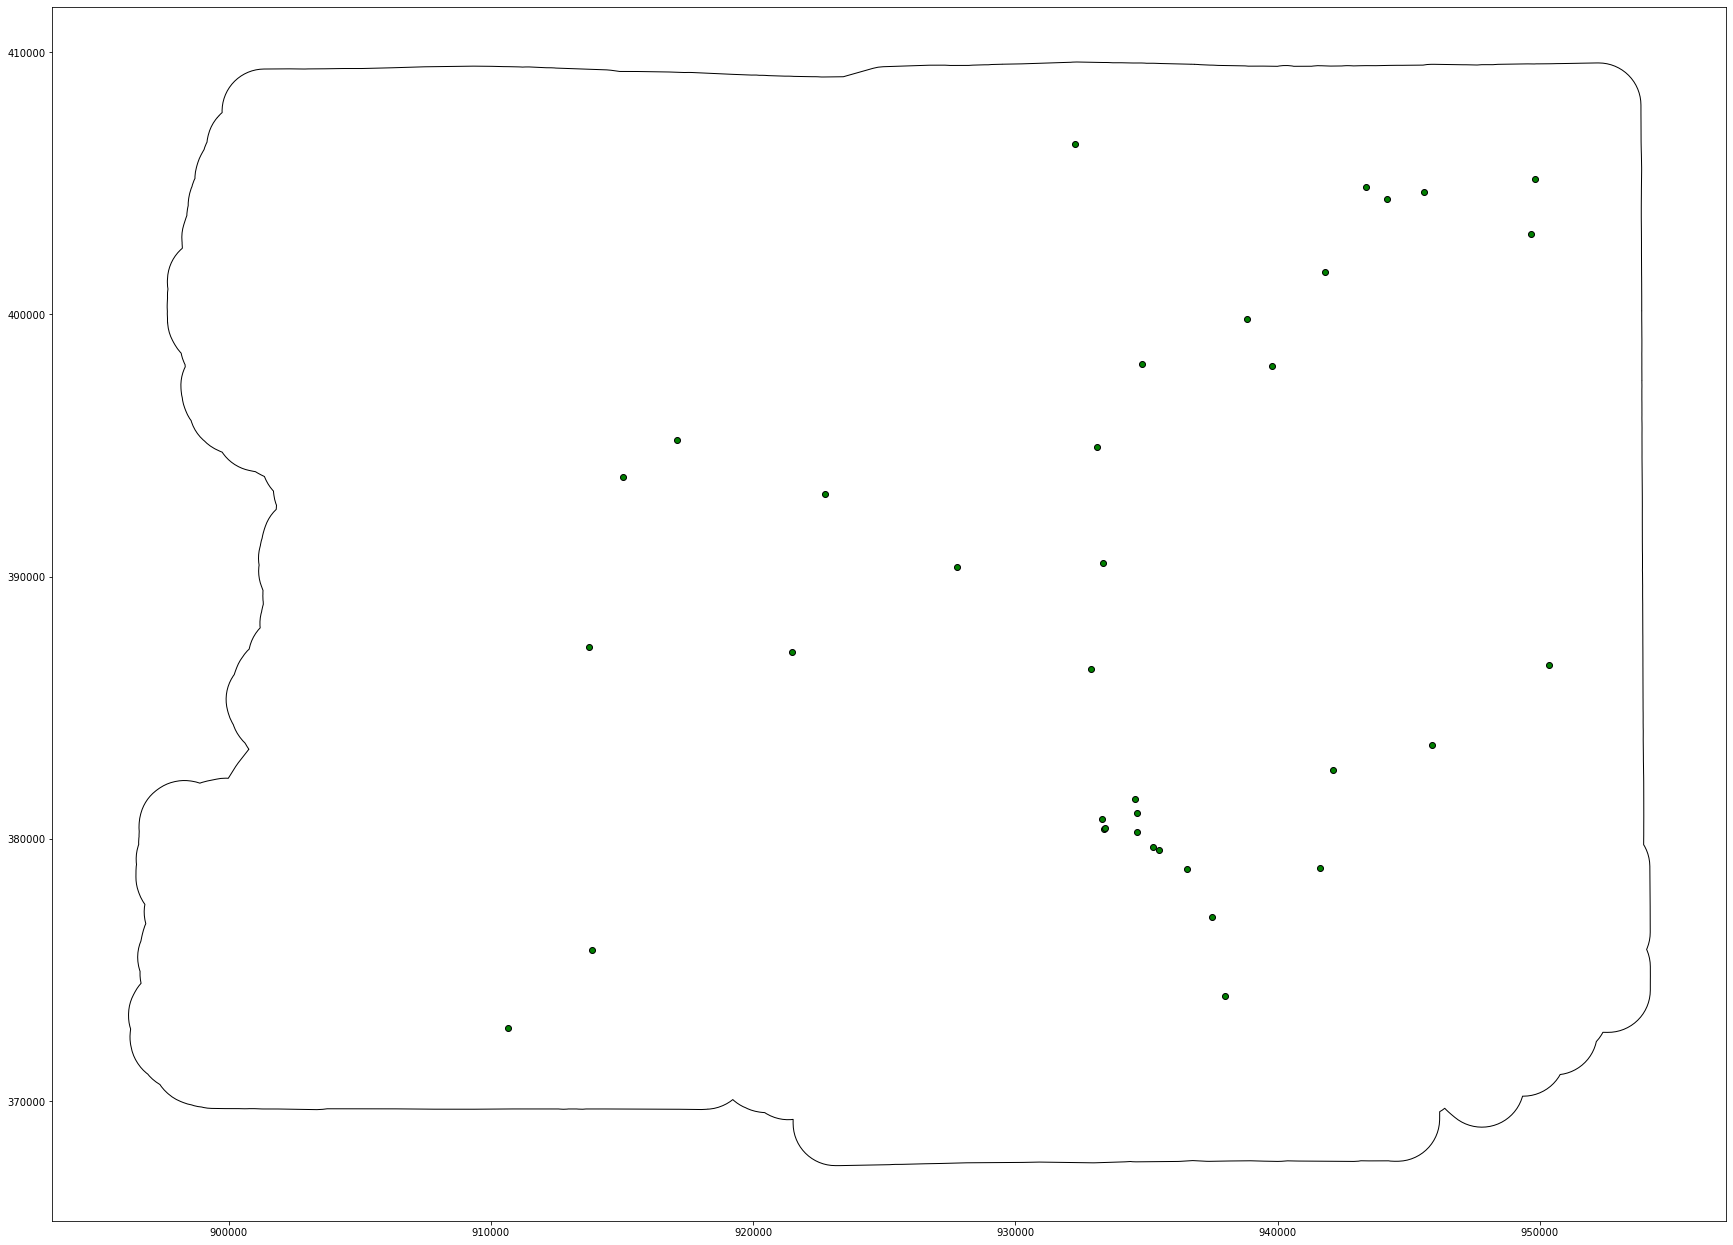

In [968]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

# geopanda buffer function: https://geopandas.org/docs/user_guide/geometric_manipulations.html

In [969]:
# Buffer file
gdf1=nf3
gdf1['buffer_area']=gdf1.area*3.86102e-7 # in mile square
gdf1 = gdf1[gdf1['buffer_area']> 0]
gdf1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


site_id                                       site_name sensor_type  \
6    P001BOU                   B90004 US 36 North of Boulder   permanent   
13   P002BOU                         Folsom at Boulder Creek   permanent   
20   P003BOU                                  Folsom at Pine   permanent   
27   P004BOU                             Folsom at South St.   permanent   
34   P005BOU                        Eco-Totem 13th at Walnut   permanent   
48   P007BOU                                Baseline at Inca   permanent   
55   P008BOU              30th Street Just South of Colorado   permanent   
62   P009BOU                      Colorado Just West of 30th   permanent   
69   P010BOU            Broadway Path south of Boulder Creek   permanent   
76   P011BOU  COMBO 13th Street and Boulder Creek W of plaza   permanent   
83   S001BOU                                     WOODLAND RD  short-term   
90   S002BOU                                       N 83RD ST  short-term   
97   S003BOU                                       N 75TH ST  short-term   
104  S004BOU                                      HYGIENE RD  short-term   
111  S005BOU                                      HYGIENE RD  short-term   
118  S006BOU                                       N 65TH ST  short-term   
132  S008BOU                                   VERMILLION RD  short-term   
139  S009BOU                                         NEVA RD  short-term   
153  S011BOU                                      N 115TH ST  short-term   
160  S012BOU                                       N 75TH ST  short-term   
167  S013BOU                                       N 95TH ST  short-term   
174  S014BOU                                     BASELINE RD  short-term   
181  S015BOU                                     BASELINE RD  short-term   
188  S016BOU                                   CHERRYVALE RD  short-term   
195  S017BOU                                      VALMONT RD  short-term   
202  S018BOU                                    RIVERSIDE DR  short-term   
216  S020BOU                                BRAINARD LAKE DR  short-term   
223  S021BOU                                        RIDGE RD  short-term   
251  S025BOU                                 JAMES CANYON DR  short-term   
258  S026BOU                                       ELDORA RD  short-term   
265  S027BOU                                BLUE MOUNTAIN RD  short-term   
272  S028BOU                                       NELSON RD  short-term   
279  S029BOU                              LEFTHAND CANYON DR  short-term   

     year   region  travel_pattern        AADBT     stv_adb  stv_c_adb  \
6    2019  Boulder             3.0   206.745402  102.547945  14.027397   
13   2019  Boulder             2.0   479.543452   29.739726  10.452055   
20   2019  Boulder             1.0   607.273809   52.397260  16.424658   
27   2019  Boulder             2.0   502.851786   29.904110   9.972603   
34   2019  Boulder             2.0   601.530238   20.808219   9.095890   
48   2019  Boulder             2.0   180.242262   31.575342   7.068493   
55   2019  Boulder             2.0   272.987302   14.561644   7.493151   
62   2019  Boulder             2.0   282.520833    5.082192   2.671233   
69   2019  Boulder             2.0   415.817968   16.698630   6.972603   
76   2019  Boulder             3.0  1085.607486   32.164384  11.698630   
83   2019  Boulder             NaN    52.680476    4.643836   0.589041   
90   2019  Boulder             NaN    33.525443   12.739726   2.397260   
97   2019  Boulder             NaN    76.506781   16.890411   2.917808   
104  2019  Boulder             NaN    24.936175   13.260274   1.917808   
111  2019  Boulder             NaN    12.208837    6.986301   1.082192   
118  2019  Boulder             NaN    23.456849   27.027397   3.575342   
132  2019  Boulder             NaN     4.675533    0.054795   0.000000   
139  2019  Boulder             NaN    53.569129   44.246575   5.178082   
153  2019  Bou

In [970]:
#gdf1 = ecoshort.copy()
#gdf1['geometry'] = gdf1['geometry'].buffer(size)
#gdf1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [971]:
#conda install -c conda-forge contextily #install in your geo_env using command prompt 

#https://geopandas.org/gallery/plotting_basemap_background.html

In [972]:
import contextily as ctx

In [973]:
print(gdf1.crs)

epsg:2772


In [974]:
# Insert City Specific EPSG here to convert 3D to 2D map,for exaple, state plane system EPSG =2772 for Portland
# set the co-ordinate system first
gdfm = gdf1.set_crs("EPSG:2772") # provided by PSU
gdfm = gdfm.to_crs(epsg=3857) # This EPSG just for ploting

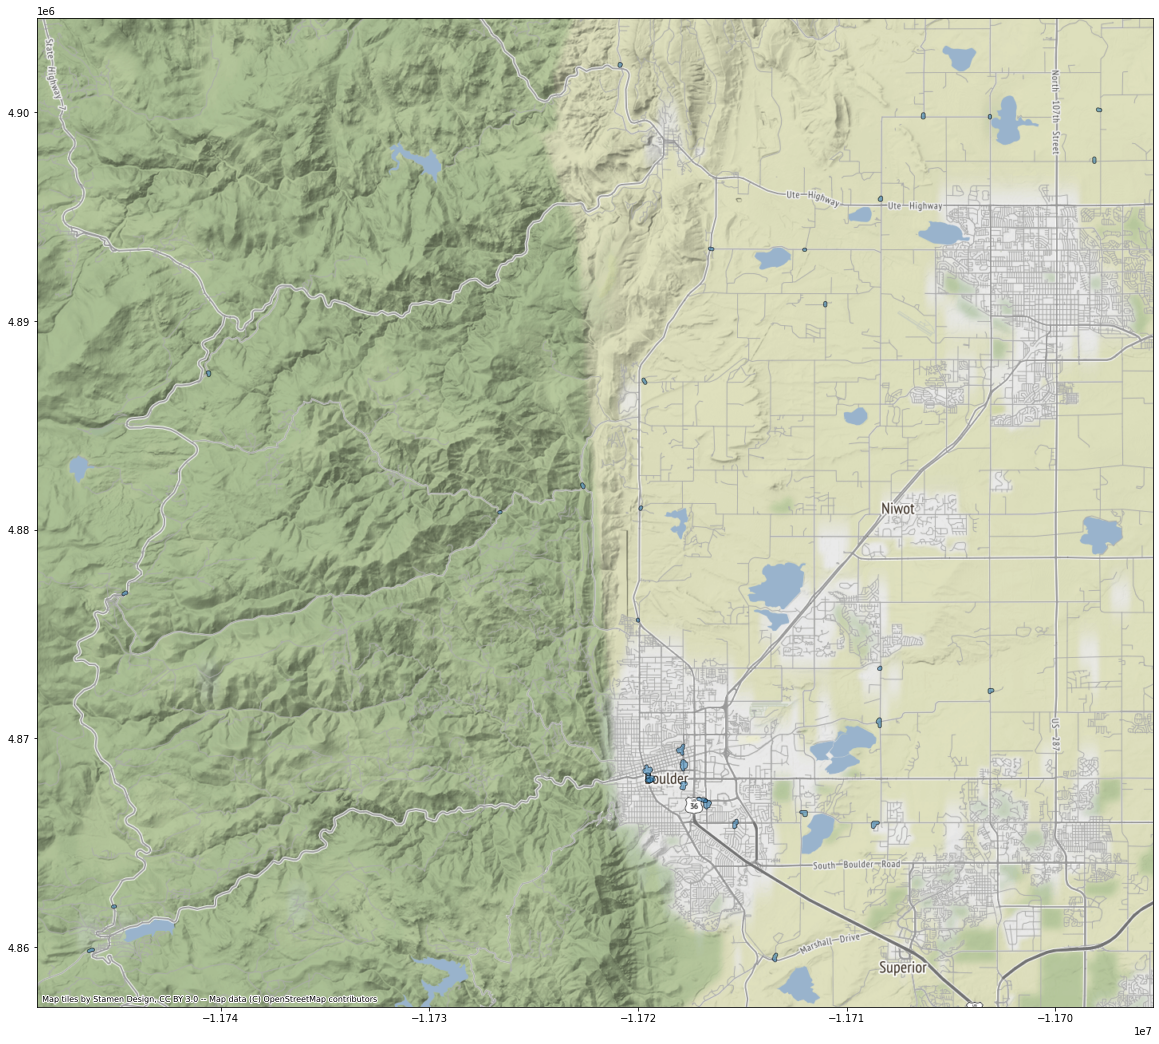

In [975]:
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# ploting code: http://darribas.org/gds15/content/labs/lab_03.html

# Calculate O, D and OD line

bs_all.head(5)

# BS Origin

In [976]:
# Origin
#bso = gpd.GeoDataFrame(
#    bs_all, geometry=gpd.points_from_xy(bs_all.StartLongitude, bs_all.StartLatitude))
#bso=bso.loc[:,['RouteID','StartLatitude','StartLongitude','geometry']]
#bso.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [977]:
# set the co-ordinate system first
#bso1 = bso.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
#bso1_proj = bso1.to_crs(epsg=2772)
#bso1_proj.head(5)

In [978]:
# Clip the data using GeoPandas clip
#bso1_clip = gpd.clip(bso1_proj, gdf1)
#bso1_clip.head(5)

In [979]:
# int_bso=gpd.overlay(gdf1, bso1_clip, how='intersection', make_valid=True, keep_geom_type=False)
# int_bso.head(5)

In [980]:
#int_bso.geometry.plot()
#ax = gdf1.plot(figsize=(40, 30))
#int_bso.geometry.plot(color="red",edgecolor='k',ax=ax)

In [981]:
#output_origin=int_bso.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_origin.columns=["osm_id","Bike Share Origin"]
#output_origin

# BS destination

In [982]:
# Destination
#bsd = gpd.GeoDataFrame(
#    bs_all, geometry=gpd.points_from_xy(bs_all.EndLongitude, bs_all.EndLatitude))
#bsd=bsd.loc[:,['RouteID','EndLatitude','EndLongitude','geometry']]
#bsd.head(5)

In [983]:
# set the co-ordinate system first
#bsd1 = bsd.set_crs("EPSG:4211")
# Reproject the geometries by replacing the values with projected ones
#bsd1_proj = bsd1.to_crs(epsg=2772)
#bsd1_proj.head(5)

In [984]:
# Clip the data using GeoPandas clip
#bsd1_clip = gpd.clip(bsd1_proj, gdf1)
#bsd1_clip.head(5)

In [985]:
#int_bsd=gpd.overlay(gdf1, bsd1_clip, how='intersection', make_valid=True, keep_geom_type=False)
#int_bsd.head(5)

In [986]:
#int_bsd.geometry.plot()
#plotting    
#ax = gdf1.plot(figsize=(40, 30))
#int_bsd.geometry.plot(color="red",edgecolor='k',ax=ax)

In [987]:
#output_destination=int_bsd.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_destination.columns=["osm_id","Bike Share Destination"]
#output_destination

# Bike Share OD line Crossing

In [988]:
#https://gis.stackexchange.com/questions/303615/creating-linestring-and-length-of-linestring-from-multiple-latlon-points-for-eac
#import shapely.geometry as geom
#bs_all_od=bs_all.copy()
#bs_all_od['geometry'] = bs_all_od.apply(lambda x: geom.LineString([(x['StartLongitude'], x['StartLatitude']) , (x['EndLongitude'], x['EndLatitude'])]), axis = 1)
#bs_all_od.head(5)

In [989]:
# exclude the points outside of Portland
#bs_all_od1=bs_all_od[(bs_all_od.StartLongitude<=-122)&(bs_all_od.StartLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLongitude<=-122)&(bs_all_od1.EndLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.StartLatitude>=45)&(bs_all_od1.StartLatitude<=46)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLatitude>=45)&(bs_all_od1.EndLatitude<=46)]
#bs_all_od1.head(5)

In [990]:
#bs_all_od1.dtypes

In [991]:
#print(bs_all_od1.info())

In [992]:
#bs_all_od2 = gpd.GeoDataFrame(bs_all_od1, geometry='geometry', crs={'init': 'epsg:4211'})
#bs_all_od2.head(5)

In [993]:
#print(bs_all_od2.crs)

In [994]:
#print(bs_all_od2.info())

In [995]:
# set the co-ordinate system first
#bs_all_od2 = bs_all_od1.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
#bs_all_od2_proj = bs_all_od2.to_crs(epsg=2772)
#bs_all_od2_proj.head(5)

In [996]:
#bs_all_od2_proj.shape

In [997]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#bs_all_od2_proj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [998]:
#spj = gpd.sjoin( bs_all_od2_proj,gdf1, how="inner", op='intersects')

In [999]:
#spj.head(5)

In [1000]:
#spj.shape

In [1001]:
# Clip the data using GeoPandas clip
#odc1_clip = gpd.clip(bs_all_od2_proj,gdf1)
#odc1_clip.head(5)

In [1002]:
#int_odl=gpd.overlay(gdf1, bs_all_od2_proj, how='intersection', make_valid=True, keep_geom_type=False)
#int_odl.head(5)

In [1003]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#spj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [1004]:
#output_odl=spj.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_odl.columns=["osm_id","Bike Share Crossing"]
#output_odl

# Now import land use shape file

In [1005]:
#luse = gpd.read_file("../input/osm-data/landuse.shp")
luse.head(5)

osm_id                  name        type  \
0  23550375  Loveland Burial Park    cemetery   
1  27856736                  None       grass   
2  27856807                  None       grass   
3  33119314                  None       grass   
4  33139710                  None  industrial   

                                            geometry  
0  POLYGON ((-105.07750 40.41442, -105.07318 40.4...  
1  POLYGON ((-105.00569 39.74652, -105.00496 39.7...  
2  POLYGON ((-105.00419 39.74621, -105.00442 39.7...  
3  POLYGON ((-104.99735 40.23960, -104.99584 40.2...  
4  POLYGON ((-104.92429 39.83556, -104.92433 39.8...

# Define and then Convert the co-ordinate system

In [1006]:
# set the co-ordinate system first
#lusec = luse.set_crs("EPSG:4326")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1007]:
# Let's take a copy of our layer
luse_proj = lusec.copy()

# Reproject the geometries by replacing the values with projected ones
luse_proj = luse_proj.to_crs(epsg=2772)
luse_proj.head(5)

osm_id                  name        type  \
0  23550375  Loveland Burial Park    cemetery   
1  27856736                  None       grass   
2  27856807                  None       grass   
3  33119314                  None       grass   
4  33139710                  None  industrial   

                                            geometry  
0  POLYGON ((950261.302 424919.850, 950627.334 42...  
1  POLYGON ((956768.823 350793.686, 956831.389 35...  
2  POLYGON ((956897.910 350759.976, 956878.082 35...  
3  POLYGON ((957173.271 405544.031, 957302.004 40...  
4  POLYGON ((963680.981 360722.147, 963677.981 36...

# Visualize

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

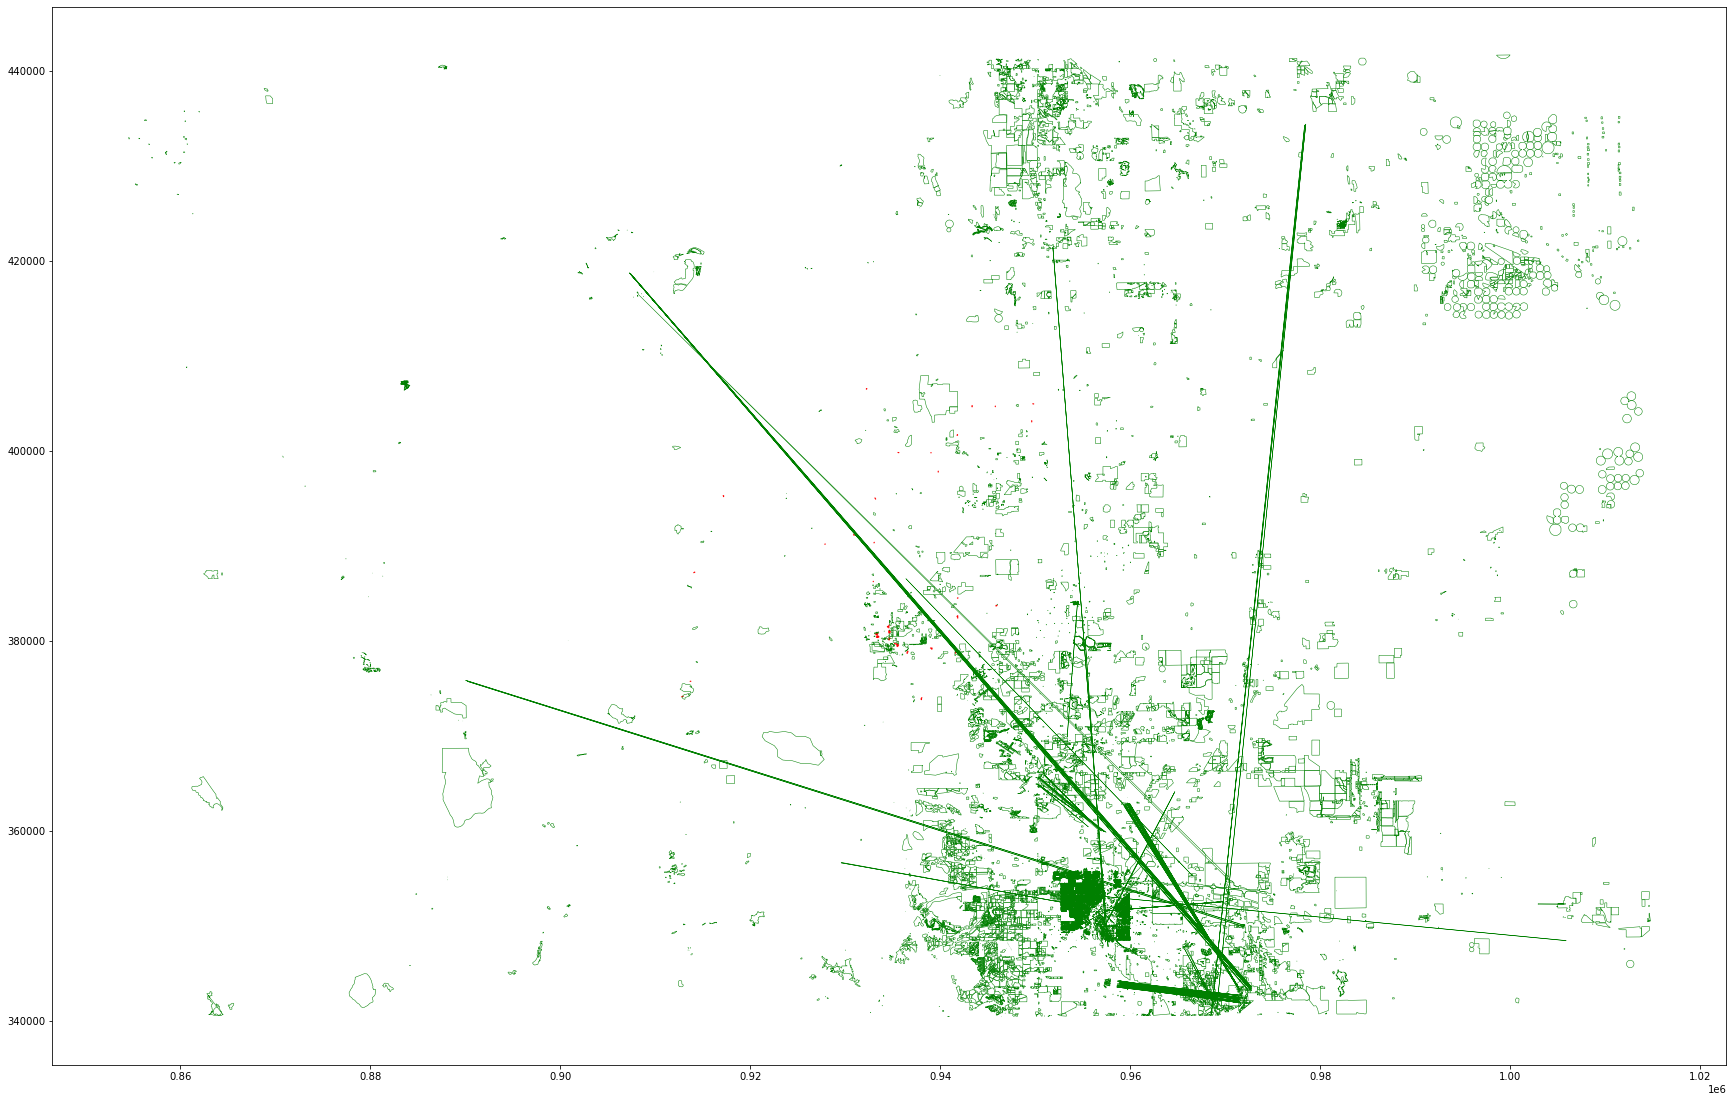

In [1008]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
luse_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# Now clip landuse with buffer

In [1009]:
import os 
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1010]:
#!pip install Rtree
#!pip install pygeos
#!pip install ujson
#!pip install wheel

In [1011]:
#luse_proj.exterior.type

In [1012]:
#gdf1.exterior.type

In [1013]:
#luse_proj.exterior.is_valid

In [1014]:
#gdf1.exterior.is_valid

In [1015]:
# Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
luse_proj["geometry2"]=luse_proj.geometry.buffer(0)
# Now drop geometry column and rename geometry 2 equal to geometry again
luse_proj=luse_proj.drop(["geometry"],axis=1)
luse_proj.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
luse_proj.head(5)

osm_id                  name        type  \
0  23550375  Loveland Burial Park    cemetery   
1  27856736                  None       grass   
2  27856807                  None       grass   
3  33119314                  None       grass   
4  33139710                  None  industrial   

                                            geometry  
0  POLYGON ((950261.302 424919.850, 950627.334 42...  
1  POLYGON ((956768.823 350793.686, 956775.894 35...  
2  POLYGON ((956897.910 350759.976, 956878.082 35...  
3  POLYGON ((957173.271 405544.031, 957071.255 40...  
4  POLYGON ((963680.981 360722.147, 963703.751 36...

In [1016]:
# Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id               name         type  \
704   130815567               None  residential   
812   134080142               None  residential   
1027  168909353  Pearl Street Mall       retail   
1452  264694309       Smiley Court  residential   
1456  264869354               None        grass   

                                               geometry  
704   POLYGON ((912911.788 374133.286, 912910.340 37...  
812   POLYGON ((941781.033 378869.141, 941840.099 37...  
1027  POLYGON ((933224.769 380900.315, 933275.290 38...  
1452  POLYGON ((935462.683 379704.428, 935460.829 37...  
1456  POLYGON ((933341.906 380919.327, 933342.355 38...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


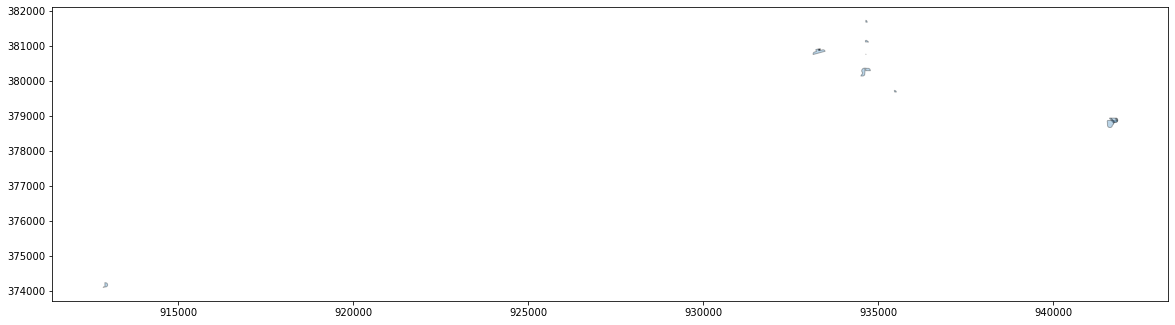

In [1017]:
ax = buffer_clip.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect the clipped area with Buffer ID

In [1018]:
 intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
 intdata.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                site_name sensor_type  year   region  \
0  P002BOU  Folsom at Boulder Creek   permanent  2019  Boulder   
1  P002BOU  Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU           Folsom at Pine   permanent  2019  Boulder   
3  P004BOU      Folsom at South St.   permanent  2019  Boulder   
4  P004BOU      Folsom at South St.   permanent  2019  Boulder   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  479.543452  29.739726  10.452055   5359.0  40.012846   
1             2.0  479.543452  29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809  52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786  29.904110   9.972603   3750.0  40.019358   
4             2.0  502.851786  29.904110   9.972603   3750.0  40.019358   

    longitude                                            comment  \
0 -105.263103                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.263097                                                NaN   

   osm_id_sensor buff_dist  buffer_area     osm_id  \
0     43176757.0       0.1     0.022655  388363837   
1     43176757.0       0.1     0.022655  450241982   
2    439968204.0       0.1     0.027259  843354206   
3     43313642.0       0.1     0.031218  395704583   
4     43313642.0       0.1     0.031218  677512888   

                          name          type  \
0                 Newton Court   residential   
1           Alcove on Arapahoe        retail   
2                Mapleton Park   residential   
3  The Village Shopping Center        retail   
4                         None  construction   

                                            geometry  
0  POLYGON ((934507.748 380149.557, 934509.204 38...  
1  POLYGON ((934652.051 380366.233, 934657.354 38...  
2  POLYGON ((934650.367 381733.632, 934655.548 38...  
3  POLYGON ((934652.622 380764.049, 934647.302 38...  
4  POLYGON ((934665.731 381161.193, 934671.136 38...

In [1019]:
intdata["Area"]=intdata["geometry"].area*10.76 # in ft2
intdata.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                site_name sensor_type  year   region  \
0  P002BOU  Folsom at Boulder Creek   permanent  2019  Boulder   
1  P002BOU  Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU           Folsom at Pine   permanent  2019  Boulder   
3  P004BOU      Folsom at South St.   permanent  2019  Boulder   
4  P004BOU      Folsom at South St.   permanent  2019  Boulder   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...   longitude  \
0             2.0  479.543452  29.739726  10.452055   5359.0  ... -105.263103   
1             2.0  479.543452  29.739726  10.452055   5359.0  ... -105.263103   
2             1.0  607.273809  52.397260  16.424658   4518.0  ... -105.263773   
3             2.0  502.851786  29.904110   9.972603   3750.0  ... -105.263097   
4             2.0  502.851786  29.904110   9.972603   3750.0  ... -105.263097   

                                             comment osm_id_sensor  buff_dist  \
0                                                NaN    43176757.0        0.1   
1                                                NaN    43176757.0        0.1   
2  obsolete OSM link parallel to street link (Id=...   439968204.0        0.1   
3                                                NaN    43313642.0        0.1   
4                                                NaN    43313642.0        0.1   

  buffer_area     osm_id                         name          type  \
0    0.022655  388363837                 Newton Court   residential   
1    0.022655  450241982           Alcove on Arapahoe        retail   
2    0.027259  843354206                Mapleton Park   residential   
3    0.031218  395704583  The Village Shopping Center        retail   
4    0.031218  677512888                         None  construction   

                                            geometry           Area  
0  POLYGON ((934507.748 380149.557, 934509.204 38...  186955.317675  
1  POLYGON ((934652.051 380366.233, 934657.354 38...   85978.230060  
2  POLYGON ((934650.367 381733.632, 934655.548 38...   16437.992293  
3  POLYGON ((934652.622 380764.049, 934647.302 38...     155.075653  
4  POLYGON ((934665.731 381161.193, 934671.136 38...   30283.948658  

[5 rows x 21 columns]

#https://geopandas.org/docs/user_guide/set_operations.html

In [1020]:
#intdata.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Aggregate data by ID

#https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html

In [1021]:
output_landuse=intdata.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_landuse.columns=['osm_id','type','Area']
output_landuse.head()

osm_id          type           Area
0  17026172.0   residential   85454.357659
1  37998424.0   residential   19673.039538
2  43176757.0   residential  186955.317675
3  43176757.0        retail   85978.230060
4  43313642.0  construction   30283.948658

In [1022]:
# Calculate commercial area
commercial  = intdata[intdata['type'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_commercial.columns=['osm_id','Commercial Area ']
output_commercial.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Commercial Area 
0  132769465.0     213355.794118

In [1023]:
gdf1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
6   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
13  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
20  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
27  P004BOU            Folsom at South St.   permanent  2019  Boulder   
34  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
6              3.0  206.745402  102.547945  14.027397    218.0  40.068772   
13             2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
20             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
27             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
34             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

     longitude                                            comment  \
6  -105.283132                                                NaN   
13 -105.263103                                                NaN   
20 -105.263773  obsolete OSM link parallel to street link (Id=...   
27 -105.263097                                                NaN   
34 -105.278436                                                NaN   

    osm_id_sensor buff_dist  \
6     385509341.0       0.1   
13     43176757.0       0.1   
20    439968204.0       0.1   
27     43313642.0       0.1   
34     46148772.0       0.1   

                                             geometry  buffer_area  
6   POLYGON ((933015.267 386267.072, 933016.151 38...     0.005766  
13  POLYGON ((934593.545 380079.170, 934592.870 38...     0.022655  
20  POLYGON ((934514.459 381424.312, 934510.984 38...     0.027259  
27  POLYGON ((934679.736 380794.034, 934677.225 38...     0.031218  
34  POLYGON ((933287.770 380620.105, 933281.882 38...     0.034636

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

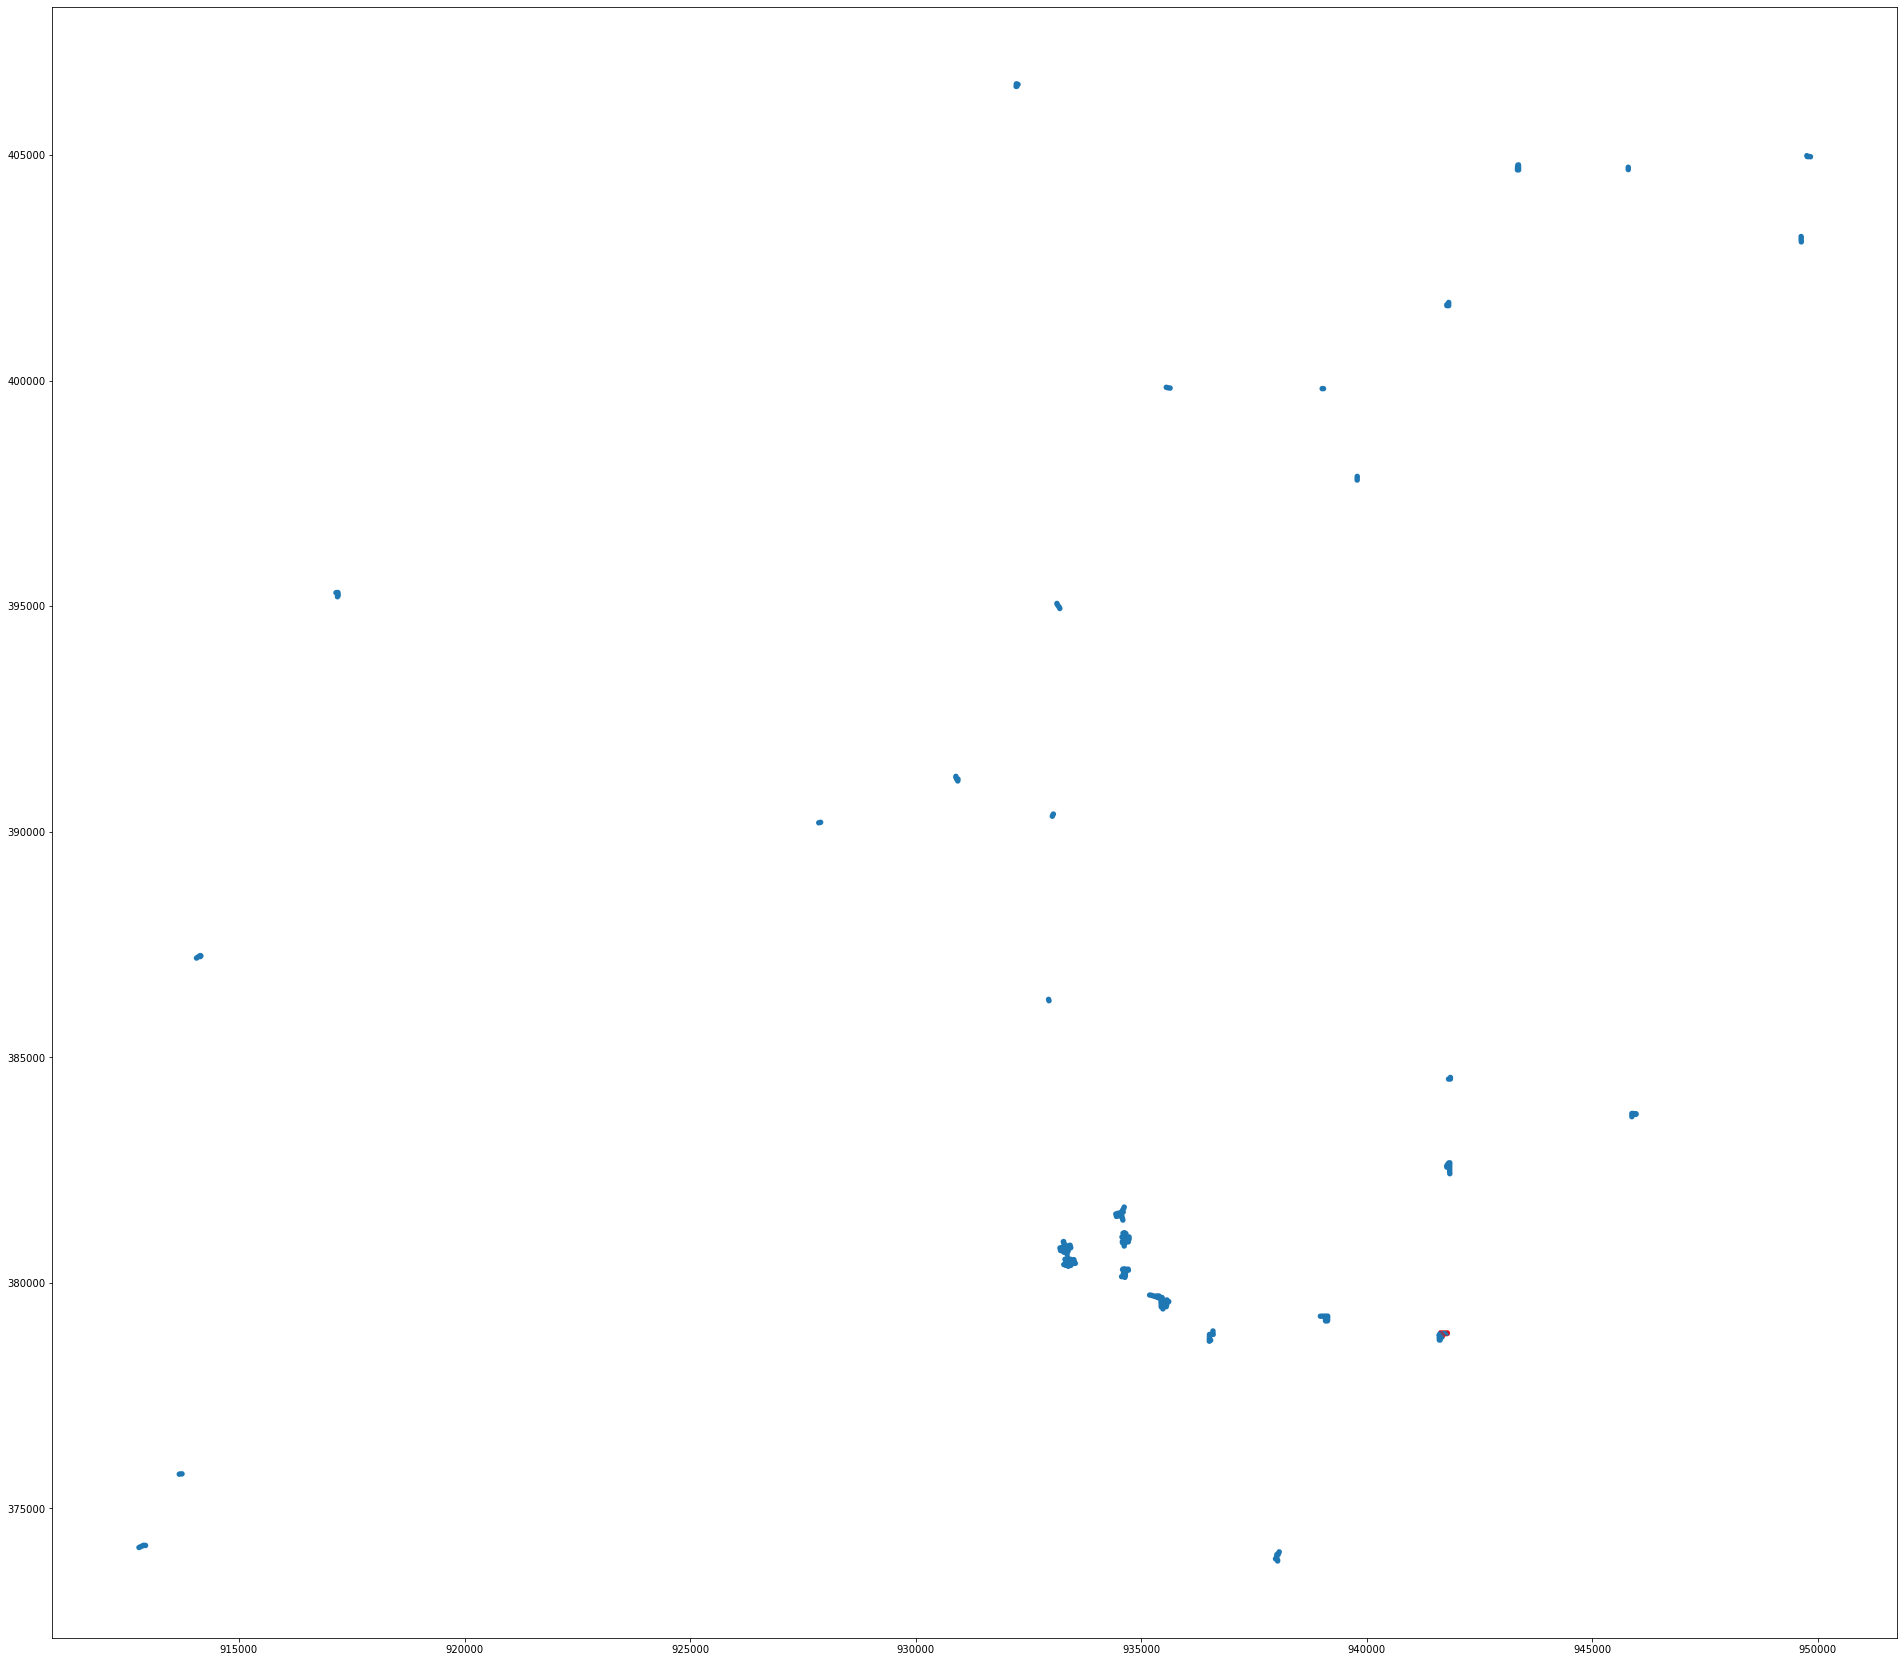

In [1024]:
#plotting    
ax = gdf1.plot(figsize=(40, 30))
commercial.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [1025]:
# Calculate inductrial area
industrial  = intdata[intdata['type'].str.contains('industrial')]
output_industrial = industrial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_industrial.columns=['osm_id','Industrial Area ']
output_industrial.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, Industrial Area ]
Index: []

In [1026]:
# Calculate residential area
residential  = intdata[intdata['type'].str.contains('residential')]
output_residential = residential.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_residential.columns=['osm_id','Residential_Area ']
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Area 
0   17026172.0       85454.357659
1   37998424.0       19673.039538
2   43176757.0      186955.317675
3  132769465.0      382750.966852
4  212055825.0       19669.705285

In [1027]:
residential.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                           site_name sensor_type  year   region  \
0   P002BOU             Folsom at Boulder Creek   permanent  2019  Boulder   
2   P003BOU                      Folsom at Pine   permanent  2019  Boulder   
11  P008BOU  30th Street Just South of Colorado   permanent  2019  Boulder   
12  P009BOU          Colorado Just West of 30th   permanent  2019  Boulder   
13  S014BOU                         BASELINE RD  short-term  2019  Boulder   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0              2.0  479.543452  29.739726  10.452055   5359.0  ...   
2              1.0  607.273809  52.397260  16.424658   4518.0  ...   
11             2.0  272.987302  14.561644   7.493151   7101.0  ...   
12             2.0  282.520833   5.082192   2.671233   4787.0  ...   
13             NaN  277.371802  62.534247  20.726027    427.0  ...   

     longitude                                            comment  \
0  -105.263103                                                NaN   
2  -105.263773  obsolete OSM link parallel to street link (Id=...   
11 -105.253124                                                NaN   
12 -105.255754                                                NaN   
13 -105.181417                                                NaN   

   osm_id_sensor  buff_dist buffer_area     osm_id           name  \
0     43176757.0        0.1    0.022655  388363837   Newton Court   
2    439968204.0        0.1    0.027259  843354206  Mapleton Park   
11   212055825.0        0.1    0.029160  264694309   Smiley Court   
12    37998424.0        0.1    0.019232  264694309   Smiley Court   
13   132769465.0        0.1    0.020542  134080142           None   

           type                                           geometry  \
0   residential  POLYGON ((934507.748 380149.557, 934509.204 38...   
2   residential  POLYGON ((934650.367 381733.632, 934655.548 38...   
11  residential  POLYGON ((935465.756 379733.027, 935471.563 37...   
12  residential  POLYGON ((935465.581 379733.039, 935465.756 37...   
13  residential  POLYGON ((941598.805 378674.147, 941598.030 37...   

             Area  
0   186955.317675  
2    16437.992293  
11   19669.705285  
12   19673.039538  
13  382750.966852  

[5 rows x 21 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

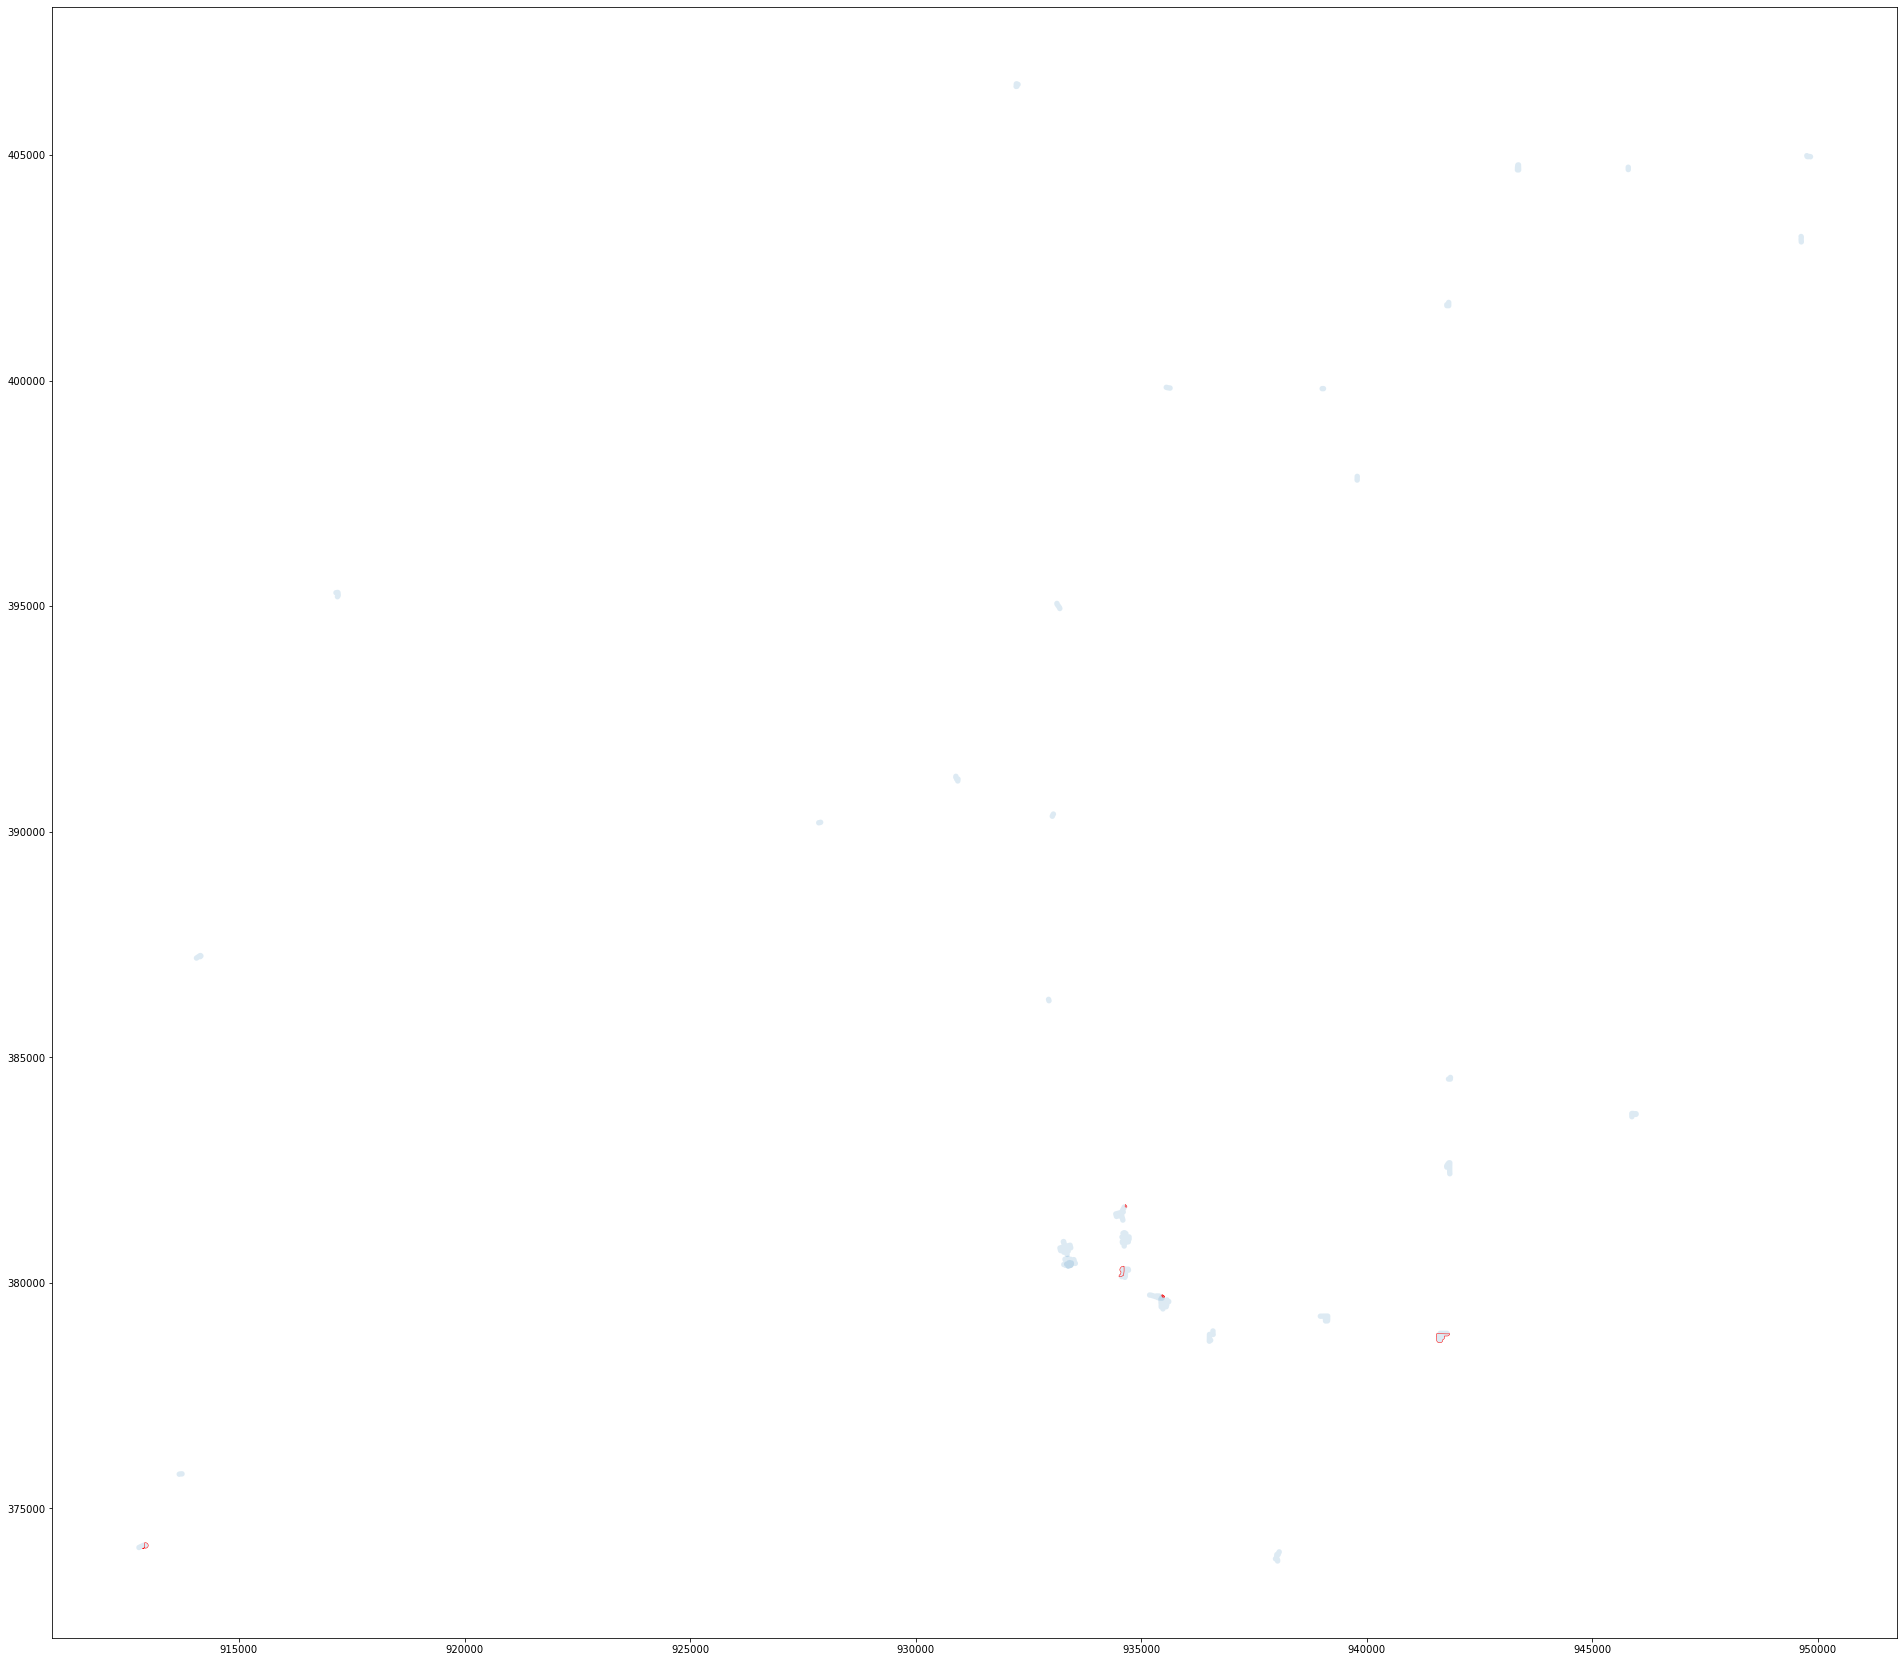

In [1028]:
#plotting    
ax = gdf1.plot(figsize=(40, 30),alpha=0.15)
residential.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [1029]:
# Calculate retail area
retail  = intdata[intdata['type'].str.contains('retail')]
output_retail = retail.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_retail.columns=['osm_id','Retail Area']
output_retail.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Retail Area
0  43176757.0   85978.230060
1  43313642.0     155.075653
2  46148772.0  258042.887618

In [1030]:
# Calculate grass area
grass  = intdata[intdata['type'].str.contains('grass')]
output_grass = grass.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_grass.columns=['osm_id','Grass Area']
output_grass.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Grass Area
0  46148772.0  11312.778013

In [1031]:
output_grass.index

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RangeIndex(start=0, stop=1, step=1)

# Use the Natural Shape file to calculate the Park, water and green spaces

In [1032]:
#nature=gpd.read_file("../input/osm-data/natural.shp")
nature.head(5)

osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                            geometry  
0  POLYGON ((-105.08574 40.54563, -105.08573 40.5...  
1  POLYGON ((-105.06571 40.44693, -105.06422 40.4...  
2  POLYGON ((-105.03345 40.45281, -105.03223 40.4...  
3  POLYGON ((-105.06770 40.41485, -105.06640 40.4...  
4  POLYGON ((-105.08273 40.42033, -105.08267 40.4...

In [1033]:
# set the co-ordinate system first
# nature = nature.set_crs("EPSG:4326")
# Let's take a copy of our layer
nature_proj = nature.copy()

# Reproject the geometries by replacing the values with projected ones
nature_proj = nature_proj.to_crs(epsg=2772)
nature_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                            geometry  
0  POLYGON ((949493.289 439485.899, 949493.890 43...  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...

In [1034]:
#nature_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

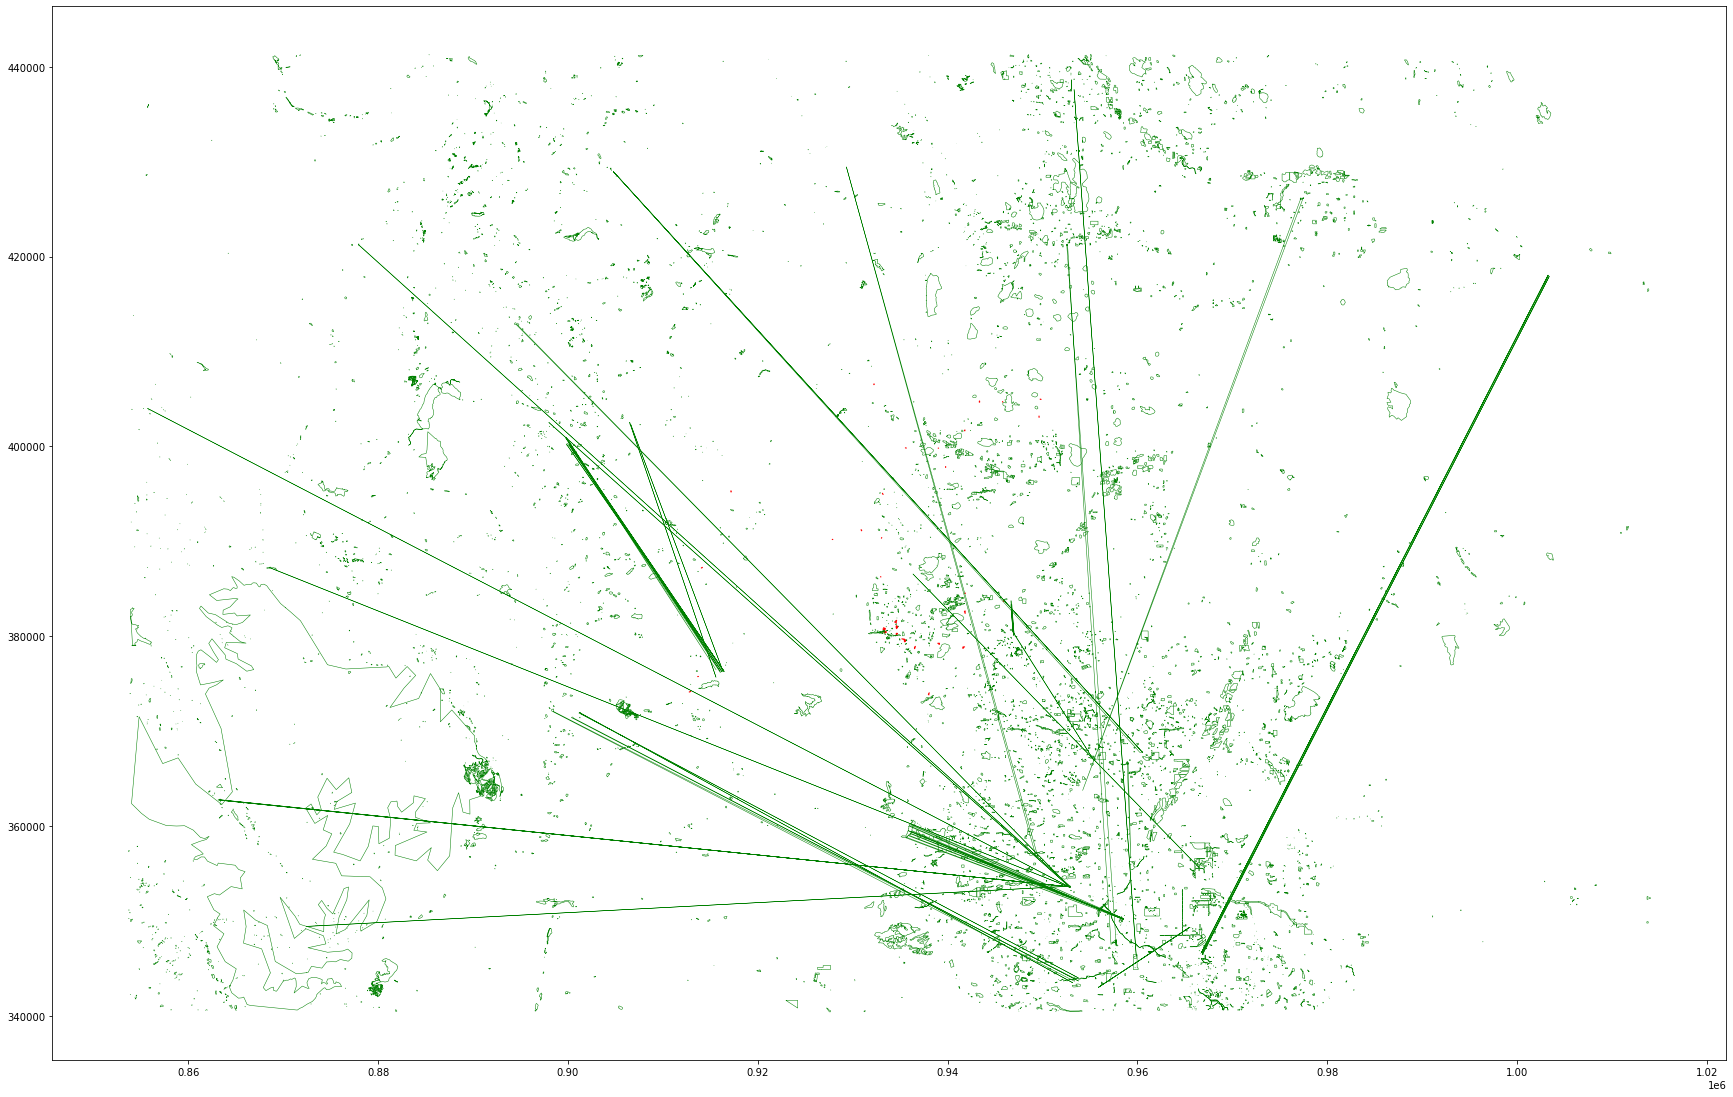

In [1035]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
nature_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# There is some invalid polygon in the shape file that need to pass through zero geom to correct it

In [1036]:
nature_proj["geometry2"]=nature_proj.geometry.buffer(0)
nature_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                            geometry  \
0  POLYGON ((949493.289 439485.899, 949493.890 43...   
1  POLYGON ((951244.135 428534.152, 951369.968 42...   
2  POLYGON ((953977.052 429201.052, 954080.914 42...   
3  POLYGON ((951092.866 424971.450, 951202.803 42...   
4  POLYGON ((949814.218 425574.299, 949819.443 42...   

                                           geometry2  
0  POLYGON ((949493.289 439485.899, 949493.890 43...  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...

In [1037]:
# Now drop geometry column and rename geometry 2 equal to geometry again
nature_proj1=nature_proj.drop(["geometry"],axis=1)
nature_proj1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                           geometry2  
0  POLYGON ((949493.289 439485.899, 949493.890 43...  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...

In [1038]:
nature_proj1.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
nature_proj1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                            geometry  
0  POLYGON ((949493.289 439485.899, 949493.890 43...  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...

In [1039]:
# Clip the data using GeoPandas clip
buffer_clip_nature = gpd.clip(nature_proj1, gdf1)
buffer_clip_nature.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id          name    type  \
4078  242156778          None  forest   
4088  242157180          None  forest   
4094  242159639          None  forest   
4096  242160370          None  forest   
4100  242161211          None  forest   
4743  306783053          None   water   
5528  366142308          None    park   
6291  423440803          None    park   
6783  482551237          None  forest   
7073  533289100  Central Park    park   

                                               geometry  
4078  POLYGON ((933252.261 380515.166, 933252.053 38...  
4088  POLYGON ((933257.162 380507.800, 933264.649 38...  
4094  POLYGON ((933392.567 380441.653, 933380.839 38...  
4096  POLYGON ((934593.526 380079.178, 934592.870 38...  
4100  POLYGON ((934644.200 380096.002, 934613.311 38...  
4743  POLYGON ((946013.886 383696.229, 946010.687 38...  
5528  POLYGON ((941820.055 384458.052, 941814.113 38...  
6291  POLYGON ((935649.937 379575.178, 935648.396 37...  
6783  POLYGON ((933509.272 380574.425, 933511.986 38...  
7073  POLYGON ((933278.465 380527.539, 933269.377 38...

In [1040]:
inter_nature=gpd.overlay(gdf1, buffer_clip_nature, how='intersection', make_valid=True, keep_geom_type=False)
inter_nature.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                 site_name sensor_type  year   region  \
0  P002BOU   Folsom at Boulder Creek   permanent  2019  Boulder   
1  P002BOU   Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU            Folsom at Pine   permanent  2019  Boulder   
3  P004BOU       Folsom at South St.   permanent  2019  Boulder   
4  P005BOU  Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0  479.543452  29.739726  10.452055   5359.0  40.012846   
1             2.0  479.543452  29.739726  10.452055   5359.0  40.012846   
2             1.0  607.273809  52.397260  16.424658   4518.0  40.024197   
3             2.0  502.851786  29.904110   9.972603   3750.0  40.019358   
4             2.0  601.530238  20.808219   9.095890   2382.0  40.017376   

    longitude                                            comment  \
0 -105.263103                                                NaN   
1 -105.263103                                                NaN   
2 -105.263773  obsolete OSM link parallel to street link (Id=...   
3 -105.263097                                                NaN   
4 -105.278436                                                NaN   

   osm_id_sensor buff_dist  buffer_area     osm_id          name    type  \
0     43176757.0       0.1     0.022655  242160370          None  forest   
1     43176757.0       0.1     0.022655  242161211          None  forest   
2    439968204.0       0.1     0.027259  608811885    Bluff Park    park   
3     43313642.0       0.1     0.031218  608703523   Sinton Park    park   
4     46148772.0       0.1     0.034636  533289100  Central Park    park   

                                            geometry  
0  POLYGON ((934592.870 380079.448, 934592.176 38...  
1  POLYGON ((934702.467 380116.410, 934699.704 38...  
2  POLYGON ((934530.964 381628.358, 934535.551 38...  
3  POLYGON ((934764.165 381068.624, 934768.944 38...  
4  POLYGON ((933365.230 380570.109, 933359.351 38...

In [1041]:
inter_nature["Area"]=inter_nature["geometry"].area*10.76 # in ft2
inter_nature.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                 site_name sensor_type  year   region  \
0  P002BOU   Folsom at Boulder Creek   permanent  2019  Boulder   
1  P002BOU   Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU            Folsom at Pine   permanent  2019  Boulder   
3  P004BOU       Folsom at South St.   permanent  2019  Boulder   
4  P005BOU  Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...   longitude  \
0             2.0  479.543452  29.739726  10.452055   5359.0  ... -105.263103   
1             2.0  479.543452  29.739726  10.452055   5359.0  ... -105.263103   
2             1.0  607.273809  52.397260  16.424658   4518.0  ... -105.263773   
3             2.0  502.851786  29.904110   9.972603   3750.0  ... -105.263097   
4             2.0  601.530238  20.808219   9.095890   2382.0  ... -105.278436   

                                             comment osm_id_sensor  buff_dist  \
0                                                NaN    43176757.0        0.1   
1                                                NaN    43176757.0        0.1   
2  obsolete OSM link parallel to street link (Id=...   439968204.0        0.1   
3                                                NaN    43313642.0        0.1   
4                                                NaN    46148772.0        0.1   

  buffer_area     osm_id          name    type  \
0    0.022655  242160370          None  forest   
1    0.022655  242161211          None  forest   
2    0.027259  608811885    Bluff Park    park   
3    0.031218  608703523   Sinton Park    park   
4    0.034636  533289100  Central Park    park   

                                            geometry          Area  
0  POLYGON ((934592.870 380079.448, 934592.176 38...  38055.284468  
1  POLYGON ((934702.467 380116.410, 934699.704 38...  33847.990771  
2  POLYGON ((934530.964 381628.358, 934535.551 38...   1443.983613  
3  POLYGON ((934764.165 381068.624, 934768.944 38...   4319.621749  
4  POLYGON ((933365.230 380570.109, 933359.351 38...  23455.985825  

[5 rows x 21 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

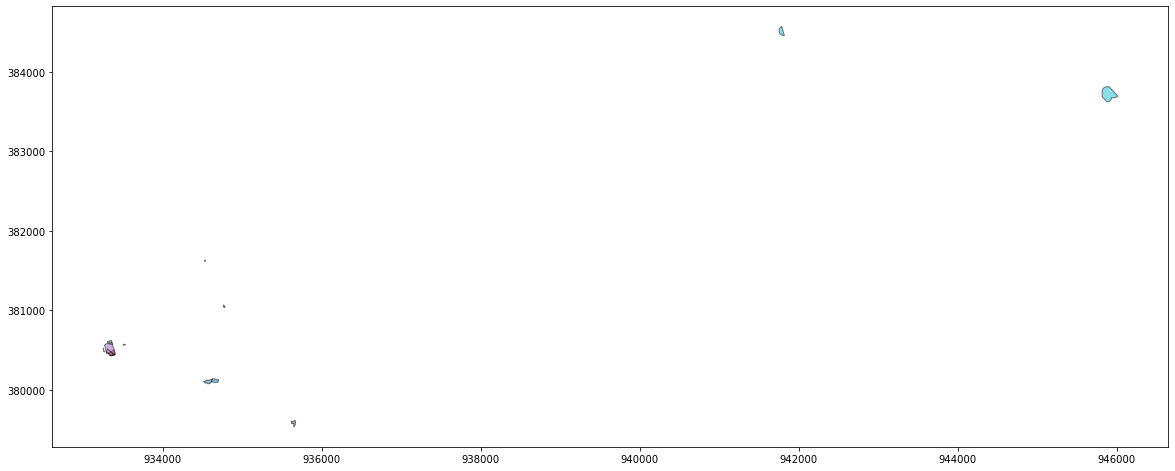

In [1042]:
inter_nature.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

In [1043]:
output_nature=inter_nature.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_nature.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    type           Area
0     33869417.0  forest   39436.560451
1     33869417.0    park  157626.551094
2     43176757.0  forest   71903.275239
3     43313642.0    park    4319.621749
4     46148772.0    park   23455.985825

In [1044]:
# Calculate park area
park  = inter_nature[inter_nature['type'].str.contains('park')]
output_park = park.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_park.columns=['osm_id',"Park Area"]
output_park.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Park Area
0  33869417.0  157626.551094
1  43313642.0    4319.621749
2  46148772.0   23455.985825
3  92826267.0   40422.185126
4  97343136.0   47784.347270

In [1045]:
# Calculate water area
water  = inter_nature[inter_nature['type'].str.contains('water')]
output_water= water.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_water.columns=['osm_id',"Water Area"]
output_water.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Water Area
0  46331123.0  249840.170944

In [1046]:
# Calculate forest area
forest  = inter_nature[inter_nature['type'].str.contains('forest')]
output_forest= forest.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_forest.columns=['osm_id',"Forest Area"]
output_forest.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   Forest Area
0  33869417.0  39436.560451
1  43176757.0  71903.275239
2  92826267.0  19223.185961

# Use the Point Shape file to calculate the Bicycle parking, Bus/Train stops, Intersection Density, School/College/University

In [1047]:
#pts=gpd.read_file("../input/osm-data/points.shp")
pts.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp          name             type  \
0  25689366      None          None  traffic_signals   
1  25689368      None          None   turning_circle   
2  25698637      None  King Soopers             fuel   
3  25757782      None          None  traffic_signals   
4  25757811      None          None         crossing   

                      geometry  
0  POINT (-105.26273 39.98123)  
1  POINT (-105.26134 39.98138)  
2  POINT (-105.24934 39.98546)  
3  POINT (-105.25313 40.00374)  
4  POINT (-105.25353 40.00732)

In [1048]:
# set the co-ordinate system first
#pts = pts.set_crs("EPSG:4326")
# Let's take a copy of our layer
pts_proj = pts.copy()

# Reproject the geometries by replacing the values with projected ones
pts_proj = pts_proj.to_crs(epsg=2772)
pts_proj.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp          name             type  \
0  25689366      None          None  traffic_signals   
1  25689368      None          None   turning_circle   
2  25698637      None  King Soopers             fuel   
3  25757782      None          None  traffic_signals   
4  25757811      None          None         crossing   
5  25758250      None          None         crossing   
6  25765902      None          None  traffic_signals   
7  25765915      None          None         crossing   
8  25765918      None          None         crossing   
9  25765921      None          None  traffic_signals   

                        geometry  
0  POINT (934669.155 376762.300)  
1  POINT (934787.842 376779.862)  
2  POINT (935811.248 377235.581)  
3  POINT (935482.309 379263.921)  
4  POINT (935447.116 379661.816)  
5  POINT (935881.041 379696.543)  
6  POINT (932858.690 380740.750)  
7  POINT (933296.153 380859.656)  
8  POINT (933408.473 380890.126)  
9  POINT (933520.535 380920.676)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

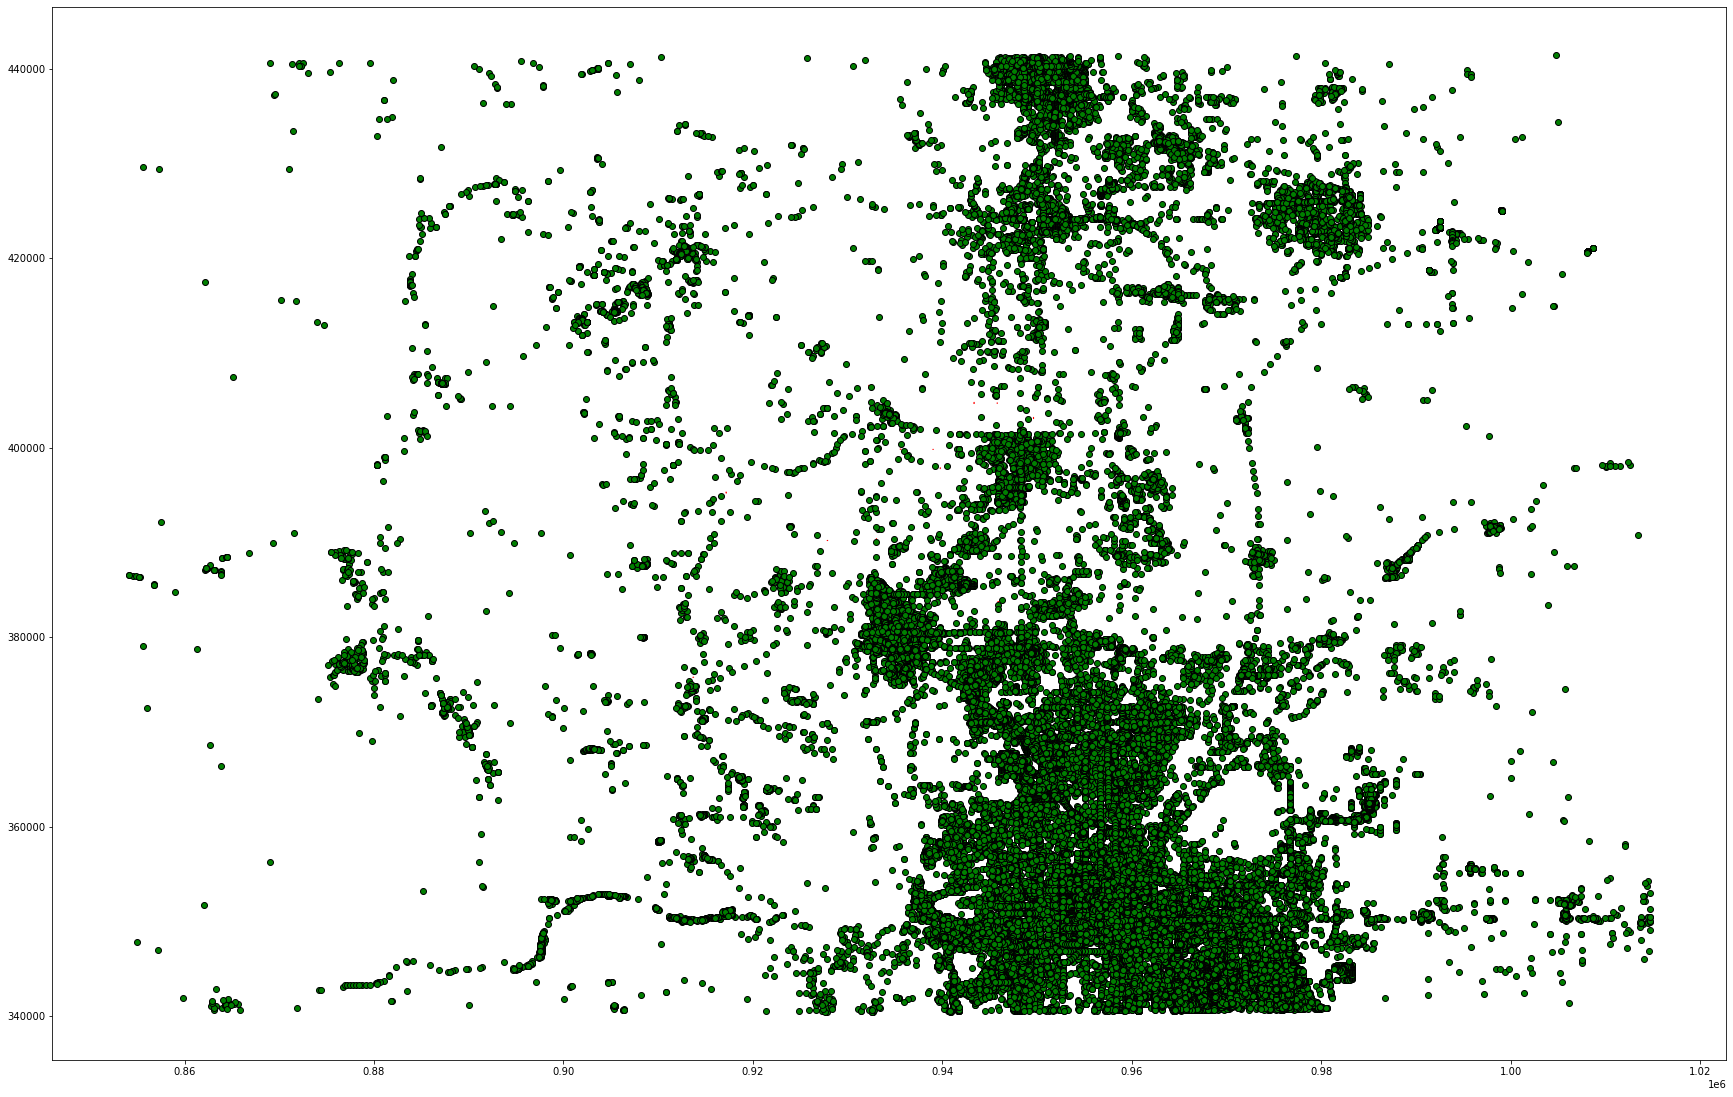

In [1049]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
pts_proj.plot(color="green",edgecolor='k',ax=ax) #Use your second dataframe

In [1050]:
# Clip the data using GeoPandas clip
buffer_clip_pts = gpd.clip(pts_proj, gdf1)
buffer_clip_pts.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp  name             type  \
4       25757811      None  None         crossing   
7       25765915      None  None         crossing   
8       25765918      None  None         crossing   
9485   176417606      None  None  traffic_signals   
9486   176417621      None  None  traffic_signals   
9487   176417625      None  None  traffic_signals   
9593   176429348      None  None  traffic_signals   
9639   176434236      None  None  traffic_signals   
9641   176434261      None  None         crossing   
10135  176486618      None  None         crossing   

                            geometry  
4      POINT (935447.116 379661.816)  
7      POINT (933296.153 380859.656)  
8      POINT (933408.473 380890.126)  
9485   POINT (933297.109 380408.393)  
9486   POINT (933215.130 380715.435)  
9487   POINT (933184.804 380830.011)  
9593   POINT (941839.235 382576.926)  
9639   POINT (933438.438 380777.782)  
9641   POINT (934640.845 381105.213)  
10135  POINT (938006.755 373898.326)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


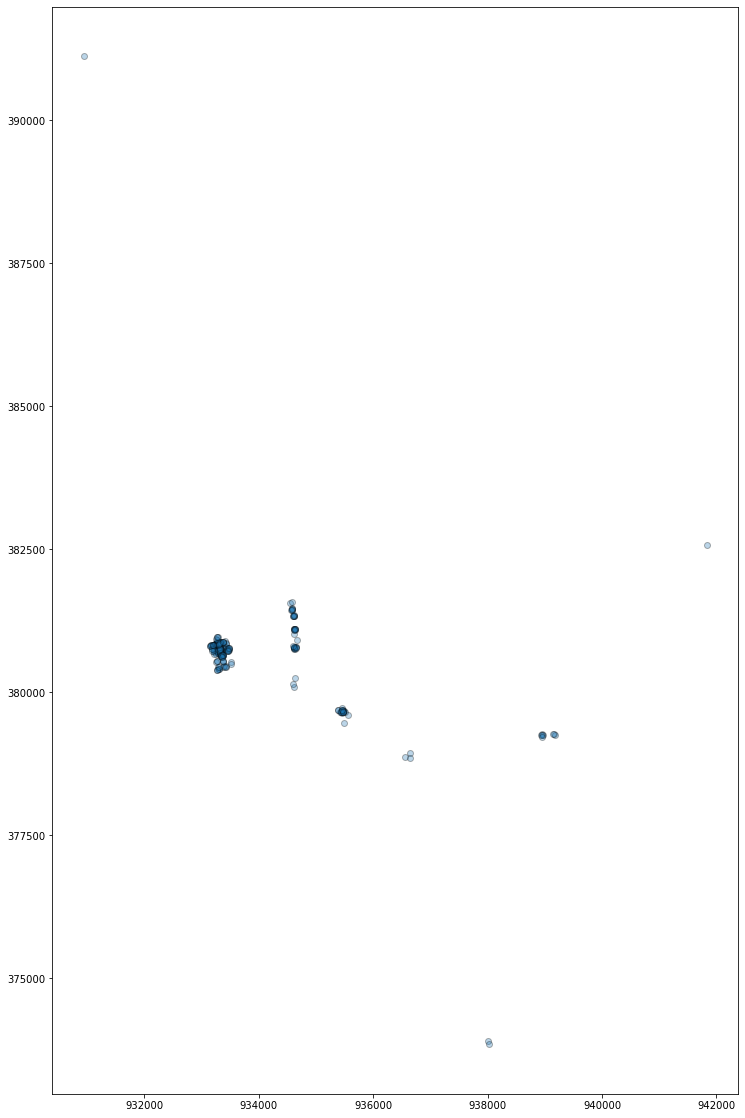

In [1051]:
ax = buffer_clip_pts.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1052]:
inter_pts=gpd.overlay(gdf1, buffer_clip_pts, how='intersection', make_valid=True, keep_geom_type=False)
inter_pts.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                site_name sensor_type  year   region  \
0  P002BOU  Folsom at Boulder Creek   permanent  2019  Boulder   
1  P002BOU  Folsom at Boulder Creek   permanent  2019  Boulder   
2  P002BOU  Folsom at Boulder Creek   permanent  2019  Boulder   
3  P003BOU           Folsom at Pine   permanent  2019  Boulder   
4  P003BOU           Folsom at Pine   permanent  2019  Boulder   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...   longitude  \
0             2.0  479.543452  29.739726  10.452055   5359.0  ... -105.263103   
1             2.0  479.543452  29.739726  10.452055   5359.0  ... -105.263103   
2             2.0  479.543452  29.739726  10.452055   5359.0  ... -105.263103   
3             1.0  607.273809  52.397260  16.424658   4518.0  ... -105.263773   
4             1.0  607.273809  52.397260  16.424658   4518.0  ... -105.263773   

                                             comment osm_id_sensor  buff_dist  \
0                                                NaN    43176757.0        0.1   
1                                                NaN    43176757.0        0.1   
2                                                NaN    43176757.0        0.1   
3  obsolete OSM link parallel to street link (Id=...   439968204.0        0.1   
4  obsolete OSM link parallel to street link (Id=...   439968204.0        0.1   

  buffer_area      osm_id  timestamp                 name             type  \
0    0.022655   424904893       None  Folsom St & Taft Dr         bus_stop   
1    0.022655   424912781       None  Folsom St & Taft Dr         bus_stop   
2    0.022655 -1841319043       None                 None         crossing   
3    0.027259   176507095       None                 None         crossing   
4    0.027259   176515885       None                 None  traffic_signals   

                        geometry  
0  POINT (934611.544 380099.046)  
1  POINT (934604.949 380138.777)  
2  POINT (934636.408 380257.876)  
3  POINT (934611.562 381336.258)  
4  POINT (934579.343 381446.404)  

[5 rows x 21 columns]

# Calculate the bicycle parking

In [1053]:
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
b_parking = inter_pts[inter_pts['type'].str.contains('bicycle_parking')]
b_parking.head(5)


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                             site_name sensor_type  year   region  \
45   P005BOU              Eco-Totem 13th at Walnut   permanent  2019  Boulder   
46   P005BOU              Eco-Totem 13th at Walnut   permanent  2019  Boulder   
86   P005BOU              Eco-Totem 13th at Walnut   permanent  2019  Boulder   
95   P005BOU              Eco-Totem 13th at Walnut   permanent  2019  Boulder   
211  P010BOU  Broadway Path south of Boulder Creek   permanent  2019  Boulder   

     travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
45              2.0  601.530238  20.808219   9.095890   2382.0  ...   
46              2.0  601.530238  20.808219   9.095890   2382.0  ...   
86              2.0  601.530238  20.808219   9.095890   2382.0  ...   
95              2.0  601.530238  20.808219   9.095890   2382.0  ...   
211             2.0  415.817968  16.698630   6.972603    172.0  ...   

      longitude  comment osm_id_sensor  buff_dist buffer_area     osm_id  \
45  -105.278436      NaN    46148772.0        0.1    0.034636  974637201   
46  -105.278436      NaN    46148772.0        0.1    0.034636  974637203   
86  -105.278436      NaN    46148772.0        0.1    0.034636 -445552918   
95  -105.278436      NaN    46148772.0        0.1    0.034636 -445552840   
211 -105.277587      NaN    92826267.0        0.1    0.012641 -134641907   

     timestamp  name             type                       geometry  
45        None  None  bicycle_parking  POINT (933289.032 380839.763)  
46        None  None  bicycle_parking  POINT (933306.646 380845.503)  
86        None  None  bicycle_parking  POINT (933342.378 380669.363)  
95        None  None  bicycle_parking  POINT (933325.037 380724.958)  
211       None  None  bicycle_parking  POINT (933421.604 380454.672)  

[5 rows x 21 columns]

In [1054]:
output_bparking=b_parking.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bparking.columns=["osm_id","Bicycle Parking"]
output_bparking.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bicycle Parking
0  33869417.0                5
1  46148772.0                4
2  92826267.0                1

# Calculate bus stops

In [1055]:
transit_stops= inter_pts[inter_pts['type'].str.contains('bus_stop')]
transit_stops.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                 site_name sensor_type  year   region  \
0    P002BOU   Folsom at Boulder Creek   permanent  2019  Boulder   
1    P002BOU   Folsom at Boulder Creek   permanent  2019  Boulder   
132  P005BOU  Eco-Totem 13th at Walnut   permanent  2019  Boulder   
133  P005BOU  Eco-Totem 13th at Walnut   permanent  2019  Boulder   
134  P005BOU  Eco-Totem 13th at Walnut   permanent  2019  Boulder   

     travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0               2.0  479.543452  29.739726  10.452055   5359.0  ...   
1               2.0  479.543452  29.739726  10.452055   5359.0  ...   
132             2.0  601.530238  20.808219   9.095890   2382.0  ...   
133             2.0  601.530238  20.808219   9.095890   2382.0  ...   
134             2.0  601.530238  20.808219   9.095890   2382.0  ...   

      longitude  comment osm_id_sensor  buff_dist buffer_area     osm_id  \
0   -105.263103      NaN    43176757.0        0.1    0.022655  424904893   
1   -105.263103      NaN    43176757.0        0.1    0.022655  424912781   
132 -105.278436      NaN    46148772.0        0.1    0.034636  424904230   
133 -105.278436      NaN    46148772.0        0.1    0.034636  424904945   
134 -105.278436      NaN    46148772.0        0.1    0.034636  424909305   

     timestamp                             name      type  \
0         None              Folsom St & Taft Dr  bus_stop   
1         None              Folsom St & Taft Dr  bus_stop   
132       None  Downtown Boulder Station Gate A  bus_stop   
133       None  Downtown Boulder Station Gate 2  bus_stop   
134       None         Downtown Boulder Station  bus_stop   

                          geometry  
0    POINT (934611.544 380099.046)  
1    POINT (934604.949 380138.777)  
132  POINT (933453.276 380760.454)  
133  POINT (933477.394 380742.972)  
134  POINT (933470.006 380727.520)  

[5 rows x 21 columns]

In [1056]:
output_bstop=transit_stops.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bstop.columns=["osm_id","Bus Stops"]
output_bstop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bus Stops
0  33869417.0          3
1  37998424.0          8
2  43176757.0          2
3  46148772.0         11
4  92826267.0          1

# Calculate school/college/university

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


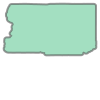

In [1057]:
#sc= inter_pts[inter_pts['type'].str.contains('school|college')]
#sc
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon

In [1058]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)
#scl[['amenity', 'name', 'geometry']]

In [1059]:
# set the co-ordinate system first
scl = scl.set_crs("EPSG:4326")
# Let's take a copy of our layer
scl_proj = scl.copy()

# Reproject the geometries by replacing the values with projected ones
scl_proj =scl_proj.to_crs(epsg=2772)
scl_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_id      osmid element_type                       geometry  \
0  node/358912766  358912766         node  POINT (947800.480 395150.843)   
1  node/358912774  358912774         node  POINT (948806.536 397771.844)   
2  node/358912782  358912782         node  POINT (947695.142 397426.888)   
3  node/358912786  358912786         node  POINT (947434.185 397765.729)   
4  node/358913140  358913140         node  POINT (934304.125 378936.844)   

  amenity   ele gnis:county_id gnis:created gnis:feature_id gnis:state_id  \
0  school  1514            013   10/13/1978          178366            08   
1  school  1519            013   10/13/1978          178368            08   
2  school  1525            013   10/13/1978          178370            08   
3  school  1527            013   10/13/1978          178371            08   
4  school  1651            013   08/31/1992          178649            08   

   ... district phone addr:country diocese  fax building:levels roof:levels  \
0  ...      NaN   NaN          NaN     NaN  NaN             NaN         NaN   
1  ...      NaN   NaN          NaN     NaN  NaN             NaN         NaN   
2  ...      NaN   NaN          NaN     NaN  NaN             NaN         NaN   
3  ...      NaN   NaN          NaN     NaN  NaN             NaN         NaN   
4  ...      NaN   NaN          NaN     NaN  NaN             NaN         NaN   

  area operator:type ways  
0  NaN           NaN  NaN  
1  NaN           NaN  NaN  
2  NaN           NaN  NaN  
3  NaN           NaN  NaN  
4  NaN           NaN  NaN  

[5 rows x 42 columns]

In [1060]:
scl_proj['geometry']=scl_proj['geometry'].centroid
scl_proj.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_id      osmid element_type                       geometry  \
0  node/358912766  358912766         node  POINT (947800.480 395150.843)   
1  node/358912774  358912774         node  POINT (948806.536 397771.844)   
2  node/358912782  358912782         node  POINT (947695.142 397426.888)   
3  node/358912786  358912786         node  POINT (947434.185 397765.729)   
4  node/358913140  358913140         node  POINT (934304.125 378936.844)   

  amenity   ele gnis:county_id gnis:created gnis:feature_id gnis:state_id  \
0  school  1514            013   10/13/1978          178366            08   
1  school  1519            013   10/13/1978          178368            08   
2  school  1525            013   10/13/1978          178370            08   
3  school  1527            013   10/13/1978          178371            08   
4  school  1651            013   08/31/1992          178649            08   

   ... district phone addr:country diocese  fax building:levels roof:levels  \
0  ...      NaN   NaN          NaN     NaN  NaN             NaN         NaN   
1  ...      NaN   NaN          NaN     NaN  NaN             NaN         NaN   
2  ...      NaN   NaN          NaN     NaN  NaN             NaN         NaN   
3  ...      NaN   NaN          NaN     NaN  NaN             NaN         NaN   
4  ...      NaN   NaN          NaN     NaN  NaN             NaN         NaN   

  area operator:type ways  
0  NaN           NaN  NaN  
1  NaN           NaN  NaN  
2  NaN           NaN  NaN  
3  NaN           NaN  NaN  
4  NaN           NaN  NaN  

[5 rows x 42 columns]

In [1061]:
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [ways, addr:state, name, site_name, gnis:feature_id, gnis:created, source, osm_id_sensor, gnis:edited, travel_pattern, wikidata, area, stv_c_adb, operator, region, access, landuse, site_id, osmid, addr:country, longitude, fax, religion, amenity, phone, unique_id, addr:street, wikipedia, AADBT, geometry, sensor_type, gnis:state_id, district, wheelchair, building:levels, stl_raw, addr:city, diocese, buffer_area, stv_adb, buff_dist, type, roof:levels, operator:type, addr:housenumber, year, toilets:wheelchair, denomination, gnis:county_id, building, comment, website, latitude, element_type, nodes, ele, addr:postcode, grades]
Index: []

[0 rows x 58 columns]

In [1062]:
scl_proj['geometry']=scl_proj['geometry'].centroid
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
output_school=inter_scl.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_school.columns=["osm_id","School"]
output_school.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [osm_id, School]
Index: []

# Closest distance to school

In [1063]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1064]:
ecoshort['min_dist_to_school'] = ecoshort.geometry.apply(min_distance_ppoly, args=(scl_proj,))*3.28084
output_school_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_school"]]
output_school_distance.columns=["osm_id","min_dist_to_school"]
output_school_distance=output_school_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_school_distance.head()

osm_id  min_dist_to_school
0   385509341.0         5155.748831
7    43176757.0         2995.203388
14  439968204.0         1809.498034
21   43313642.0         1954.097262
28   46148772.0         1671.759654

In [1065]:
# Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
coll = coll.set_crs("EPSG:4326")
# Let's take a copy of our layer
coll_proj = coll.copy()

# Reproject the geometries by replacing the values with projected ones
coll_proj =coll_proj.to_crs(epsg=2772)
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1066]:
output_college=inter_coll.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_college.columns=["osm_id","college"]
output_college.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [osm_id, college]
Index: []

# Closest distance to college

In [1067]:
ecoshort['min_dist_to_college'] = ecoshort.geometry.apply(min_distance_ppoly, args=(coll_proj,))*3.28084
output_college_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_college"]]
output_college_distance.columns=["osm_id","min_dist_to_college"]
output_college_distance=output_college_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_college_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_college
0   385509341.0         22889.223647
7    43176757.0          3427.045328
14  439968204.0          6857.187175
21   43313642.0          5322.953049
28   46148772.0          4333.880131

In [1068]:
# Import college
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
uni = uni.set_crs("EPSG:4326")
# Let's take a copy of our layer
uni_proj = uni.copy()

# Reproject the geometries by replacing the values with projected ones
uni_proj =uni_proj.to_crs(epsg=2772)
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1069]:
output_university=inter_uni.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["osm_id","University"]
output_university.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [osm_id, University]
Index: []

In [1070]:
#scu=pd.concat([sc,u],axis=0)
#scu

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Closest distance to university

In [1071]:
ecoshort['min_dist_to_university'] = ecoshort.geometry.apply(min_distance_ppoly, args=(uni_proj,))*3.28084
output_university_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_university"]]
output_university_distance.columns=["osm_id","min_dist_to_university"]
output_university_distance=output_university_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_university_distance.head()

osm_id  min_dist_to_university
0   385509341.0            14959.494580
7    43176757.0             1166.086558
14  439968204.0             3806.818604
21   43313642.0             2219.966504
28   46148772.0             3434.960037

# Calculate intersection density

In [1072]:
# lets bring the road shape file node to calculate the intersection density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1073]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
from shapely.geometry.multipolygon import MultiPolygon
from shapely import wkt


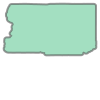

In [1074]:
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon


In [1075]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
ox.config(log_file=True,log_console=True,use_cache=True)
#place="Portland,USA"
#Construct the street network
G=ox.graph_from_polygon(polygon,network_type="drive",simplify=False)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(G,node_color='yellow',edge_color='blue')

In [1076]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head(5)

y           x  street_count highway  ref  \
osmid                                                        
25676629  39.982266 -105.263876             5     NaN  NaN   
25676633  39.980297 -105.260134             4     NaN  NaN   
25676636  39.984876 -105.269268             2     NaN  NaN   
25678877  39.997891 -105.253110             2     NaN  NaN   
25678878  40.002748 -105.253124             3     NaN  NaN   

                             geometry  
osmid                                  
25676629  POINT (-105.26388 39.98227)  
25676633  POINT (-105.26013 39.98030)  
25676636  POINT (-105.26927 39.98488)  
25678877  POINT (-105.25311 39.99789)  
25678878  POINT (-105.25312 40.00275)

In [1077]:
# set the co-ordinate system first
node = nodes.set_crs("EPSG:4326")
# Let's take a copy of our layer
node_proj = node.copy()

# Reproject the geometries by replacing the values with projected ones
node_proj = node_proj.to_crs(epsg=2772)
node_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y           x  street_count highway  ref  \
osmid                                                        
25676629  39.982266 -105.263876             5     NaN  NaN   
25676633  39.980297 -105.260134             4     NaN  NaN   
25676636  39.984876 -105.269268             2     NaN  NaN   
25678877  39.997891 -105.253110             2     NaN  NaN   
25678878  40.002748 -105.253124             3     NaN  NaN   

                               geometry  
osmid                                    
25676629  POINT (934570.808 376877.599)  
25676633  POINT (934890.955 376659.816)  
25676636  POINT (934109.474 377166.109)  
25678877  POINT (935485.516 378614.897)  
25678878  POINT (935482.811 379154.224)

In [1078]:
# Clip the data using GeoPandas clip
buffer_clip_node = gpd.clip(node_proj, gdf1)
buffer_clip_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y           x  street_count   highway  ref  \
osmid                                                          
25757755  40.005172 -105.253118             4       NaN  NaN   
25757810  40.006644 -105.252944             2       NaN  NaN   
25757811  40.007321 -105.253525             2  crossing  NaN   
25757812  40.006650 -105.251613             3       NaN  NaN   
25757821  40.007348 -105.253919             2       NaN  NaN   

                               geometry  
osmid                                    
25757755  POINT (935482.557 379423.352)  
25757810  POINT (935496.992 379586.853)  
25757811  POINT (935447.116 379661.816)  
25757812  POINT (935610.600 379587.759)  
25757821  POINT (935413.476 379664.809)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


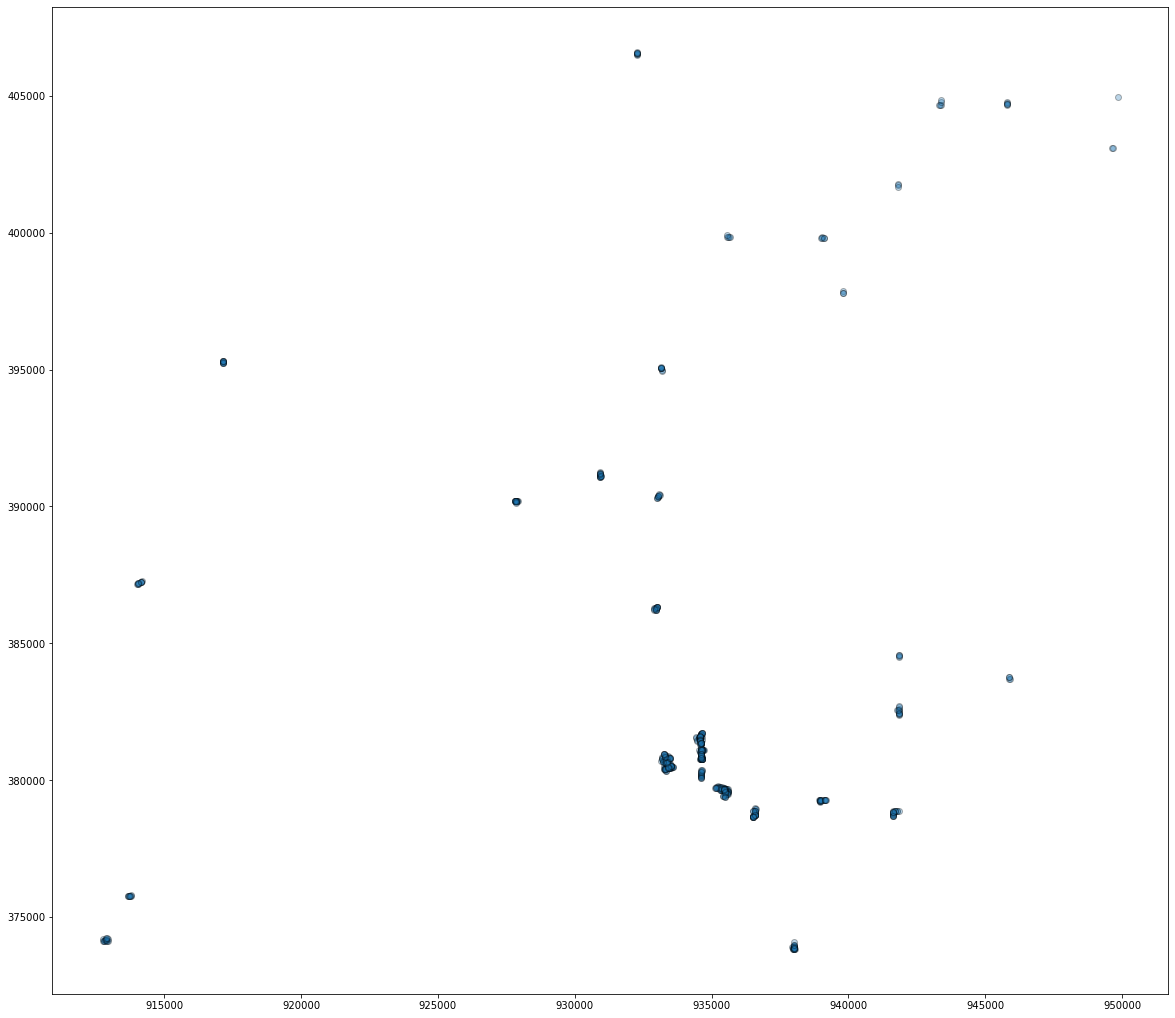

In [1079]:
ax = buffer_clip_node.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1080]:
 inter_node=gpd.overlay(gdf1, buffer_clip_node, how='intersection', make_valid=True, keep_geom_type=False)
 inter_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  comment  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
4             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   

   osm_id_sensor buff_dist  buffer_area          y           x  street_count  \
0    385509341.0       0.1     0.005766  40.067023 -105.282610             3   
1    385509341.0       0.1     0.005766  40.067147 -105.282246             2   
2    385509341.0       0.1     0.005766  40.067187 -105.282194             2   
3    385509341.0       0.1     0.005766  40.067233 -105.282160             2   
4    385509341.0       0.1     0.005766  40.067285 -105.282134             2   

   highway  ref                       geometry  
0      NaN  NaN  POINT (932947.544 386284.181)  
1      NaN  NaN  POINT (932978.605 386298.025)  
2      NaN  NaN  POINT (932982.987 386302.410)  
3      NaN  NaN  POINT (932985.909 386307.525)  
4      NaN  NaN  POINT (932988.087 386313.359)  

[5 rows x 22 columns]

In [1081]:
output_intersection_density= inter_node.groupby(by=['osm_id_sensor'])['geometry'].count()
output_intersection_density12=output_intersection_density.reset_index()
output_intersection_density12

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  geometry
0      17013477.0        11
1      17018830.0         3
2      17022894.0         5
3      17022948.0        10
4      17024738.0         7
5      17025168.0         5
6      17025704.0         8
7      17026172.0        15
8      17027097.0         8
9      17027290.0        15
10     33869417.0        44
11     37998424.0        43
12     43176757.0        17
13     43181540.0        12
14     43313642.0        63
15     43751772.0        14
16     46148772.0        73
17     46331123.0         4
18     48487064.0         1
19     48488846.0         2
20     89383623.0        24
21     90285789.0        10
22     92826267.0        17
23     97343136.0         7
24    132769465.0        35
25    212055825.0        51
26    327522296.0        10
27    385509341.0        16
28    397727284.0        30
29    439968204.0        66

In [1082]:
b_area=gdf1.loc[:,['osm_id_sensor','buffer_area']]
b_area

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffer_area
6      385509341.0     0.005766
13      43176757.0     0.022655
20     439968204.0     0.027259
27      43313642.0     0.031218
34      46148772.0     0.034636
48     397727284.0     0.018775
55     212055825.0     0.029160
62      37998424.0     0.019232
69      92826267.0     0.012641
76      33869417.0     0.030601
83      17022894.0     0.006727
90      17025168.0     0.011177
97      97343136.0     0.009583
104     90285789.0     0.005678
111     90285789.0     0.008314
118     17018830.0     0.008120
132     48488846.0     0.009866
139     17022948.0     0.006824
153     48487064.0     0.008634
160     97343136.0     0.007615
167     46331123.0     0.012023
174    132769465.0     0.020542
181    132769465.0     0.018176
188     89383623.0     0.016059
195     43181540.0     0.019368
202    327522296.0     0.010562
216     17013477.0     0.009898
223     17025704.0     0.007201
251     43751772.0     0.006331
258     17026172.0     0.011583
265     17024738.0     0.008629
272     17027097.0     0.010394
279     17027290.0     0.010196

In [1083]:
output_intersection_density1=pd.merge(output_intersection_density12,b_area,left_on="osm_id_sensor",right_on='osm_id_sensor',how="inner")
output_intersection_density1["Intersection Density"]=output_intersection_density1["geometry"]/output_intersection_density1["buffer_area"]
output_intersection_density1=output_intersection_density1.loc[:,['osm_id_sensor','Intersection Density']]
output_intersection_density1.columns=['osm_id','OSM_node_Density']
output_intersection_density1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  OSM_node_Density
0  17013477.0       1111.290999
1  17018830.0        369.446756
2  17022894.0        743.307827
3  17022948.0       1465.370332
4  17024738.0        811.234524

# Calculate intersection density

In [1084]:
custom_filter = ox.downloader._get_osm_filter("drive")
custom_filter += '["highway"!~"motor"]'  # filter out freeways
Ga = ox.graph_from_polygon(polygon, custom_filter=custom_filter, simplify=True)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1085]:
nodesa, edgesa = ox.graph_to_gdfs(Ga)
# set the co-ordinate system first
nodea = nodesa.set_crs("EPSG:4326")
# Let's take a copy of our layer
nodea_proj = nodea.copy()

# Reproject the geometries by replacing the values with projected ones
nodea_proj = nodea_proj.to_crs(epsg=2772)
nodea_proj.head(5)

y           x  street_count highway  \
osmid                                                   
25676629  39.982266 -105.263876             4     NaN   
25676633  39.980297 -105.260134             4     NaN   
25678878  40.002748 -105.253124             3     NaN   
25689292  39.982786 -105.264445             3     NaN   
25689294  39.983823 -105.266339             3     NaN   

                               geometry  
osmid                                    
25676629  POINT (934570.808 376877.599)  
25676633  POINT (934890.955 376659.816)  
25678878  POINT (935482.811 379154.224)  
25689292  POINT (934521.978 376935.227)  
25689294  POINT (934359.947 377049.916)

In [1086]:
buffer_clip_nodea = gpd.clip(nodea_proj, gdf1)
inter_nodea=gpd.overlay(gdf1, buffer_clip_nodea, how='intersection', make_valid=True, keep_geom_type=False)
output_intersection_densitya= inter_nodea.groupby(by=['osm_id_sensor'])['geometry'].count()
output_intersection_density12a=output_intersection_densitya.reset_index()
output_intersection_density1a=pd.merge(output_intersection_density12a,b_area,left_on="osm_id_sensor",right_on='osm_id_sensor',how="inner")
output_intersection_density1a["Intersection Density"]=output_intersection_density1a["geometry"]/output_intersection_density1a["buffer_area"]
output_intersection_density1a=output_intersection_density1a.loc[:,['osm_id_sensor','Intersection Density']]
output_intersection_density1a.columns=['osm_id','Intersection_Density']
output_intersection_density1a.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Intersection_Density
0  17013477.0            202.052909
1  17018830.0            123.148919
2  17022894.0            148.661565
3  17022948.0            146.537033
4  17025168.0             89.466577

# Calculate the Number of Lanes

In [1087]:
edges.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid              name       highway maxspeed  \
u        v          key                                                       
25676629 176444102  0     17019278     Hillsdale Way   residential   20 mph   
         176583402  0     17027069  Hillsdale Circle   residential   20 mph   
         6942401729 0    741582932  Table Mesa Drive      tertiary   25 mph   
         25689292   0    741582933  Table Mesa Drive      tertiary   25 mph   
25676633 392990958  0      4279016  Table Mesa Court   residential   20 mph   
         4917913853 0      8138098  Table Mesa Drive      tertiary   25 mph   
         399325950  0     61840750     Lehigh Street   residential      NaN   
25676636 176399655  0     34508878         NCAR Road  unclassified   35 mph   
         515579278  0     34508878         NCAR Road  unclassified   35 mph   
25678877 520753868  0      4271726       30th Street      tertiary   20 mph   

                         oneway   length lanes      access  ref bridge  \
u        v          key                                                  
25676629 176444102  0     False  179.618   NaN         NaN  NaN    NaN   
         176583402  0     False   47.207   NaN         NaN  NaN    NaN   
         6942401729 0      True    7.339     2         NaN  NaN    NaN   
         25689292   0     False   75.522     2         NaN  NaN    NaN   
25676633 392990958  0     False   34.539   NaN         NaN  NaN    NaN   
         4917913853 0      True    9.581     1         NaN  NaN    NaN   
         399325950  0     False   12.490   NaN         NaN  NaN    NaN   
25676636 176399655  0     False   21.981     2  permissive  NaN    NaN   
         515579278  0     False   25.323     2  permissive  NaN    NaN   
25678877 520753868  0      True   12.442     1         NaN  NaN    NaN   

                        junction width tunnel est_width  \
u        v          key                                   
25676629 176444102  0        NaN   NaN    NaN       NaN   
         176583402  0        NaN   NaN    NaN       NaN   
         6942401729 0        NaN   NaN    NaN       NaN   
         25689292   0        NaN   NaN    NaN       NaN   
25676633 392990958  0        NaN   NaN    NaN       NaN   
         4917913853 0        NaN   NaN    NaN       NaN   
         399325950  0        NaN   NaN    NaN       NaN   
25676636 176399655  0        NaN   NaN    NaN       NaN   
         515579278  0        NaN   NaN    NaN       NaN   
25678877 520753868  0        NaN   NaN    NaN       NaN   

                                                                  geometry  
u        v          key                                                     
25676629 176444102  0    LINESTRING (-105.26388 39.98227, -105.26547 39...  
         176583402  0    LINESTRING (-105.26388 39.98227, -105.26345 39...  
         6942401729 0    LINESTRING (-105.26388 39.98227, -105.26387 39...  
         25689292   0    LINESTRING (-105.26388 39.98227, -105.26445 39...  
25676633 392990958  0    LINESTRING (-105.26013 39.98030, -105.26013 39...  
         4917913853 0    LINESTRING (-105.26013 39.98030, -105.26025 39...  
         399325950  0    LINESTRING (-105.26013 39.98030, -105.26012 39...  
25676636 176399655  0    LINESTRING (-105.26927 39.98488, -105.26953 39...  
         515579278  0    LINESTRING (-105.26927 39.98488, -105.26897 39...  
25678877 520753868  0    LINESTRING (-105.25311 39.99789, -105.25310 39...

In [1088]:
print(edges.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1089]:
# set the co-ordinate system first
edge = edges.set_crs("EPSG:4326")
# Let's take a copy of our layer
edge_proj = edge.copy()

# Reproject the geometries by replacing the values with projected ones
edge_proj = edge_proj.to_crs(epsg=2772)
edge_proj.head(5)

osmid              name      highway maxspeed  \
u        v          key                                                      
25676629 176444102  0     17019278     Hillsdale Way  residential   20 mph   
         176583402  0     17027069  Hillsdale Circle  residential   20 mph   
         6942401729 0    741582932  Table Mesa Drive     tertiary   25 mph   
         25689292   0    741582933  Table Mesa Drive     tertiary   25 mph   
25676633 392990958  0      4279016  Table Mesa Court  residential   20 mph   

                         oneway   length lanes access  ref bridge junction  \
u        v          key                                                      
25676629 176444102  0     False  179.618   NaN    NaN  NaN    NaN      NaN   
         176583402  0     False   47.207   NaN    NaN  NaN    NaN      NaN   
         6942401729 0      True    7.339     2    NaN  NaN    NaN      NaN   
         25689292   0     False   75.522     2    NaN  NaN    NaN      NaN   
25676633 392990958  0     False   34.539   NaN    NaN  NaN    NaN      NaN   

                        width tunnel est_width  \
u        v          key                          
25676629 176444102  0     NaN    NaN       NaN   
         176583402  0     NaN    NaN       NaN   
         6942401729 0     NaN    NaN       NaN   
         25689292   0     NaN    NaN       NaN   
25676633 392990958  0     NaN    NaN       NaN   

                                                                  geometry  
u        v          key                                                     
25676629 176444102  0    LINESTRING (934570.808 376877.599, 934434.680 ...  
         176583402  0    LINESTRING (934570.808 376877.599, 934607.165 ...  
         6942401729 0    LINESTRING (934570.808 376877.599, 934570.888 ...  
         25689292   0    LINESTRING (934570.808 376877.599, 934521.978 ...  
25676633 392990958  0    LINESTRING (934890.955 376659.816, 934891.229 ...

In [1090]:
# Consider rows without NAN
edge_clean = edge_proj[edge_proj['lanes'].notna()]
edge_clean2 = edge_clean [edge_clean.lanes!=0]
edge_clean2.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid              name       highway maxspeed  \
u        v          key                                                       
25676629 6942401729 0    741582932  Table Mesa Drive      tertiary   25 mph   
         25689292   0    741582933  Table Mesa Drive      tertiary   25 mph   
25676633 4917913853 0      8138098  Table Mesa Drive      tertiary   25 mph   
25676636 176399655  0     34508878         NCAR Road  unclassified   35 mph   
         515579278  0     34508878         NCAR Road  unclassified   35 mph   
25678877 520753868  0      4271726       30th Street      tertiary   20 mph   
25678878 4005059893 0    572218792       30th Street     secondary   35 mph   
         5531567891 0    572218792       30th Street     secondary   35 mph   
25689292 515581371  0    741582933  Table Mesa Drive      tertiary   25 mph   
         25676629   0    741582933  Table Mesa Drive      tertiary   25 mph   

                         oneway  length lanes      access  ref bridge  \
u        v          key                                                 
25676629 6942401729 0      True   7.339     2         NaN  NaN    NaN   
         25689292   0     False  75.522     2         NaN  NaN    NaN   
25676633 4917913853 0      True   9.581     1         NaN  NaN    NaN   
25676636 176399655  0     False  21.981     2  permissive  NaN    NaN   
         515579278  0     False  25.323     2  permissive  NaN    NaN   
25678877 520753868  0      True  12.442     1         NaN  NaN    NaN   
25678878 4005059893 0     False  66.528     4         NaN  NaN    NaN   
         5531567891 0     False  51.140     4         NaN  NaN    NaN   
25689292 515581371  0     False  18.649     2         NaN  NaN    NaN   
         25676629   0     False  75.522     2         NaN  NaN    NaN   

                        junction width tunnel est_width  \
u        v          key                                   
25676629 6942401729 0        NaN   NaN    NaN       NaN   
         25689292   0        NaN   NaN    NaN       NaN   
25676633 4917913853 0        NaN   NaN    NaN       NaN   
25676636 176399655  0        NaN   NaN    NaN       NaN   
         515579278  0        NaN   NaN    NaN       NaN   
25678877 520753868  0        NaN   NaN    NaN       NaN   
25678878 4005059893 0        NaN   NaN    NaN       NaN   
         5531567891 0        NaN   NaN    NaN       NaN   
25689292 515581371  0        NaN   NaN    NaN       NaN   
         25676629   0        NaN   NaN    NaN       NaN   

                                                                  geometry  
u        v          key                                                     
25676629 6942401729 0    LINESTRING (934570.808 376877.599, 934570.888 ...  
         25689292   0    LINESTRING (934570.808 376877.599, 934521.978 ...  
25676633 4917913853 0    LINESTRING (934890.955 376659.816, 934881.354 ...  
25676636 176399655  0    LINESTRING (934109.474 377166.109, 934087.438 ...  
         515579278  0    LINESTRING (934109.474 377166.109, 934134.761 ...  
25678877 520753868  0    LINESTRING (935485.516 378614.897, 935486.285 ...  
25678878 4005059893 0    LINESTRING (935482.811 379154.224, 935482.660 ...  
         5531567891 0    LINESTRING (935482.811 379154.224, 935483.303 ...  
25689292 515581371  0    LINESTRING (934521.978 376935.227, 934509.940 ...  
         25676629   0    LINESTRING (934521.978 376935.227, 934570.808 ...

In [1091]:
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'lanes']

ecoshort['lanes'] = ecoshort.geometry.apply(nearest_linestring, df_lines=edge_clean2)
ecoshort
ecoshort_lane=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1092]:
ecoshort_lane

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                       site_name sensor_type  \
0    P001BOU                   B90004 US 36 North of Boulder   permanent   
7    P002BOU                         Folsom at Boulder Creek   permanent   
14   P003BOU                                  Folsom at Pine   permanent   
21   P004BOU                             Folsom at South St.   permanent   
28   P005BOU                        Eco-Totem 13th at Walnut   permanent   
35   P006BOU                90029 US 36 Southeast of Boulder   permanent   
42   P007BOU                                Baseline at Inca   permanent   
49   P008BOU              30th Street Just South of Colorado   permanent   
56   P009BOU                      Colorado Just West of 30th   permanent   
63   P010BOU            Broadway Path south of Boulder Creek   permanent   
70   P011BOU  COMBO 13th Street and Boulder Creek W of plaza   permanent   
77   S001BOU                                     WOODLAND RD  short-term   
84   S002BOU                                       N 83RD ST  short-term   
91   S003BOU                                       N 75TH ST  short-term   
98   S004BOU                                      HYGIENE RD  short-term   
112  S006BOU                                       N 65TH ST  short-term   
119  S007BOU                                  SAINT VRAIN RD  short-term   
126  S008BOU                                   VERMILLION RD  short-term   
133  S009BOU                                         NEVA RD  short-term   
140  S010BOU                                       N 87TH ST  short-term   
147  S011BOU                                      N 115TH ST  short-term   
161  S013BOU                                       N 95TH ST  short-term   
168  S014BOU                                     BASELINE RD  short-term   
182  S016BOU                                   CHERRYVALE RD  short-term   
189  S017BOU                                      VALMONT RD  short-term   
196  S018BOU                                    RIVERSIDE DR  short-term   
203  S019BOU                              LEFTHAND CANYON DR  short-term   
210  S020BOU                                BRAINARD LAKE DR  short-term   
217  S021BOU                                        RIDGE RD  short-term   
224  S022BOU                                       ELDORA RD  short-term   
231  S023BOU                              PEACEFUL VALLEY RD  short-term   
238  S024BOU                                     OVERLAND RD  short-term   
245  S025BOU                                 JAMES CANYON DR  short-term   
259  S027BOU                                BLUE MOUNTAIN RD  short-term   
266  S028BOU                                       NELSON RD  short-term   
280  S030BOU                                      KENOSHA RD  short-term   

     year   region  travel_pattern        AADBT     stv_adb  stv_c_adb  \
0    2019  Boulder             3.0   206.745402  102.547945  14.027397   
7    2019  Boulder             2.0   479.543452   29.739726  10.452055   
14   2019  Boulder             1.0   607.273809   52.397260  16.424658   
21   2019  Boulder             2.0   502.851786   29.904110   9.972603   
28   2019  Boulder             2.0   601.530238   20.808219   9.095890   
35   2019  Boulder             2.0   219.727182   50.205479  21.424658   
42   2019  Boulder             2.0   180.242262   31.575342   7.068493   
49   2019  Boulder             2.0   272.987302   14.561644   7.493151   
56   2019  Boulder             2.0   282.520833    5.082192   2.671233   
63   2019  Boulder             2.0   415.817968   16.698630   6.972603   
70   2019  Boulder             3.0  1085.607486   32.164384  11.698630   
77   2019  Boulder             NaN    52.680476    4.643836   0.589041   
84   2019  Boulder             NaN    33.525443   12.739726   2.397260   
91   2019  Boulder             NaN    76.506781   16.890411   2.917808   
98   2019  Boulder             NaN    24.936175   13.260274   1.917808   
112  201

In [1093]:
# The above lanes need manual cleaning as current aggregation is odd
#pd.DataFrame.to_csv(ecoshort_lane, 'lane_portland.csv', sep=',', na_rep='.', index=False)
# edit this file manually

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1094]:
# now import again after edit
#lane_modified=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/lane_portland1.csv")
#lane_modified

In [1095]:
output_lane=ecoshort_lane.loc[:,['osm_id_sensor','lanes']]
output_lane.columns=['osm_id','lanes']
output_lane=output_lane.drop_duplicates(subset=['osm_id'],keep='first')
output_lane.head()

osm_id lanes
0   385509341.0     2
7    43176757.0     3
14  439968204.0     1
21   43313642.0     4
28   46148772.0     1

# Calculate the cycleway-left, cycleway-right and cycleway from OSM bike Network within the buffer

In [1096]:
# This is osmnx's default OSM tag set for links
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction']


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1097]:
### Modify run params here ###
extra_way_tags = ['cycleway', 'cycleway:left', 'cycleway:right']  # add'l OSM tags to keep

In [1098]:
# Can add any OSM tag--will be populated if available
useful_tags = ox.settings.useful_tags_way + extra_way_tags
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction', 'cycleway', 'cycleway:left', 'cycleway:right']


In [1099]:
Gc=ox.graph_from_polygon(polygon, network_type='bike',simplify=False)
#G = gpd.clip(G, pba)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(Gc,node_color='yellow',edge_color='blue')

In [1100]:
nodesc, edgesc = ox.graph_to_gdfs(Gc)
edgesc.head(5)

osmid              name      highway maxspeed  \
u        v          key                                                      
25676629 176444102  0     17019278     Hillsdale Way  residential   20 mph   
         176583402  0     17027069  Hillsdale Circle  residential   20 mph   
         6942401729 0    741582932  Table Mesa Drive     tertiary   25 mph   
         25689292   0    741582933  Table Mesa Drive     tertiary   25 mph   
25676633 392990958  0      4279016  Table Mesa Court  residential   20 mph   

                         oneway   length lanes cycleway:left cycleway:right  \
u        v          key                                                       
25676629 176444102  0     False  179.618   NaN           NaN            NaN   
         176583402  0     False   47.207   NaN           NaN            NaN   
         6942401729 0      True    7.339     2          lane    shared_lane   
         25689292   0     False   75.522     2   shared_lane           lane   
25676633 392990958  0     False   34.539   NaN           NaN            NaN   

                        access cycleway service  ref width bridge junction  \
u        v          key                                                      
25676629 176444102  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         176583402  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         6942401729 0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         25689292   0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
25676633 392990958  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   

                        tunnel est_width area  \
u        v          key                         
25676629 176444102  0      NaN       NaN  NaN   
         176583402  0      NaN       NaN  NaN   
         6942401729 0      NaN       NaN  NaN   
         25689292   0      NaN       NaN  NaN   
25676633 392990958  0      NaN       NaN  NaN   

                                                                  geometry  
u        v          key                                                     
25676629 176444102  0    LINESTRING (-105.26388 39.98227, -105.26547 39...  
         176583402  0    LINESTRING (-105.26388 39.98227, -105.26345 39...  
         6942401729 0    LINESTRING (-105.26388 39.98227, -105.26387 39...  
         25689292   0    LINESTRING (-105.26388 39.98227, -105.26445 39...  
25676633 392990958  0    LINESTRING (-105.26013 39.98030, -105.26013 39...

In [1101]:
# set the co-ordinate system first
edgesc = edgesc.set_crs("EPSG:4326")
# Let's take a copy of our layer
cycleway_proj = edgesc.copy()

# Reproject the geometries by replacing the values with projected ones
cycleway_proj = cycleway_proj.to_crs(epsg=2772)
cycleway_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid              name      highway maxspeed  \
u        v          key                                                      
25676629 176444102  0     17019278     Hillsdale Way  residential   20 mph   
         176583402  0     17027069  Hillsdale Circle  residential   20 mph   
         6942401729 0    741582932  Table Mesa Drive     tertiary   25 mph   
         25689292   0    741582933  Table Mesa Drive     tertiary   25 mph   
25676633 392990958  0      4279016  Table Mesa Court  residential   20 mph   

                         oneway   length lanes cycleway:left cycleway:right  \
u        v          key                                                       
25676629 176444102  0     False  179.618   NaN           NaN            NaN   
         176583402  0     False   47.207   NaN           NaN            NaN   
         6942401729 0      True    7.339     2          lane    shared_lane   
         25689292   0     False   75.522     2   shared_lane           lane   
25676633 392990958  0     False   34.539   NaN           NaN            NaN   

                        access cycleway service  ref width bridge junction  \
u        v          key                                                      
25676629 176444102  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         176583402  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         6942401729 0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         25689292   0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
25676633 392990958  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   

                        tunnel est_width area  \
u        v          key                         
25676629 176444102  0      NaN       NaN  NaN   
         176583402  0      NaN       NaN  NaN   
         6942401729 0      NaN       NaN  NaN   
         25689292   0      NaN       NaN  NaN   
25676633 392990958  0      NaN       NaN  NaN   

                                                                  geometry  
u        v          key                                                     
25676629 176444102  0    LINESTRING (934570.808 376877.599, 934434.680 ...  
         176583402  0    LINESTRING (934570.808 376877.599, 934607.165 ...  
         6942401729 0    LINESTRING (934570.808 376877.599, 934570.888 ...  
         25689292   0    LINESTRING (934570.808 376877.599, 934521.978 ...  
25676633 392990958  0    LINESTRING (934890.955 376659.816, 934891.229 ...

In [1102]:
# Clip the data using GeoPandas clip
buffer_clip_cycleway = gpd.clip(cycleway_proj, gdf1)
buffer_clip_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid           name      highway maxspeed  \
u        v          key                                                   
25757755 5533670284 0     17024894  Euclid Avenue  residential   20 mph   
         176452009  0    104426849  Euclid Avenue  residential   20 mph   
         5533670282 0    134064573    30th Street    secondary   35 mph   
         5533670297 0    134064573    30th Street    secondary   35 mph   
25757810 176567571  0    286296301    33rd Street  residential   20 mph   

                         oneway   length lanes cycleway:left cycleway:right  \
u        v          key                                                       
25757755 5533670284 0     False   41.098   NaN           NaN            NaN   
         176452009  0     False  232.874   NaN           NaN            NaN   
         5533670282 0     False   44.590     4           NaN            NaN   
         5533670297 0     False   29.434     4           NaN            NaN   
25757810 176567571  0      True   14.503   NaN           NaN            NaN   

                        access cycleway service  ref width bridge junction  \
u        v          key                                                      
25757755 5533670284 0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         176452009  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
         5533670282 0      NaN     lane     NaN  NaN   NaN    NaN      NaN   
         5533670297 0      NaN     lane     NaN  NaN   NaN    NaN      NaN   
25757810 176567571  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   

                        tunnel est_width area  \
u        v          key                         
25757755 5533670284 0      NaN       NaN  NaN   
         176452009  0      NaN       NaN  NaN   
         5533670282 0      NaN       NaN  NaN   
         5533670297 0      NaN       NaN  NaN   
25757810 176567571  0      NaN       NaN  NaN   

                                                                  geometry  
u        v          key                                                     
25757755 5533670284 0    LINESTRING (935482.557 379423.352, 935441.358 ...  
         176452009  0    LINESTRING (935482.557 379423.352, 935591.329 ...  
         5533670282 0    LINESTRING (935482.557 379423.352, 935482.629 ...  
         5533670297 0    LINESTRING (935482.557 379423.352, 935482.510 ...  
25757810 176567571  0    LINESTRING (935496.992 379586.853, 935482.461 ...

In [1103]:
 inter_cycleway=gpd.overlay(gdf1, buffer_clip_cycleway, how='intersection', make_valid=True, keep_geom_type=False)
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  cycleway  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...       NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...       yes   
2             3.0  206.745402  102.547945  14.027397    218.0  ...       yes   
3             3.0  206.745402  102.547945  14.027397    218.0  ...       NaN   
4             3.0  206.745402  102.547945  14.027397    218.0  ...       NaN   

   service         ref  width bridge  junction  tunnel est_width area  \
0      NaN         NaN    NaN    NaN       NaN     NaN       NaN  NaN   
1      NaN  US 36;CO 7    NaN    NaN       NaN     NaN       NaN  NaN   
2      NaN  US 36;CO 7    NaN    NaN       NaN     NaN       NaN  NaN   
3      NaN         NaN    NaN    NaN       NaN     NaN       NaN  NaN   
4      NaN         NaN    NaN    NaN       NaN     NaN       NaN  NaN   

                                            geometry  
0  LINESTRING (932947.544 386284.181, 932971.298 ...  
1  LINESTRING (932947.544 386284.181, 932932.443 ...  
2  LINESTRING (932947.544 386284.181, 932956.462 ...  
3  LINESTRING (932978.605 386298.025, 932982.987 ...  
4  LINESTRING (932978.605 386298.025, 932971.298 ...  

[5 rows x 36 columns]

In [1104]:
 inter_cycleway["Length"]= inter_cycleway["geometry"].length*3.28084 # in ft
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  service  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
1             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
3             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   
4             3.0  206.745402  102.547945  14.027397    218.0  ...      NaN   

          ref width  bridge junction  tunnel  est_width area  \
0         NaN   NaN     NaN      NaN     NaN        NaN  NaN   
1  US 36;CO 7   NaN     NaN      NaN     NaN        NaN  NaN   
2  US 36;CO 7   NaN     NaN      NaN     NaN        NaN  NaN   
3         NaN   NaN     NaN      NaN     NaN        NaN  NaN   
4         NaN   NaN     NaN      NaN     NaN        NaN  NaN   

                                            geometry      Length  
0  LINESTRING (932947.544 386284.181, 932971.298 ...   83.016101  
1  LINESTRING (932947.544 386284.181, 932932.443 ...  196.616502  
2  LINESTRING (932947.544 386284.181, 932956.462 ...   99.616678  
3  LINESTRING (932978.605 386298.025, 932982.987 ...   20.340855  
4  LINESTRING (932978.605 386298.025, 932971.298 ...   29.282076  

[5 rows x 37 columns]

In [1105]:
inter_cycleway['cycleway:right'].describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count      106
unique       2
top       lane
freq       104
Name: cycleway:right, dtype: object

In [1106]:
# Calculate the cycleway left, right and lane length within the buffer
bike_left=inter_cycleway[inter_cycleway['cycleway:left']=='lane']
bike_right=inter_cycleway[inter_cycleway['cycleway:right']=='lane']
bikeway_lane= inter_cycleway[inter_cycleway['cycleway']=='lane']
bikeway_all_lane=pd.concat([bike_left,bike_right,bikeway_lane],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_lane=bikeway_all_lane.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_lane.columns=["osm_id","cycleway_lane_all"]
output_bikeway_all_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_all
0  17027097.0         832.807716
1  37998424.0        3607.813396
2  43176757.0        1951.017652
3  43181540.0        1219.953840
4  43313642.0        3813.159400

In [1107]:
cycleway_lane0= cycleway_proj[cycleway_proj['cycleway']=='lane']
cycleway_lane01= cycleway_proj[cycleway_proj['cycleway:left']=='lane']
cycleway_lane011= cycleway_proj[cycleway_proj['cycleway:right']=='lane']
cycleway_lane=pd.concat([cycleway_lane0,cycleway_lane01,cycleway_lane01],axis=0)
lane_merged_inner = pd.merge(right=ecoshort, left=cycleway_lane, left_on='osmid', right_on='osm_id_sensor',how='inner')
lane_merged_inner.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid         name    highway maxspeed  oneway   length lanes_x  \
0  17027097  Nelson Road  secondary   50 mph   False   63.166       2   
1  17027097  Nelson Road  secondary   50 mph   False   96.822       2   
2  17027097  Nelson Road  secondary   50 mph   False  112.479       2   
3  17027097  Nelson Road  secondary   50 mph   False   39.681       2   
4  17027097  Nelson Road  secondary   50 mph   False  138.927       2   

  cycleway:left cycleway:right access  ...   latitude   longitude comment  \
0           NaN            NaN    NaN  ...  40.145061 -105.280535     NaN   
1           NaN            NaN    NaN  ...  40.145061 -105.280535     NaN   
2           NaN            NaN    NaN  ...  40.145061 -105.280535     NaN   
3           NaN            NaN    NaN  ...  40.145061 -105.280535     NaN   
4           NaN            NaN    NaN  ...  40.145061 -105.280535     NaN   

  osm_id_sensor buff_dist                     geometry_y min_dist_to_school  \
0    17027097.0       2.0  POINT (933102.238 394949.960)       25802.753934   
1    17027097.0       2.0  POINT (933102.238 394949.960)       25802.753934   
2    17027097.0       2.0  POINT (933102.238 394949.960)       25802.753934   
3    17027097.0       2.0  POINT (933102.238 394949.960)       25802.753934   
4    17027097.0       2.0  POINT (933102.238 394949.960)       25802.753934   

  min_dist_to_college min_dist_to_university lanes_y  
0        42578.242171           41069.391945       2  
1        42578.242171           41069.391945       2  
2        42578.242171           41069.391945       2  
3        42578.242171           41069.391945       2  
4        42578.242171           41069.391945       2  

[5 rows x 40 columns]

In [1108]:
# Convert output_bikeway_all as binary
output_bikeway_all_lane_binary=lane_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_lane_binary.columns=["osm_id","cycleway_lane_binary"]
output_bikeway_all_lane_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_binary
0  17027097.0                     1
1  37998424.0                     1
2  43176757.0                     1
3  43181540.0                     1
4  43313642.0                     1

In [1109]:
# Calculate the cycleway left, right amd track all together
bike_left_track=inter_cycleway[inter_cycleway['cycleway:left']=='track']
bike_right_track=inter_cycleway[inter_cycleway['cycleway:right']=='track']
bikeway_track= inter_cycleway[inter_cycleway['cycleway']=='track']
bikeway_all_track=pd.concat([bike_left_track,bike_right_track,bikeway_track],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_track=bikeway_all_track.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_track.columns=["osm_id","cycleway_track_all"]
output_bikeway_all_track.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_track_all
0  439968204.0         2598.984081

In [1110]:
cycleway_track0= cycleway_proj[cycleway_proj['cycleway:left']=='track']
cycleway_track01= cycleway_proj[cycleway_proj['cycleway:right']=='track']
cycleway_track011= cycleway_proj[cycleway_proj['cycleway']=='track']
cycleway_track1=pd.concat([cycleway_track0,cycleway_track01,cycleway_track011],axis=0)
cycleway_track1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid           name    highway maxspeed  \
u          v          key                                                 
176515885  7251591381 0    439968204  Folsom Street  secondary   30 mph   
176521074  7251591381 0    439968204  Folsom Street  secondary   30 mph   
           4484042278 0    439968204  Folsom Street  secondary   30 mph   
544328192  4484042278 0    439968204  Folsom Street  secondary   30 mph   
4484042278 176521074  0    439968204  Folsom Street  secondary   30 mph   

                           oneway  length lanes cycleway:left cycleway:right  \
u          v          key                                                      
176515885  7251591381 0     False  10.282     3         track           lane   
176521074  7251591381 0     False  14.651     3         track           lane   
           4484042278 0     False  31.710     3         track           lane   
544328192  4484042278 0     False  23.631     3         track           lane   
4484042278 176521074  0     False  31.710     3         track           lane   

                          access cycleway service  ref width bridge junction  \
u          v          key                                                      
176515885  7251591381 0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
176521074  7251591381 0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
           4484042278 0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
544328192  4484042278 0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   
4484042278 176521074  0      NaN      NaN     NaN  NaN   NaN    NaN      NaN   

                          tunnel est_width area  \
u          v          key                         
176515885  7251591381 0      NaN       NaN  NaN   
176521074  7251591381 0      NaN       NaN  NaN   
           4484042278 0      NaN       NaN  NaN   
544328192  4484042278 0      NaN       NaN  NaN   
4484042278 176521074  0      NaN       NaN  NaN   

                                                                    geometry  
u          v          key                                                     
176515885  7251591381 0    LINESTRING (934579.343 381446.404, 934582.357 ...  
176521074  7251591381 0    LINESTRING (934586.653 381422.597, 934582.357 ...  
           4484042278 0    LINESTRING (934586.653 381422.597, 934594.427 ...  
544328192  4484042278 0    LINESTRING (934600.130 381368.993, 934594.427 ...  
4484042278 176521074  0    LINESTRING (934594.427 381391.895, 934586.653 ...

In [1111]:
track_merged_inner = pd.merge(right=ecoshort, left=cycleway_track1, left_on='osmid', right_on='osm_id_sensor',how='inner')
track_merged_inner.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid           name    highway maxspeed  oneway  length lanes_x  \
0  439968204  Folsom Street  secondary   30 mph   False  10.282       3   
1  439968204  Folsom Street  secondary   30 mph   False  14.651       3   
2  439968204  Folsom Street  secondary   30 mph   False  31.710       3   
3  439968204  Folsom Street  secondary   30 mph   False  23.631       3   
4  439968204  Folsom Street  secondary   30 mph   False  31.710       3   

  cycleway:left cycleway:right access  ...   latitude   longitude  \
0         track           lane    NaN  ...  40.024197 -105.263773   
1         track           lane    NaN  ...  40.024197 -105.263773   
2         track           lane    NaN  ...  40.024197 -105.263773   
3         track           lane    NaN  ...  40.024197 -105.263773   
4         track           lane    NaN  ...  40.024197 -105.263773   

                                             comment osm_id_sensor buff_dist  \
0  obsolete OSM link parallel to street link (Id=...   439968204.0       2.0   
1  obsolete OSM link parallel to street link (Id=...   439968204.0       2.0   
2  obsolete OSM link parallel to street link (Id=...   439968204.0       2.0   
3  obsolete OSM link parallel to street link (Id=...   439968204.0       2.0   
4  obsolete OSM link parallel to street link (Id=...   439968204.0       2.0   

                      geometry_y min_dist_to_school min_dist_to_college  \
0  POINT (934566.338 381533.917)        1809.498034         6857.187175   
1  POINT (934566.338 381533.917)        1809.498034         6857.187175   
2  POINT (934566.338 381533.917)        1809.498034         6857.187175   
3  POINT (934566.338 381533.917)        1809.498034         6857.187175   
4  POINT (934566.338 381533.917)        1809.498034         6857.187175   

  min_dist_to_university lanes_y  
0            3806.818604       1  
1            3806.818604       1  
2            3806.818604       1  
3            3806.818604       1  
4            3806.818604       1  

[5 rows x 40 columns]

In [1112]:
# Convert output_bikeway_track all as binary
output_bikeway_all_track_binary=track_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_track_binary.columns=["osm_id","cycleway_track_all_binary"]
output_bikeway_all_track_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_track_all_binary
0  439968204.0                          1

# OSM Functional System Programming

In [1113]:
#road = gpd.read_file("../input/osm-data/roads.shp")
road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                     name    ref          type  oneway  bridge  \
0  4271726              30th Street   None      tertiary       1       0   
1  4279016         Table Mesa Court   None   residential       0       0   
2  4280551            Stephens Road   None   residential       0       0   
3  4322008  Denver-Boulder Turnpike  US 36      motorway       1       0   
4  4325613         Innovation Drive   None  unclassified       0       0   

   maxspeed                                           geometry  
0      20.0  LINESTRING (-105.25311 39.99789, -105.25310 39...  
1      20.0  LINESTRING (-105.26013 39.98030, -105.26013 39...  
2      20.0  LINESTRING (-105.26273 39.98123, -105.26210 39...  
3      65.0  LINESTRING (-105.05693 39.86389, -105.05650 39...  
4      20.0  LINESTRING (-105.24839 40.00880, -105.24838 40...

In [1114]:
print(road.crs)

EPSG:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1115]:
# set the co-ordinate system first
#road = road.set_crs("EPSG:4326")

In [1116]:
# Let's take a copy of our layer
road_proj = road.copy()

# Reproject the geometries by replacing the values with projected ones
road_proj = road_proj.to_crs(epsg=2772)
road_proj.head(5)

osm_id                     name    ref          type  oneway  bridge  \
0  4271726              30th Street   None      tertiary       1       0   
1  4279016         Table Mesa Court   None   residential       0       0   
2  4280551            Stephens Road   None   residential       0       0   
3  4322008  Denver-Boulder Turnpike  US 36      motorway       1       0   
4  4325613         Innovation Drive   None  unclassified       0       0   

   maxspeed                                           geometry  
0      20.0  LINESTRING (935485.516 378614.897, 935486.285 ...  
1      20.0  LINESTRING (934890.955 376659.816, 934891.229 ...  
2      20.0  LINESTRING (934669.155 376762.300, 934722.873 ...  
3      65.0  LINESTRING (952312.641 363801.740, 952349.731 ...  
4      20.0  LINESTRING (935885.443 379827.373, 935885.592 ...

In [1117]:
#road_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

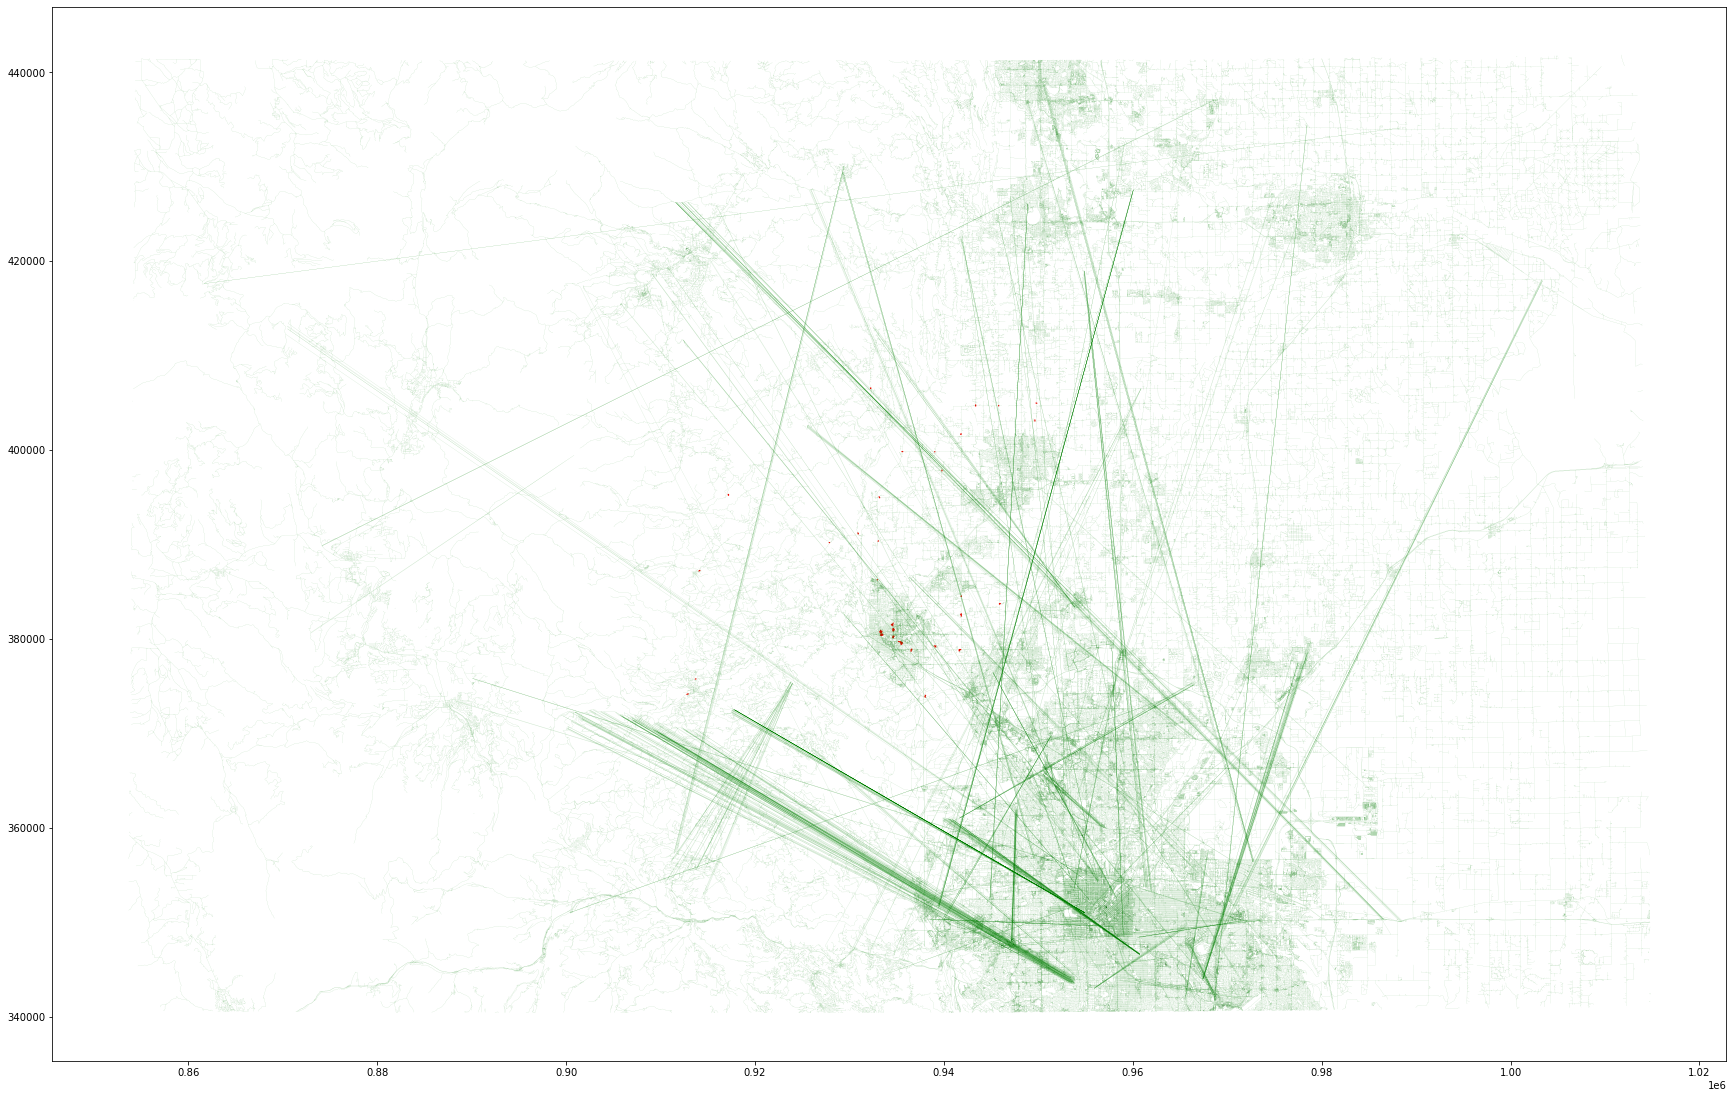

In [1118]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
road_proj.plot(color="green",edgecolor='k',linewidth = 0.05,ax=ax) #Use your second dataframe

#Clip road file with buffer file

In [1119]:
# Clip the data using GeoPandas clip
buffer_clip_road = gpd.clip(road_proj, gdf1)
buffer_clip_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name   ref          type  oneway  bridge  maxspeed  \
6      4360212  Colorado Avenue  None     secondary       1       0      35.0   
8      4922658     Utica Street  None      tertiary       0       0      15.0   
1183   6161081             None  None   residential       0       0       NaN   
1311   6162835             None  None  unclassified       0       0       NaN   
12981  8021402      33rd Street  None   residential       0       0       NaN   

                                                geometry  
6      LINESTRING (935386.797 379669.964, 935413.476 ...  
8      LINESTRING (914043.093 387162.591, 914046.650 ...  
1183   LINESTRING (932945.812 386196.146, 932888.418 ...  
1311   MULTILINESTRING ((934526.626 380935.547, 93466...  
12981  LINESTRING (935611.417 379665.717, 935611.367 ...

In [1120]:
#ax = buffer_clip_road.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Intersect

In [1121]:
 inter_road=gpd.overlay(gdf1, buffer_clip_road, how='intersection', make_valid=True, keep_geom_type=False)
 inter_road.head(5)

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  buff_dist  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        0.1   
1             3.0  206.745402  102.547945  14.027397    218.0  ...        0.1   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        0.1   
3             3.0  206.745402  102.547945  14.027397    218.0  ...        0.1   
4             3.0  206.745402  102.547945  14.027397    218.0  ...        0.1   

   buffer_area    osm_id                     name         ref         type  \
0     0.005766   6161081                     None        None  residential   
1     0.005766  17017728                 Broadway        None  residential   
2     0.005766  17023987     Terrace Circle North        None  residential   
3     0.005766  17024098  North Foothills Highway  US 36;CO 7      primary   
4     0.005766  17024862     Terrace Circle South        None  residential   

   oneway bridge maxspeed                                           geometry  
0       0      0      NaN  LINESTRING (932945.812 386196.146, 932888.418 ...  
1       0      0      NaN  LINESTRING (932947.544 386284.181, 932971.298 ...  
2       0      0     20.0  LINESTRING (932887.688 386281.246, 932893.289 ...  
3       1      0     55.0  LINESTRING (932985.955 386202.959, 932978.307 ...  
4       0      0     20.0  LINESTRING (932907.157 386221.024, 932909.671 ...  

[5 rows x 24 columns]

# Calculate the length of the road segments

In [1122]:
inter_road["Length"]=inter_road["geometry"].length*3.28084 # in ft
inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             3.0  206.745402  102.547945  14.027397    218.0  ...   
2             3.0  206.745402  102.547945  14.027397    218.0  ...   
3             3.0  206.745402  102.547945  14.027397    218.0  ...   
4             3.0  206.745402  102.547945  14.027397    218.0  ...   

   buffer_area    osm_id                     name         ref         type  \
0     0.005766   6161081                     None        None  residential   
1     0.005766  17017728                 Broadway        None  residential   
2     0.005766  17023987     Terrace Circle North        None  residential   
3     0.005766  17024098  North Foothills Highway  US 36;CO 7      primary   
4     0.005766  17024862     Terrace Circle South        None  residential   

   oneway  bridge maxspeed                                           geometry  \
0       0       0      NaN  LINESTRING (932945.812 386196.146, 932888.418 ...   
1       0       0      NaN  LINESTRING (932947.544 386284.181, 932971.298 ...   
2       0       0     20.0  LINESTRING (932887.688 386281.246, 932893.289 ...   
3       1       0     55.0  LINESTRING (932985.955 386202.959, 932978.307 ...   
4       0       0     20.0  LINESTRING (932907.157 386221.024, 932909.671 ...   

       Length  
0  318.337786  
1  217.411242  
2  198.385217  
3  197.402887  
4   21.391986  

[5 rows x 25 columns]

# Aggregrate the road functional class

In [1123]:
output_roadfc=inter_road.groupby(by=['osm_id_sensor','type'])['Length'].sum()
output_roadfc

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  type         
17013477.0     residential       581.734594
               secondary         754.823375
               service           727.643064
               tertiary           73.656070
17018830.0     path              810.099630
                                   ...     
439968204.0    residential      2141.902304
               secondary        1513.925443
               service          1805.589555
               tertiary          716.182141
               tertiary_link      98.812078
Name: Length, Length: 133, dtype: float64

# Calculate the primary road

In [1124]:
primary= inter_road[inter_road['type'].str.contains('primary')]
output_primary=primary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_primary.columns=["osm_id","Primary"]
output_primary.head()

osm_id      Primary
0  17022948.0   211.272621
1  33869417.0   794.333304
2  43313642.0   575.758352
3  46148772.0  1510.158500
4  89383623.0  1360.726978

In [1125]:
# Calculate secondary
secondary= inter_road[inter_road['type'].str.contains('secondary')]
output_secondary=secondary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_secondary.columns=["osm_id","Secondary"]
output_secondary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Secondary
0  17013477.0   754.823375
1  17025704.0   393.528901
2  17027097.0   416.403858
3  33869417.0   988.967424
4  37998424.0  2580.097508

In [1126]:
# Calculate tertiary
tertiary= inter_road[inter_road['type'].str.contains('tertiary')]
output_tertiary=tertiary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_tertiary.columns=["osm_id","Tertiary"]
output_tertiary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Tertiary
0  17013477.0    73.656070
1  17022894.0   758.057426
2  17022948.0   569.932004
3  17024738.0   501.681396
4  17025168.0  1034.450003

In [1127]:
# Calculate residential
residential= inter_road[inter_road['type'].str.contains('residential')]
output_residential= residential.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_residential.columns=["osm_id","Residential_Road"]
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Road
0  17013477.0        581.734594
1  17018830.0        196.860194
2  17025704.0        594.540611
3  17026172.0       1124.947695
4  17027097.0        627.608355

In [1128]:
# Calculate path
path= inter_road[inter_road['type'].str.contains('path')]
output_path= path.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_path.columns=["osm_id","Path"]
output_path.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         Path
0  17018830.0   810.099630
1  17024738.0   536.748344
2  17026172.0   375.019391
3  17027290.0  1388.336837
4  33869417.0  2941.417551

In [1129]:
# calculate cycleway
# Calculate path
cycleway = inter_road[inter_road['type'].str.contains('cycleway')]
output_cycleway = cycleway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_cycleway.columns=["osm_id","Cycleway"] 
output_cycleway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Cycleway
0  33869417.0  1549.897725
1  43176757.0   645.190047
2  46148772.0  1075.439200
3  92826267.0   821.603612

In [1130]:
# Calculate footway
footway = inter_road[inter_road['type'].str.contains('footway')]
output_footway = footway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_footway.columns=["osm_id","Footway"] 
output_footway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Footway
0  33869417.0  1405.912640
1  37998424.0   836.997002
2  43176757.0  3842.087737
3  43313642.0  1750.897760
4  46148772.0  1031.308754

# Calculcate the mean Speed

In [1131]:
# Exclude NAN and zero value first then take the mean
inter_road.maxspeed.describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    199.000000
mean      30.075377
std        9.217865
min       15.000000
25%       20.000000
50%       30.000000
75%       35.000000
max       60.000000
Name: maxspeed, dtype: float64

In [1132]:
# Consider rows without NAN
inter_road1 = inter_road[inter_road['maxspeed'].notna()]
inter_road1.head(5) 

site_id                      site_name sensor_type  year   region  \
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
5  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
6  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
2             3.0  206.745402  102.547945  14.027397    218.0  ...   
3             3.0  206.745402  102.547945  14.027397    218.0  ...   
4             3.0  206.745402  102.547945  14.027397    218.0  ...   
5             3.0  206.745402  102.547945  14.027397    218.0  ...   
6             3.0  206.745402  102.547945  14.027397    218.0  ...   

   buffer_area     osm_id                     name         ref         type  \
2     0.005766   17023987     Terrace Circle North        None  residential   
3     0.005766   17024098  North Foothills Highway  US 36;CO 7      primary   
4     0.005766   17024862     Terrace Circle South        None  residential   
5     0.005766  118356969  North Foothills Highway  US 36;CO 7      primary   
6     0.005766  385509341  North Foothills Highway  US 36;CO 7      primary   

   oneway  bridge maxspeed                                           geometry  \
2       0       0     20.0  LINESTRING (932887.688 386281.246, 932893.289 ...   
3       1       0     55.0  LINESTRING (932985.955 386202.959, 932978.307 ...   
4       0       0     20.0  LINESTRING (932907.157 386221.024, 932909.671 ...   
5       1       0     55.0  LINESTRING (932966.846 386198.433, 932967.794 ...   
6       0       0     55.0  LINESTRING (932956.462 386255.156, 932947.544 ...   

       Length  
2  198.385217  
3  197.402887  
4   21.391986  
5    7.770451  
6  296.233180  

[5 rows x 25 columns]

In [1133]:
road_proj_type11=inter_road1 [inter_road1 ['type']=='primary']                          
road_proj_type22=inter_road1 [inter_road1 ['type']=='secondary']
road_proj_type33=inter_road1[inter_road1 ['type']=='tertiary']
road_proj_type44=inter_road1 [inter_road1 ['type']=='residential']
road_proj_type55=inter_road1 [inter_road1 ['type']=='path']
road_proj_type66=inter_road1 [inter_road1 ['type']=='cycleway']
road_proj_type77=inter_road1 [inter_road1 ['type']=='footway']
road_proj_types=pd.concat([road_proj_type11,road_proj_type22,road_proj_type33,road_proj_type44,road_proj_type55,road_proj_type66,road_proj_type77],axis=0).reset_index()
road_proj_types.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                      site_name sensor_type  year   region  \
0      3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1      5  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2      6  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3      7  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4    131  P004BOU            Folsom at South St.   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  ...  buffer_area  \
0             3.0  206.745402  102.547945  14.027397  ...     0.005766   
1             3.0  206.745402  102.547945  14.027397  ...     0.005766   
2             3.0  206.745402  102.547945  14.027397  ...     0.005766   
3             3.0  206.745402  102.547945  14.027397  ...     0.005766   
4             2.0  502.851786   29.904110   9.972603  ...     0.031218   

      osm_id                     name          ref     type oneway  bridge  \
0   17024098  North Foothills Highway   US 36;CO 7  primary      1       0   
1  118356969  North Foothills Highway   US 36;CO 7  primary      1       0   
2  385509341  North Foothills Highway   US 36;CO 7  primary      0       0   
3  399347293  North Foothills Highway   US 36;CO 7  primary      1       0   
4  111476644         Canyon Boulevard  CO 119;CO 7  primary      1       0   

   maxspeed                                           geometry      Length  
0      55.0  LINESTRING (932985.955 386202.959, 932978.307 ...  197.402887  
1      55.0  LINESTRING (932966.846 386198.433, 932967.794 ...    7.770451  
2      55.0  LINESTRING (932956.462 386255.156, 932947.544 ...  296.233180  
3      55.0  LINESTRING (932956.462 386255.156, 932961.313 ...  190.110160  
4      35.0  LINESTRING (934624.316 380783.333, 934612.769 ...  149.310641  

[5 rows x 26 columns]

In [1134]:
# Then remove the rows with zero speed
inter_road2 = road_proj_types[road_proj_types.maxspeed != 0]
inter_road2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                      site_name sensor_type  year   region  \
0      3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1      5  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2      6  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3      7  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4    131  P004BOU            Folsom at South St.   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  ...  buffer_area  \
0             3.0  206.745402  102.547945  14.027397  ...     0.005766   
1             3.0  206.745402  102.547945  14.027397  ...     0.005766   
2             3.0  206.745402  102.547945  14.027397  ...     0.005766   
3             3.0  206.745402  102.547945  14.027397  ...     0.005766   
4             2.0  502.851786   29.904110   9.972603  ...     0.031218   

      osm_id                     name          ref     type oneway  bridge  \
0   17024098  North Foothills Highway   US 36;CO 7  primary      1       0   
1  118356969  North Foothills Highway   US 36;CO 7  primary      1       0   
2  385509341  North Foothills Highway   US 36;CO 7  primary      0       0   
3  399347293  North Foothills Highway   US 36;CO 7  primary      1       0   
4  111476644         Canyon Boulevard  CO 119;CO 7  primary      1       0   

   maxspeed                                           geometry      Length  
0      55.0  LINESTRING (932985.955 386202.959, 932978.307 ...  197.402887  
1      55.0  LINESTRING (932966.846 386198.433, 932967.794 ...    7.770451  
2      55.0  LINESTRING (932956.462 386255.156, 932947.544 ...  296.233180  
3      55.0  LINESTRING (932956.462 386255.156, 932961.313 ...  190.110160  
4      35.0  LINESTRING (934624.316 380783.333, 934612.769 ...  149.310641  

[5 rows x 26 columns]

In [1135]:
# Now calculate the mean speed for each count location
output_meanspeed=inter_road2.groupby(by=['osm_id_sensor'])['maxspeed'].agg(lambda x: pd.Series.mode(x).iat[0]).reset_index() # revised
output_meanspeed.columns=['osm_id','maxspeed']
output_meanspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  maxspeed
0  17013477.0      15.0
1  17018830.0      15.0
2  17022948.0      35.0
3  17024738.0      25.0
4  17025704.0      45.0

# Calculate the point speed of the link over which count location exist, 
# Intersect or within or overlap function does not work for sjoin unless the count location exactly over the link, in that case zero results willl be produced. To avoid zero output, nearest link from count station has been claculated like ARcGIS spatial GISJOIN.

In [1136]:
def min_distance_pline(point, line):
    return line.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1137]:
ecoshort.head()

site_id                      site_name sensor_type  year   region  \
0   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
7   P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
14  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
21  P004BOU            Folsom at South St.   permanent  2019  Boulder   
28  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw   latitude  \
0              3.0  206.745402  102.547945  14.027397    218.0  40.068772   
7              2.0  479.543452   29.739726  10.452055   5359.0  40.012846   
14             1.0  607.273809   52.397260  16.424658   4518.0  40.024197   
21             2.0  502.851786   29.904110   9.972603   3750.0  40.019358   
28             2.0  601.530238   20.808219   9.095890   2382.0  40.017376   

     longitude                                            comment  \
0  -105.283132                                                NaN   
7  -105.263103                                                NaN   
14 -105.263773  obsolete OSM link parallel to street link (Id=...   
21 -105.263097                                                NaN   
28 -105.278436                                                NaN   

    osm_id_sensor buff_dist                       geometry  \
0     385509341.0       2.0  POINT (932901.665 386478.901)   
7      43176757.0       2.0  POINT (934626.854 380273.771)   
14    439968204.0       2.0  POINT (934566.338 381533.917)   
21     43313642.0       2.0  POINT (934625.443 380996.780)   
28     46148772.0       2.0  POINT (933316.523 380773.375)   

    min_dist_to_school  min_dist_to_college  min_dist_to_university lanes  
0          5155.748831         22889.223647            14959.494580     2  
7          2995.203388          3427.045328             1166.086558     3  
14         1809.498034          6857.187175             3806.818604     1  
21         1954.097262          5322.953049             2219.966504     4  
28         1671.759654          4333.880131             3434.960037     1

In [1138]:
road_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                     name    ref          type  oneway  bridge  \
0  4271726              30th Street   None      tertiary       1       0   
1  4279016         Table Mesa Court   None   residential       0       0   
2  4280551            Stephens Road   None   residential       0       0   
3  4322008  Denver-Boulder Turnpike  US 36      motorway       1       0   
4  4325613         Innovation Drive   None  unclassified       0       0   

   maxspeed                                           geometry  
0      20.0  LINESTRING (935485.516 378614.897, 935486.285 ...  
1      20.0  LINESTRING (934890.955 376659.816, 934891.229 ...  
2      20.0  LINESTRING (934669.155 376762.300, 934722.873 ...  
3      65.0  LINESTRING (952312.641 363801.740, 952349.731 ...  
4      20.0  LINESTRING (935885.443 379827.373, 935885.592 ...

In [1139]:
print(road_proj.crs)
print(ecoshort.crs)

epsg:2772
epsg:2772


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1140]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id                       name     ref     type  oneway  bridge  \
0     21  6142916     North Cleveland Avenue  US 287  primary       1       0   
1    301  6147016            Fall River Road   US 34  primary       1       0   
2   1797  6164772  East Eisenhower Boulevard   US 34  primary       1       0   
3   2009  6165156         Park Entrance Road   US 36  primary       0       0   
4   2010  6165157         Park Entrance Road   US 36  primary       1       0   

   maxspeed                                           geometry  
0      35.0  LINESTRING (950527.849 424121.552, 950527.784 ...  
1       NaN  LINESTRING (906387.099 423817.717, 906405.377 ...  
2       NaN  LINESTRING (950344.601 424120.808, 950380.401 ...  
3      25.0  LINESTRING (907176.009 419448.843, 907204.569 ...  
4      35.0  LINESTRING (910287.637 419175.925, 910269.121 ...

# In the below pline distance, you can see counter is located little far away from the link

In [1141]:
#ecoshort['min_distance_pline'] = ecoshort.geometry.apply(min_distance_pline, args=(road_proj,))*3.28084
#ecoshort

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1142]:
#ecoshort.min_distance_pline.plot(xlabel="Index of Count ID",ylabel="Distance from count station to nearest link in ft")

# we need consider nearest distance link

# Remove the NAN and Zero speed link first from road shape file

In [1143]:
road_proj1=road_proj_type[road_proj_type['maxspeed'].notna()]
road_proj2=road_proj1[road_proj1.maxspeed != 0]

In [1144]:
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'maxspeed']

ecoshort['maxspeed'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj2)
ecoshort
ecoshort_speed=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1145]:
# Now merged with road shape file
#pt_speed=pd.merge(ecoshort_speed, road_proj2, right_on='osm_id', left_on='osm_id',how='inner')
pt_speed=ecoshort_speed
pt_speed.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
7   P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
14  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
21  P004BOU            Folsom at South St.   permanent  2019  Boulder   
28  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0              3.0  206.745402  102.547945  14.027397    218.0  ...   
7              2.0  479.543452   29.739726  10.452055   5359.0  ...   
14             1.0  607.273809   52.397260  16.424658   4518.0  ...   
21             2.0  502.851786   29.904110   9.972603   3750.0  ...   
28             2.0  601.530238   20.808219   9.095890   2382.0  ...   

     longitude                                            comment  \
0  -105.283132                                                NaN   
7  -105.263103                                                NaN   
14 -105.263773  obsolete OSM link parallel to street link (Id=...   
21 -105.263097                                                NaN   
28 -105.278436                                                NaN   

   osm_id_sensor  buff_dist                       geometry min_dist_to_school  \
0    385509341.0        2.0  POINT (932901.665 386478.901)        5155.748831   
7     43176757.0        2.0  POINT (934626.854 380273.771)        2995.203388   
14   439968204.0        2.0  POINT (934566.338 381533.917)        1809.498034   
21    43313642.0        2.0  POINT (934625.443 380996.780)        1954.097262   
28    46148772.0        2.0  POINT (933316.523 380773.375)        1671.759654   

    min_dist_to_college  min_dist_to_university  lanes maxspeed  
0          22889.223647            14959.494580      2     55.0  
7           3427.045328             1166.086558      3     30.0  
14          6857.187175             3806.818604      1     20.0  
21          5322.953049             2219.966504      4     30.0  
28          4333.880131             3434.960037      1     20.0  

[5 rows x 21 columns]

In [1146]:
# Now merged with road shape file based on OSM ID
pt_speed_v1=pd.merge(ecoshort, road_proj2, right_on='osm_id', left_on='osm_id_sensor',how='inner')
pt_speed_v1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1   P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2   P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3   P004BOU            Folsom at South St.   permanent  2019  Boulder   
4   P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   
5   P007BOU               Baseline at Inca   permanent  2019  Boulder   
6   P009BOU     Colorado Just West of 30th   permanent  2019  Boulder   
7   S003BOU                      N 75TH ST  short-term  2019  Boulder   
8   S013BOU                      N 95TH ST  short-term  2019  Boulder   
9   S014BOU                    BASELINE RD  short-term  2019  Boulder   
10  S016BOU                  CHERRYVALE RD  short-term  2019  Boulder   
11  S017BOU                     VALMONT RD  short-term  2019  Boulder   
12  S027BOU               BLUE MOUNTAIN RD  short-term  2019  Boulder   
13  S028BOU                      NELSON RD  short-term  2019  Boulder   
14  S030BOU                     KENOSHA RD  short-term  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0              3.0  206.745402  102.547945  14.027397    218.0  ...   
1              2.0  479.543452   29.739726  10.452055   5359.0  ...   
2              1.0  607.273809   52.397260  16.424658   4518.0  ...   
3              2.0  502.851786   29.904110   9.972603   3750.0  ...   
4              2.0  601.530238   20.808219   9.095890   2382.0  ...   
5              2.0  180.242262   31.575342   7.068493   2448.0  ...   
6              2.0  282.520833    5.082192   2.671233   4787.0  ...   
7              NaN   76.506781   16.890411   2.917808    149.0  ...   
8              NaN   12.753571   10.780822   1.246575     83.0  ...   
9              NaN  277.371802   62.534247  20.726027    427.0  ...   
10             NaN  170.810884   41.424658   4.630137    263.0  ...   
11             NaN   60.123481   23.630137   4.917808    174.0  ...   
12             NaN    4.260537    0.972603   0.054795      3.0  ...   
13             NaN  104.993846   26.219178   3.246575     74.0  ...   
14             NaN   10.969506    4.013699   0.493151     69.0  ...   

    maxspeed_x   index     osm_id                     name         ref  \
0         55.0  143392  385509341  North Foothills Highway  US 36;CO 7   
1         30.0   51860   43176757            Folsom Street        None   
2         20.0  158849  439968204            Folsom Street        None   
3         30.0   52021   43313642            Folsom Street        None   
4         20.0   55390   46148772              13th Street        None   
5         40.0  147031  397727284            Baseline Road        None   
6         35.0   48922   37998424          Colorado Avenue        None   
7         50.0   67590   97343136        North 75th Street        None   
8         45.0   55765   46331123        North 95th Street        None   
9         45.0   74110  132769465            Baseline Road        None   
10        40.0   65871   89383623    South Cherryvale Road        None   
11        45.0   51889   43181540             Valmont Road        None   
12        25.0   34010   17024738          County Road 71N      CR 71N   
13        50.0   35770   17027097              Nelson Road        None   
14        40.0   55401   46168750             Kenosha Road        None   

           type  oneway  bridge  maxspeed_y  \
0       primary       0       0        55.0   
1      tertiary       0       0        30.0   
2     secondary       0       0        30.0   
3     secondary       0       0        30.0   
4   residential       1       0        20.0   
5     secondary       1       0        40.0   
6     secondary       0       0        35.0   
7     secondary       0       0        45.0   
8     secondary       0       0        45.0   
9      tertiary       0       0        45.0

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

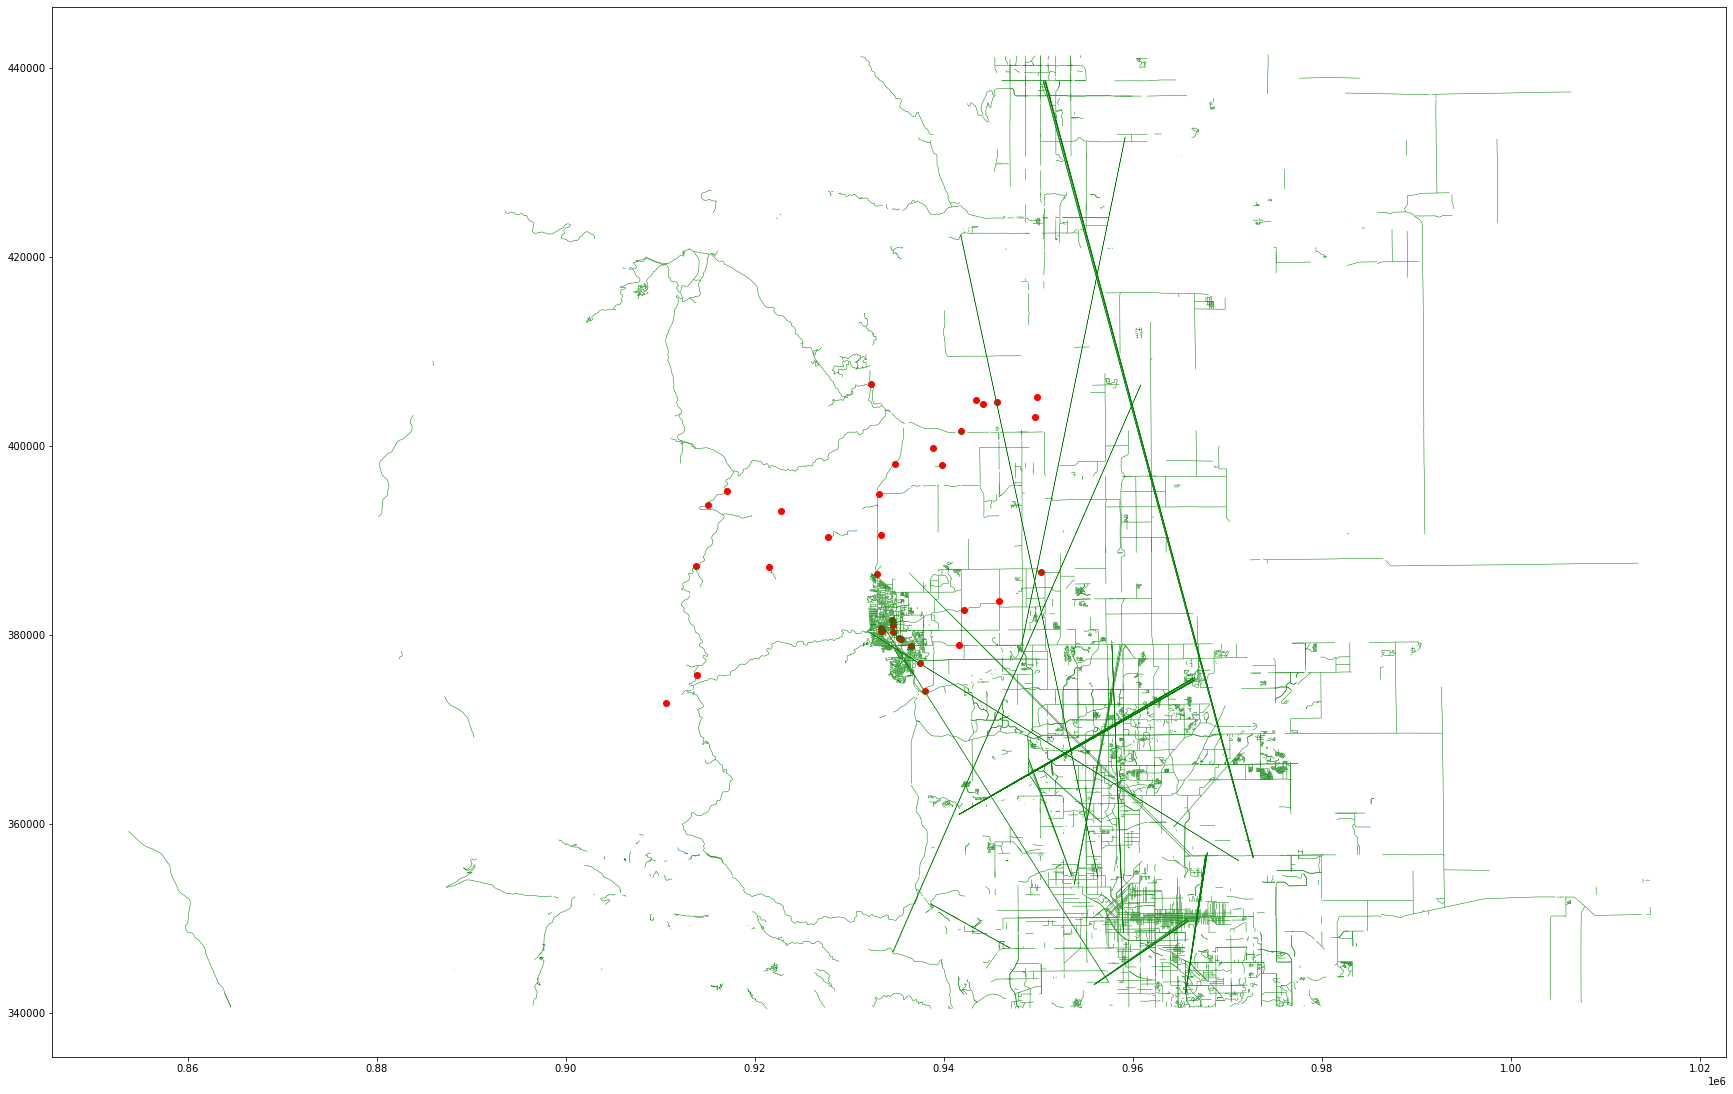

In [1147]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="red")
road_proj2.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

In [1148]:
# Now calculate the mean speed for each count location
output_pointspeed=pt_speed.groupby(by=['osm_id_sensor'])['maxspeed'].mean().reset_index()
output_pointspeed

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  maxspeed
0      17013477.0      40.0
1      17016731.0      50.0
2      17018038.0      20.0
3      17018364.0      35.0
4      17018830.0      15.0
5      17021754.0      60.0
6      17022894.0      35.0
7      17022948.0      35.0
8      17024738.0      25.0
9      17025168.0      35.0
10     17025704.0      45.0
11     17026172.0      30.0
12     17027097.0      50.0
13     17027290.0      20.0
14     33869417.0      30.0
15     37998424.0      35.0
16     43176757.0      30.0
17     43181540.0      45.0
18     43313642.0      30.0
19     43751772.0      35.0
20     46148772.0      20.0
21     46168750.0      40.0
22     46331123.0      45.0
23     48487064.0      40.0
24     48488846.0      60.0
25     89383623.0      40.0
26     90285789.0      60.0
27     92826267.0      30.0
28     97343136.0      50.0
29    132769465.0      45.0
30    212055825.0      35.0
31    327522296.0      35.0
32    385509341.0      55.0
33    397727284.0      40.0
34    439968204.0      20.0
35    445086793.0      20.0

In [1149]:
output_pointspeed.columns=["osm_id","Point Speed"]
output_pointspeed

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Speed
0    17013477.0         40.0
1    17016731.0         50.0
2    17018038.0         20.0
3    17018364.0         35.0
4    17018830.0         15.0
5    17021754.0         60.0
6    17022894.0         35.0
7    17022948.0         35.0
8    17024738.0         25.0
9    17025168.0         35.0
10   17025704.0         45.0
11   17026172.0         30.0
12   17027097.0         50.0
13   17027290.0         20.0
14   33869417.0         30.0
15   37998424.0         35.0
16   43176757.0         30.0
17   43181540.0         45.0
18   43313642.0         30.0
19   43751772.0         35.0
20   46148772.0         20.0
21   46168750.0         40.0
22   46331123.0         45.0
23   48487064.0         40.0
24   48488846.0         60.0
25   89383623.0         40.0
26   90285789.0         60.0
27   92826267.0         30.0
28   97343136.0         50.0
29  132769465.0         45.0
30  212055825.0         35.0
31  327522296.0         35.0
32  385509341.0         55.0
33  397727284.0         40.0
34  439968204.0         20.0
35  445086793.0         20.0

In [1150]:
pt_speed_v1.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'buff_dist',
       'geometry_x', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_x', 'index', 'osm_id',
       'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed_y', 'geometry_y'],
      dtype='object')

In [1151]:
# Now calculate the mean speed for each count location
output_pointspeed_v2=pt_speed_v1.groupby(by=['osm_id_sensor'])['maxspeed_x'].mean().reset_index()
output_pointspeed_v2.columns=['osm_id','maxspeed']
output_pointspeed_v2

osm_id  maxspeed
0    17024738.0      25.0
1    17027097.0      50.0
2    37998424.0      35.0
3    43176757.0      30.0
4    43181540.0      45.0
5    43313642.0      30.0
6    46148772.0      20.0
7    46168750.0      40.0
8    46331123.0      45.0
9    89383623.0      40.0
10   97343136.0      50.0
11  132769465.0      45.0
12  385509341.0      55.0
13  397727284.0      40.0
14  439968204.0      20.0

# Calculate the road type of the closest link of count station

In [1152]:
# Keep only functional class of road that we considered in our study to create catagorical varaibale

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1153]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id                       name     ref     type  oneway  bridge  \
0     21  6142916     North Cleveland Avenue  US 287  primary       1       0   
1    301  6147016            Fall River Road   US 34  primary       1       0   
2   1797  6164772  East Eisenhower Boulevard   US 34  primary       1       0   
3   2009  6165156         Park Entrance Road   US 36  primary       0       0   
4   2010  6165157         Park Entrance Road   US 36  primary       1       0   

   maxspeed                                           geometry  
0      35.0  LINESTRING (950527.849 424121.552, 950527.784 ...  
1       NaN  LINESTRING (906387.099 423817.717, 906405.377 ...  
2       NaN  LINESTRING (950344.601 424120.808, 950380.401 ...  
3      25.0  LINESTRING (907176.009 419448.843, 907204.569 ...  
4      35.0  LINESTRING (910287.637 419175.925, 910269.121 ...

In [1154]:
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'type']

#ecoshort['type'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort
#ecoshort_rt=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1155]:
# Now merged with road shape file
#road_merged_inner=pd.merge(ecoshort_speed, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#ecoshort_rt

In [1156]:
road_merged_inner = pd.merge(left=road_proj_type, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
road_merged_inner.head()

index     osm_id                     name         ref       type  oneway  \
0  143392  385509341  North Foothills Highway  US 36;CO 7    primary       0   
1   35770   17027097              Nelson Road        None  secondary       0   
2   48922   37998424          Colorado Avenue        None  secondary       0   
3   52021   43313642            Folsom Street        None  secondary       0   
4   55765   46331123        North 95th Street        None  secondary       0   

   bridge  maxspeed_x                                         geometry_x  \
0       0        55.0  LINESTRING (932956.462 386255.156, 932947.544 ...   
1       0        50.0  LINESTRING (933055.688 394950.605, 933099.393 ...   
2       0        35.0  LINESTRING (935338.535 379689.972, 935326.153 ...   
3       0        30.0  LINESTRING (934626.116 380946.521, 934626.297 ...   
4       0        45.0  LINESTRING (945892.751 382722.147, 945893.188 ...   

   site_id  ...   longitude comment  osm_id_sensor buff_dist  \
0  P001BOU  ... -105.283132     NaN    385509341.0       2.0   
1  S028BOU  ... -105.280535     NaN     17027097.0       2.0   
2  P009BOU  ... -105.255754     NaN     37998424.0       2.0   
3  P004BOU  ... -105.263097     NaN     43313642.0       2.0   
4  S013BOU  ... -105.131160     NaN     46331123.0       2.0   

                      geometry_y  min_dist_to_school  min_dist_to_college  \
0  POINT (932901.665 386478.901)         5155.748831         22889.223647   
1  POINT (933102.238 394949.960)        25802.753934         42578.242171   
2  POINT (935255.806 379706.294)         3396.601997          4612.212614   
3  POINT (934625.443 380996.780)         1954.097262          5322.953049   
4  POINT (945877.800 383581.734)         9590.604482         35146.860929   

   min_dist_to_university  lanes  maxspeed_y  
0            14959.494580      2        55.0  
1            41069.391945      2        50.0  
2             2730.245844      4        35.0  
3             2219.966504      4        30.0  
4            33698.009447      2        45.0  

[5 rows x 30 columns]

In [1157]:
# First identify the closest link from count station
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'osm_id']

#ecoshort['osm_id'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1158]:
# Now merge with road shape file with OSM ID
#closest_road_type=pd.merge(ecoshort, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#closest_road_type
road_merged_inner.columns


Index(['index', 'osm_id', 'name', 'ref', 'type', 'oneway', 'bridge',
       'maxspeed_x', 'geometry_x', 'site_id', 'site_name', 'sensor_type',
       'year', 'region', 'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb',
       'stl_raw', 'latitude', 'longitude', 'comment', 'osm_id_sensor',
       'buff_dist', 'geometry_y', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_y'],
      dtype='object')

In [1159]:
pt_road_type1=road_merged_inner.loc[:,['osm_id_sensor','type']]
pt_road_type1.columns=['osm_id','road_type']
pt_road_type1.head()

osm_id  road_type
0  385509341.0    primary
1   17027097.0  secondary
2   37998424.0  secondary
3   43313642.0  secondary
4   46331123.0  secondary

# Convert this road catagory to binary as follows- 0 and 1

In [1160]:
import numpy as np
pt_road_type1['primary_binary'] = np.where(pt_road_type1['road_type'] == 'primary', 1, 0)
pt_road_type1['secondary_binary'] = np.where(pt_road_type1['road_type'] == 'secondary', 1, 0)
pt_road_type1['tertiary_binary'] = np.where(pt_road_type1['road_type'] == 'tertiary', 1, 0)
pt_road_type1['residential_binary'] = np.where(pt_road_type1['road_type'] == 'residential', 1, 0)
pt_road_type1['path_binary'] = np.where(pt_road_type1['road_type'] == 'path', 1, 0)
pt_road_type1['cycleway_binary'] = np.where(pt_road_type1['road_type'] == 'cycleway', 1, 0)
pt_road_type1['footway_binary'] = np.where(pt_road_type1['road_type'] == 'footway', 1, 0)
pt_road_type1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  road_type  primary_binary  secondary_binary  tertiary_binary  \
0  385509341.0    primary               1                 0                0   
1   17027097.0  secondary               0                 1                0   
2   37998424.0  secondary               0                 1                0   
3   43313642.0  secondary               0                 1                0   
4   46331123.0  secondary               0                 1                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

In [1161]:
pt_road_type2=pt_road_type1.drop(['road_type'],axis=1)
pt_road_type2=pt_road_type2.drop_duplicates(subset=['osm_id'],keep='first')
pt_road_type2.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  primary_binary  secondary_binary  tertiary_binary  \
0  385509341.0               1                 0                0   
1   17027097.0               0                 1                0   
2   37998424.0               0                 1                0   
3   43313642.0               0                 1                0   
4   46331123.0               0                 1                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

# Calculate the Bridges

In [1162]:
bridge=inter_road.copy()
output_bridge=bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
# Convert binary, presence of bridge=1, absence of bridge=0
output_bridge.loc[output_bridge['bridge'] > 0, 'bridge'] = 1
output_bridge.loc[output_bridge['bridge'] ==0, 'bridge'] = 2
output_bridge.columns=['osm_id','bridge']
output_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  bridge
0  17013477.0       2
1  17018830.0       2
2  17022894.0       2
3  17022948.0       2
4  17024738.0       2

# Calculate the bridge from spatial join of count location and bridge line shape file

In [1163]:
bridge_only=road_proj
bridge_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                     name    ref          type  oneway  bridge  \
0  4271726              30th Street   None      tertiary       1       0   
1  4279016         Table Mesa Court   None   residential       0       0   
2  4280551            Stephens Road   None   residential       0       0   
3  4322008  Denver-Boulder Turnpike  US 36      motorway       1       0   
4  4325613         Innovation Drive   None  unclassified       0       0   

   maxspeed                                           geometry  
0      20.0  LINESTRING (935485.516 378614.897, 935486.285 ...  
1      20.0  LINESTRING (934890.955 376659.816, 934891.229 ...  
2      20.0  LINESTRING (934669.155 376762.300, 934722.873 ...  
3      65.0  LINESTRING (952312.641 363801.740, 952349.731 ...  
4      20.0  LINESTRING (935885.443 379827.373, 935885.592 ...

In [1164]:
#count_station
bridge_only.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['osm_id', 'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed',
       'geometry'],
      dtype='object')

In [1165]:
# Join count location file with road file
pointInline_bridge =pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
pointInline_bridge.head()

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
2  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
3  P004BOU            Folsom at South St.   permanent  2019  Boulder   
4  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  lanes  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...      2   
1             2.0  479.543452   29.739726  10.452055   5359.0  ...      3   
2             1.0  607.273809   52.397260  16.424658   4518.0  ...      1   
3             2.0  502.851786   29.904110   9.972603   3750.0  ...      4   
4             2.0  601.530238   20.808219   9.095890   2382.0  ...      1   

   maxspeed_x     osm_id                     name         ref         type  \
0        55.0  385509341  North Foothills Highway  US 36;CO 7      primary   
1        30.0   43176757            Folsom Street        None     tertiary   
2        20.0  439968204            Folsom Street        None    secondary   
3        30.0   43313642            Folsom Street        None    secondary   
4        20.0   46148772              13th Street        None  residential   

   oneway  bridge  maxspeed_y  \
0       0       0        55.0   
1       0       0        30.0   
2       0       0        30.0   
3       0       0        30.0   
4       1       0        20.0   

                                          geometry_y  
0  LINESTRING (932956.462 386255.156, 932947.544 ...  
1  LINESTRING (934628.677 380310.973, 934628.620 ...  
2  LINESTRING (934600.130 381368.993, 934594.427 ...  
3  LINESTRING (934626.116 380946.521, 934626.297 ...  
4  LINESTRING (933355.442 380641.017, 933352.474 ...  

[5 rows x 29 columns]

In [1166]:
# Join by OSM ID
#pointInline_bridge_v2 = pd.merge(left=bridge_only, right=count_station, left_on='osm_id', right_on='OSM_ID',how='inner')
#pointInline_bridge_v2


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1167]:
output_point_bridge=pointInline_bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
output_point_bridge.head()

osm_id_sensor  bridge
0     17013477.0       0
1     17016731.0       0
2     17018038.0       0
3     17018364.0       0
4     17018830.0       0

In [1168]:
output_point_bridge.loc[output_point_bridge['bridge'] > 0, 'bridge'] = 1
output_point_bridge.loc[output_point_bridge['bridge'] ==0, 'bridge'] = 2
output_point_bridge.columns=["osm_id","Point Bridge"]
output_point_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Bridge
0  17013477.0             2
1  17016731.0             2
2  17018038.0             2
3  17018364.0             2
4  17018830.0             2

# Calculate the Distance from count station to land use:Distance to water body, Distance to park,Distance to green space area,Distance to commercial,Distance to industrial area,Distance to residential area ,Distance to Retail area,Distance to Residential area



# Distance to park

In [1169]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1170]:
nature_proj1.head(5)

osm_id            name   type  \
0  12559765    Beattie Park   park   
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   

                                            geometry  
0  POLYGON ((949493.289 439485.899, 949493.890 43...  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...

In [1171]:
park_only=nature_proj1[nature_proj1['type'].str.contains('park')]
park_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                        name  type  \
0   12559765                Beattie Park  park   
45  25676795  LoDo Children's Playground  park   
46  25679669          Harvard Gulch Park  park   
49  26296652                   City Park  park   
50  26297169               Cheesman Park  park   

                                             geometry  
0   POLYGON ((949493.289 439485.899, 949493.890 43...  
45  POLYGON ((956881.018 351201.297, 956882.152 35...  
46  POLYGON ((958778.105 342849.188, 959272.748 34...  
49  POLYGON ((960827.305 350529.123, 960817.775 35...  
50  POLYGON ((959945.320 348883.379, 959934.114 34...

In [1172]:
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
7   P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
14  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
21  P004BOU            Folsom at South St.   permanent  2019  Boulder   
28  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0              3.0  206.745402  102.547945  14.027397    218.0  ...   
7              2.0  479.543452   29.739726  10.452055   5359.0  ...   
14             1.0  607.273809   52.397260  16.424658   4518.0  ...   
21             2.0  502.851786   29.904110   9.972603   3750.0  ...   
28             2.0  601.530238   20.808219   9.095890   2382.0  ...   

     longitude                                            comment  \
0  -105.283132                                                NaN   
7  -105.263103                                                NaN   
14 -105.263773  obsolete OSM link parallel to street link (Id=...   
21 -105.263097                                                NaN   
28 -105.278436                                                NaN   

   osm_id_sensor  buff_dist                       geometry min_dist_to_school  \
0    385509341.0        2.0  POINT (932901.665 386478.901)        5155.748831   
7     43176757.0        2.0  POINT (934626.854 380273.771)        2995.203388   
14   439968204.0        2.0  POINT (934566.338 381533.917)        1809.498034   
21    43313642.0        2.0  POINT (934625.443 380996.780)        1954.097262   
28    46148772.0        2.0  POINT (933316.523 380773.375)        1671.759654   

    min_dist_to_college  min_dist_to_university  lanes maxspeed  
0          22889.223647            14959.494580      2     55.0  
7           3427.045328             1166.086558      3     30.0  
14          6857.187175             3806.818604      1     20.0  
21          5322.953049             2219.966504      4     30.0  
28          4333.880131             3434.960037      1     20.0  

[5 rows x 21 columns]

In [1173]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(park_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
7   P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
14  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
21  P004BOU            Folsom at South St.   permanent  2019  Boulder   
28  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0              3.0  206.745402  102.547945  14.027397    218.0  ...   
7              2.0  479.543452   29.739726  10.452055   5359.0  ...   
14             1.0  607.273809   52.397260  16.424658   4518.0  ...   
21             2.0  502.851786   29.904110   9.972603   3750.0  ...   
28             2.0  601.530238   20.808219   9.095890   2382.0  ...   

                                              comment  osm_id_sensor  \
0                                                 NaN    385509341.0   
7                                                 NaN     43176757.0   
14  obsolete OSM link parallel to street link (Id=...    439968204.0   
21                                                NaN     43313642.0   
28                                                NaN     46148772.0   

   buff_dist                       geometry min_dist_to_school  \
0        2.0  POINT (932901.665 386478.901)        5155.748831   
7        2.0  POINT (934626.854 380273.771)        2995.203388   
14       2.0  POINT (934566.338 381533.917)        1809.498034   
21       2.0  POINT (934625.443 380996.780)        1954.097262   
28       2.0  POINT (933316.523 380773.375)        1671.759654   

   min_dist_to_college  min_dist_to_university  lanes  maxspeed  \
0         22889.223647            14959.494580      2      55.0   
7          3427.045328             1166.086558      3      30.0   
14         6857.187175             3806.818604      1      20.0   
21         5322.953049             2219.966504      4      30.0   
28         4333.880131             3434.960037      1      20.0   

   min_dist_to_polygon  
0          1374.653322  
7          1696.260696  
14          296.513715  
21          479.445101  
28          508.736224  

[5 rows x 22 columns]

In [1174]:
Park_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
Park_distance1.columns=["osm_id","Distance to Park"]
Park_distance1=Park_distance1.drop_duplicates(subset=['osm_id'],keep='first')
Park_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park
0   385509341.0       1374.653322
7    43176757.0       1696.260696
14  439968204.0        296.513715
21   43313642.0        479.445101
28   46148772.0        508.736224

# cc distance to park

In [1175]:
parkcc=park_only.copy()
parkcc['geometry']=parkcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(parkcc,))*3.28084
parkcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
parkcc_distance1.columns=["osm_id","Distance to Park Center"]
parkcc_distance1=parkcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
parkcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park Center
0   385509341.0              1620.398950
7    43176757.0              1830.469596
14  439968204.0               369.300396
21   43313642.0               594.495259
28   46148772.0               813.471499

# Distance to water body

In [1176]:
water_only=nature_proj1[nature_proj1['type'].str.contains('water')]
water_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id            name   type  \
1  23550227  Horseshoe Lake  water   
2  23550304       Boyd Lake  water   
3  23550316     Silver Lake  water   
4  23550325   Lake Loveland  water   
5  23598968            None  water   

                                            geometry  
1  POLYGON ((951244.135 428534.152, 951369.968 42...  
2  POLYGON ((953977.052 429201.052, 954080.914 42...  
3  POLYGON ((951092.866 424971.450, 951202.803 42...  
4  POLYGON ((949814.218 425574.299, 949819.443 42...  
5  POLYGON ((954738.009 440768.701, 954742.314 44...

In [1177]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(water_only,))*3.28084
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
7   P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
14  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
21  P004BOU            Folsom at South St.   permanent  2019  Boulder   
28  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0              3.0  206.745402  102.547945  14.027397    218.0  ...   
7              2.0  479.543452   29.739726  10.452055   5359.0  ...   
14             1.0  607.273809   52.397260  16.424658   4518.0  ...   
21             2.0  502.851786   29.904110   9.972603   3750.0  ...   
28             2.0  601.530238   20.808219   9.095890   2382.0  ...   

                                              comment  osm_id_sensor  \
0                                                 NaN    385509341.0   
7                                                 NaN     43176757.0   
14  obsolete OSM link parallel to street link (Id=...    439968204.0   
21                                                NaN     43313642.0   
28                                                NaN     46148772.0   

   buff_dist                       geometry min_dist_to_school  \
0        2.0  POINT (932901.665 386478.901)        5155.748831   
7        2.0  POINT (934626.854 380273.771)        2995.203388   
14       2.0  POINT (934566.338 381533.917)        1809.498034   
21       2.0  POINT (934625.443 380996.780)        1954.097262   
28       2.0  POINT (933316.523 380773.375)        1671.759654   

   min_dist_to_college  min_dist_to_university  lanes  maxspeed  \
0         22889.223647            14959.494580      2      55.0   
7          3427.045328             1166.086558      3      30.0   
14         6857.187175             3806.818604      1      20.0   
21         5322.953049             2219.966504      4      30.0   
28         4333.880131             3434.960037      1      20.0   

   min_dist_to_polygon  
0          4666.952544  
7          2071.785548  
14         1297.167240  
21         3023.108559  
28         2101.625691  

[5 rows x 22 columns]

In [1178]:
water_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
water_distance1.columns=["osm_id","Distance to Water Body"]
water_distance1=water_distance1.drop_duplicates(subset=['osm_id'],keep='first')
water_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Body
0   385509341.0             4666.952544
7    43176757.0             2071.785548
14  439968204.0             1297.167240
21   43313642.0             3023.108559
28   46148772.0             2101.625691

In [1179]:
watercc=water_only.copy()
watercc['geometry']=watercc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(watercc,))*3.28084
watercc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
watercc_distance1.columns=["osm_id","Distance to Water Center"]
watercc_distance1=watercc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
watercc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Center
0   385509341.0               5257.524772
7    43176757.0               2167.563630
14  439968204.0               1333.019459
21   43313642.0               3063.334585
28   46148772.0               2214.070258

# Distance To  Forest

In [1180]:
forest_only=nature_proj1[nature_proj1['type'].str.contains('forest')]
forest_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name    type  \
1447  41932584  None  forest   
1448  41932620  None  forest   
2587  62961278  None  forest   
2588  63415103  None  forest   
2589  63415288  None  forest   

                                               geometry  
1447  POLYGON ((939710.353 390625.315, 939703.760 39...  
1448  POLYGON ((939713.380 390594.702, 939719.223 39...  
2587  POLYGON ((933947.270 363575.838, 933920.439 36...  
2588  POLYGON ((935754.317 362512.643, 935780.392 36...  
2589  POLYGON ((934042.722 362816.850, 934094.066 36...

In [1181]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forest_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
7   P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
14  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
21  P004BOU            Folsom at South St.   permanent  2019  Boulder   
28  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0              3.0  206.745402  102.547945  14.027397    218.0  ...   
7              2.0  479.543452   29.739726  10.452055   5359.0  ...   
14             1.0  607.273809   52.397260  16.424658   4518.0  ...   
21             2.0  502.851786   29.904110   9.972603   3750.0  ...   
28             2.0  601.530238   20.808219   9.095890   2382.0  ...   

                                              comment  osm_id_sensor  \
0                                                 NaN    385509341.0   
7                                                 NaN     43176757.0   
14  obsolete OSM link parallel to street link (Id=...    439968204.0   
21                                                NaN     43313642.0   
28                                                NaN     46148772.0   

   buff_dist                       geometry min_dist_to_school  \
0        2.0  POINT (932901.665 386478.901)        5155.748831   
7        2.0  POINT (934626.854 380273.771)        2995.203388   
14       2.0  POINT (934566.338 381533.917)        1809.498034   
21       2.0  POINT (934625.443 380996.780)        1954.097262   
28       2.0  POINT (933316.523 380773.375)        1671.759654   

   min_dist_to_college  min_dist_to_university  lanes  maxspeed  \
0         22889.223647            14959.494580      2      55.0   
7          3427.045328             1166.086558      3      30.0   
14         6857.187175             3806.818604      1      20.0   
21         5322.953049             2219.966504      4      30.0   
28         4333.880131             3434.960037      1      20.0   

   min_dist_to_polygon  
0         10501.058727  
7           439.950039  
14         4049.744849  
21         2812.011482  
28          657.880401  

[5 rows x 22 columns]

In [1182]:
forest_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forest_distance1.columns=["osm_id","Distance to forest"]
forest_distance1=forest_distance1.drop_duplicates(subset=['osm_id'],keep='first')
forest_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to forest
0   385509341.0        10501.058727
7    43176757.0          439.950039
14  439968204.0         4049.744849
21   43313642.0         2812.011482
28   46148772.0          657.880401

In [1183]:
forestcc=forest_only.copy()
forestcc['geometry']=forestcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forestcc,))*3.28084
forestcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forestcc_distance1.columns=["osm_id","Distance to Forest Center"]
forestcc_distance1=forestcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
forestcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Forest Center
0   385509341.0               11026.872825
7    43176757.0                 737.662844
14  439968204.0                4225.818084
21   43313642.0                2946.748465
28   46148772.0                 724.760022

# Distance to green space area

In [1184]:
grass_only=luse_proj[luse_proj['type'].str.contains('grass')]
grass_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   type                                           geometry
1   27856736  None  grass  POLYGON ((956768.823 350793.686, 956775.894 35...
2   27856807  None  grass  POLYGON ((956897.910 350759.976, 956878.082 35...
3   33119314  None  grass  POLYGON ((957173.271 405544.031, 957071.255 40...
7   34267257  None  grass  POLYGON ((935448.855 377370.879, 935449.859 37...
11  34665831  None  grass  POLYGON ((958868.888 348681.680, 958794.842 34...

In [1185]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grass_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
7   P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
14  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
21  P004BOU            Folsom at South St.   permanent  2019  Boulder   
28  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0              3.0  206.745402  102.547945  14.027397    218.0  ...   
7              2.0  479.543452   29.739726  10.452055   5359.0  ...   
14             1.0  607.273809   52.397260  16.424658   4518.0  ...   
21             2.0  502.851786   29.904110   9.972603   3750.0  ...   
28             2.0  601.530238   20.808219   9.095890   2382.0  ...   

                                              comment  osm_id_sensor  \
0                                                 NaN    385509341.0   
7                                                 NaN     43176757.0   
14  obsolete OSM link parallel to street link (Id=...    439968204.0   
21                                                NaN     43313642.0   
28                                                NaN     46148772.0   

   buff_dist                       geometry min_dist_to_school  \
0        2.0  POINT (932901.665 386478.901)        5155.748831   
7        2.0  POINT (934626.854 380273.771)        2995.203388   
14       2.0  POINT (934566.338 381533.917)        1809.498034   
21       2.0  POINT (934625.443 380996.780)        1954.097262   
28       2.0  POINT (933316.523 380773.375)        1671.759654   

   min_dist_to_college  min_dist_to_university  lanes  maxspeed  \
0         22889.223647            14959.494580      2      55.0   
7          3427.045328             1166.086558      3      30.0   
14         6857.187175             3806.818604      1      20.0   
21         5322.953049             2219.966504      4      30.0   
28         4333.880131             3434.960037      1      20.0   

   min_dist_to_polygon  
0          2318.076913  
7          1282.583177  
14         4072.037198  
21         2567.203132  
28          337.107800  

[5 rows x 22 columns]

In [1186]:
grass_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grass_distance1.columns=["osm_id","Distance to Grass"]
grass_distance1=grass_distance1.drop_duplicates(subset=['osm_id'],keep='first')
grass_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass
0   385509341.0        2318.076913
7    43176757.0        1282.583177
14  439968204.0        4072.037198
21   43313642.0        2567.203132
28   46148772.0         337.107800

In [1187]:
grasscc=grass_only.copy()
grasscc['geometry']=grasscc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grasscc,))*3.28084
grasscc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grasscc_distance1.columns=["osm_id","Distance to Grass Center"]
grasscc_distance1=grasscc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
grasscc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass Center
0   385509341.0               2722.155135
7    43176757.0               1312.505978
14  439968204.0               4115.020022
21   43313642.0               2609.251468
28   46148772.0                376.337130

# Distance to commercial

In [1188]:
commercial_only=luse_proj[luse_proj['type'].str.contains('commercial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercial_only,))*3.28084
commercial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercial_distance1.columns=["osm_id","Distance to Commercial Area"]
commercial_distance1=commercial_distance1.drop_duplicates(subset=['osm_id'],keep='first')
commercial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area
0   385509341.0                  2307.541525
7    43176757.0                  3248.639375
14  439968204.0                  1356.771780
21   43313642.0                  3069.552248
28   46148772.0                  2685.318000

In [1189]:
commercialcc=commercial_only.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercialcc,))*3.28084
commercialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercialcc_distance1.columns=["osm_id","Distance to Commercial Area Center"]
commercialcc_distance1=commercialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
commercialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area Center
0   385509341.0                         2589.123703
7    43176757.0                         5009.789065
14  439968204.0                         1580.731775
21   43313642.0                         3311.858588
28   46148772.0                         2850.325098

# Distance to industrial area

In [1190]:
industrial_only=luse_proj[luse_proj['type'].str.contains('industrial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrial_only,))*3.28084
industrial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrial_distance1.columns=["osm_id","Distance to Industrial Area"]
industrial_distance1=industrial_distance1.drop_duplicates(subset=['osm_id'],keep='first')
industrial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Area
0   385509341.0                  1278.294408
7    43176757.0                  5913.557052
14  439968204.0                  5570.753256
21   43313642.0                  5707.993932
28   46148772.0                  8478.061292

In [1191]:
industrialcc=industrial_only.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrialcc,))*3.28084
industrialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrialcc_distance1.columns=["osm_id","Distance to Industrial Center"]
industrialcc_distance1=industrialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
industrialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Center
0   385509341.0                    1661.358724
7    43176757.0                    7356.246859
14  439968204.0                    6113.978896
21   43313642.0                    6246.500776
28   46148772.0                    9888.563692

# Distance to Retail area

In [1192]:
retail_only=luse_proj[luse_proj['type'].str.contains('retail')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retail_only,))*3.28084
retail_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retail_distance1.columns=["osm_id","Distance to Retail Area"]
retail_distance1=retail_distance1.drop_duplicates(subset=['osm_id'],keep='first')
retail_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Area
0   385509341.0              7612.708041
7    43176757.0                90.046819
14  439968204.0               898.209137
21   43313642.0               755.202693
28   46148772.0                98.811627

In [1193]:
retailcc=retail_only.copy()
retailcc['geometry']=retailcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retailcc,))*3.28084
retailcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retailcc_distance1.columns=["osm_id","Distance to Retail Center"]
retailcc_distance1=retailcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
retailcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Center
0   385509341.0                7747.950312
7    43176757.0                 699.267869
14  439968204.0                1249.193314
21   43313642.0                1011.628480
28   46148772.0                 274.877841

# Distance to Residential

In [1194]:
residential_only=luse_proj[luse_proj['type'].str.contains('residential')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residential_only,))*3.28084
residential_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residential_distance1.columns=["osm_id","Distance to Residential Area"]
residential_distance1=residential_distance1.drop_duplicates(subset=['osm_id'],keep='first')
residential_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Area
0   385509341.0                   1866.797183
7    43176757.0                     18.326769
14  439968204.0                    559.079630
21   43313642.0                   1787.004237
28   46148772.0                   2276.790952

In [1195]:
residentialcc=residential_only.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residentialcc,))*3.28084
residentialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residentialcc_distance1.columns=["osm_id","Distance to Residential Center"]
residentialcc_distance1=residentialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
residentialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Center
0   385509341.0                     1988.820553
7    43176757.0                      437.747658
14  439968204.0                     1193.369394
21   43313642.0                     2274.703848
28   46148772.0                     2400.267766

# Import the OSM Building file and use Portland City Hall as the CBD, then calculate the distance from CBD

In [1196]:
building1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name           type  \
0  25312645           Ball Arena     commercial   
1  25650822        Union Station  train_station   
2  25656689                 None         school   
3  25670806    One Union Station     commercial   
4  25670837  IMA Financial Plaza     commercial   

                                            geometry  
0  POLYGON ((-105.00817 39.74908, -105.00824 39.7...  
1  POLYGON ((-105.00082 39.75266, -105.00072 39.7...  
2  POLYGON ((-105.03333 39.75470, -105.03336 39.7...  
3  POLYGON ((-105.00151 39.75253, -105.00100 39.7...  
4  POLYGON ((-104.99925 39.75419, -104.99908 39.7...

In [1197]:
# Reproject the geometries by replacing the values with projected ones
bld_proj = building1.to_crs(epsg=2772)
bld_proj.head(10)
bld_proj1=bld_proj.loc[(bld_proj.name=='Municipal Building')]
bld_proj1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                name  type  \
10169  119530898  Municipal Building  None   

                                                geometry  
10169  POLYGON ((933208.093 380520.280, 933218.783 38...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

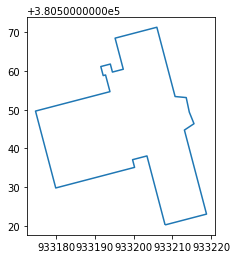

In [1198]:
bld_proj1.geometry.boundary.plot()

In [1199]:
# copy GeoDataFrame
bld_proj2 = bld_proj1.copy()
# change geometry 
bld_proj2['geometry'] = bld_proj2['geometry'].centroid
bld_proj2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                name  type                       geometry
10169  119530898  Municipal Building  None  POINT (933198.673 380544.899)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

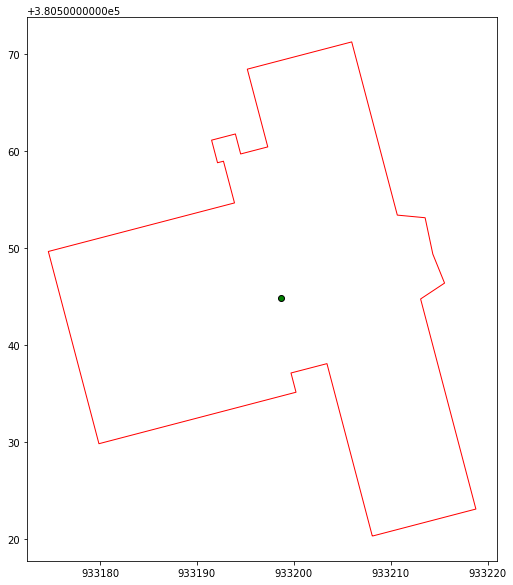

In [1200]:
fig, ax = plt.subplots(figsize = (15,10)) 
bld_proj2.plot(ax=ax,color="green",edgecolor='k')
bld_proj1.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [1201]:
# Calculate the distance from CBD to all count locations
ecoshort['min_dist_to_CBD'] = ecoshort.geometry.apply(min_distance_ppoly, args=(bld_proj2,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
7   P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
14  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
21  P004BOU            Folsom at South St.   permanent  2019  Boulder   
28  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0              3.0  206.745402  102.547945  14.027397    218.0  ...   
7              2.0  479.543452   29.739726  10.452055   5359.0  ...   
14             1.0  607.273809   52.397260  16.424658   4518.0  ...   
21             2.0  502.851786   29.904110   9.972603   3750.0  ...   
28             2.0  601.530238   20.808219   9.095890   2382.0  ...   

    osm_id_sensor  buff_dist                       geometry  \
0     385509341.0        2.0  POINT (932901.665 386478.901)   
7      43176757.0        2.0  POINT (934626.854 380273.771)   
14    439968204.0        2.0  POINT (934566.338 381533.917)   
21     43313642.0        2.0  POINT (934625.443 380996.780)   
28     46148772.0        2.0  POINT (933316.523 380773.375)   

    min_dist_to_school min_dist_to_college min_dist_to_university  lanes  \
0          5155.748831        22889.223647           14959.494580      2   
7          2995.203388         3427.045328            1166.086558      3   
14         1809.498034         6857.187175            3806.818604      1   
21         1954.097262         5322.953049            2219.966504      4   
28         1671.759654         4333.880131            3434.960037      1   

    maxspeed  min_dist_to_polygon min_dist_to_CBD  
0       55.0          1988.820553    19492.883148  
7       30.0           437.747658     4769.321567  
14      20.0          1193.369394     5537.399582  
21      30.0          2274.703848     4910.170002  
28      20.0          2400.267766      843.437835  

[5 rows x 23 columns]

In [1202]:
CBD_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_CBD']]
CBD_distance1.columns=["osm_id","Distance to CBD"]
CBD_distance1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to CBD
0   385509341.0     19492.883148
7    43176757.0      4769.321567
14  439968204.0      5537.399582
21   43313642.0      4910.170002
28   46148772.0       843.437835

# End of Distance calculation

# Now write coding for socio-demographic variable extraction

1. Population density
2. Employment density
3. Household Density
4. Number of students (student access)
5. Median age
6. Percentage of female
7. Percentage of male
8. Percentage of African American population
9. Percentage of white population
10. Median Household Income
11. Education (% of population having at least college education)

In [1203]:
# Read the Block group 
#bg=gpd.read_file("../input/oregon-sd-data/OR_blck_grp_2017.shp")
bg.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0  Block Group 1  G5030        S  320934.0     0.0  +39.7419971  -104.8705120   
1  Block Group 2  G5030        S  320612.0     0.0  +39.7419962  -104.8799406   
2  Block Group 1  G5030        S  319446.0     0.0  +39.7419965  -104.8611117   
3  Block Group 2  G5030        S  157958.0     0.0  +39.7419946  -104.8493928   
4  Block Group 3  G5030        S  159972.0     0.0  +39.7419960  -104.8540610   

    Shape_Leng     Shape_Area  \
0  2402.636915  320933.456042   
1  2410.808635  320611.108619   
2  2396.650273  319445.010765   
3  1589.417364  157956.656550   
4  1598.455905  159972.064086   

                                            geometry  
0  POLYGON ((-752529.847 286642.682, -752432.397 ...  
1  POLYGON ((-752630.773 286651.572, -752650.057 ...  
2  POLYGON ((-751337.647 286529.883, -751237.576 ...  
3  POLYGON ((-750249.110 286428.628, -750259.377 ...  
4  POLYGON ((-750841.071 286484.143, -750742.150 ...

In [1204]:
bg.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3532, 16)

In [1205]:
print(bg.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [1206]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg2.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0  Block Group 1  G5030        S  320934.0     0.0  +39.7419971  -104.8705120   
1  Block Group 2  G5030        S  320612.0     0.0  +39.7419962  -104.8799406   
2  Block Group 1  G5030        S  319446.0     0.0  +39.7419965  -104.8611117   
3  Block Group 2  G5030        S  157958.0     0.0  +39.7419946  -104.8493928   
4  Block Group 3  G5030        S  159972.0     0.0  +39.7419960  -104.8540610   

    Shape_Leng     Shape_Area  \
0  2402.636915  320933.456042   
1  2410.808635  320611.108619   
2  2396.650273  319445.010765   
3  1589.417364  157956.656550   
4  1598.455905  159972.064086   

                                            geometry  
0  POLYGON ((-752529.847 286642.682, -752432.397 ...  
1  POLYGON ((-752630.773 286651.572, -752650.057 ...  
2  POLYGON ((-751337.647 286529.883, -751237.576 ...  
3  POLYGON ((-750249.110 286428.628, -750259.377 ...  
4  POLYGON ((-750841.071 286484.143, -750742.150 ...

In [1207]:
# set the co-ordinate system first
#bg2 = bg.set_crs("EPSG:102003")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_proj = bg2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:2772')
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0  Block Group 1  G5030        S  320934.0     0.0  +39.7419971  -104.8705120   
1  Block Group 2  G5030        S  320612.0     0.0  +39.7419962  -104.8799406   
2  Block Group 1  G5030        S  319446.0     0.0  +39.7419965  -104.8611117   
3  Block Group 2  G5030        S  157958.0     0.0  +39.7419946  -104.8493928   
4  Block Group 3  G5030        S  159972.0     0.0  +39.7419960  -104.8540610   

    Shape_Leng     Shape_Area  \
0  2402.636915  320933.456042   
1  2410.808635  320611.108619   
2  2396.650273  319445.010765   
3  1589.417364  157956.656550   
4  1598.455905  159972.064086   

                                            geometry  
0  POLYGON ((968054.365 350563.034, 968153.191 35...  
1  POLYGON ((967952.117 350561.758, 967953.285 35...  
2  POLYGON ((969262.965 350570.444, 969364.357 35...  
3  POLYGON ((970366.301 350578.935, 970365.814 35...  
4  POLYGON ((969766.247 350574.761, 969866.528 35...

In [1208]:
bg_proj["Total block Area"]=bg_proj.area
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0  Block Group 1  G5030        S  320934.0     0.0  +39.7419971  -104.8705120   
1  Block Group 2  G5030        S  320612.0     0.0  +39.7419962  -104.8799406   
2  Block Group 1  G5030        S  319446.0     0.0  +39.7419965  -104.8611117   
3  Block Group 2  G5030        S  157958.0     0.0  +39.7419946  -104.8493928   
4  Block Group 3  G5030        S  159972.0     0.0  +39.7419960  -104.8540610   

    Shape_Leng     Shape_Area  \
0  2402.636915  320933.456042   
1  2410.808635  320611.108619   
2  2396.650273  319445.010765   
3  1589.417364  157956.656550   
4  1598.455905  159972.064086   

                                            geometry  Total block Area  
0  POLYGON ((968054.365 350563.034, 968153.191 35...     320931.270731  
1  POLYGON ((967952.117 350561.758, 967953.285 35...     320608.922118  
2  POLYGON ((969262.965 350570.444, 969364.357 35...     319442.839582  
3  POLYGON ((970366.301 350578.935, 970365.814 35...     157955.575554  
4  POLYGON ((969766.247 350574.761, 969866.528 35...     159970.975422

In [1209]:
#race=pd.read_csv("../input/oregon-sd-data/race.csv")
race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2013-2017      NaN        NaN  Colorado       8   
1  G08000100078012  2013-2017      NaN        NaN  Colorado       8   
2  G08000100078021  2013-2017      NaN        NaN  Colorado       8   
3  G08000100078022  2013-2017      NaN        NaN  Colorado       8   
4  G08000100078023  2013-2017      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AHY2M001  AHY2M002  AHY2M003  \
0  Adams County        1      NaN     NaN  ...       478       376       173   
1  Adams County        1      NaN     NaN  ...       467       252       174   
2  Adams County        1      NaN     NaN  ...       379       211       273   
3  Adams County        1      NaN     NaN  ...       301       229       119   
4  Adams County        1      NaN     NaN  ...       413       334       159   

   AHY2M004  AHY2M005  AHY2M006  AHY2M007  AHY2M008  AHY2M009  AHY2M010  
0        12       203        12       306        44        12        44  
1        20       387        12       300        86        61        72  
2        51        77        12       130       128       104        33  
3        20        79        12       247        24        12        24  
4        12       154        12       275       171       171        12  

[5 rows x 58 columns]

In [1210]:
race1=pd.merge(bg_proj, race, left_on='GISJOIN', right_on='GISJOIN', how='left')
race1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AHY2M001 AHY2M002 AHY2M003  \
0  Block Group 1  G5030        S  320934.0  ...       478      376      173   
1  Block Group 2  G5030        S  320612.0  ...       467      252      174   
2  Block Group 1  G5030        S  319446.0  ...       379      211      273   
3  Block Group 2  G5030        S  157958.0  ...       301      229      119   
4  Block Group 3  G5030        S  159972.0  ...       413      334      159   

   AHY2M004  AHY2M005 AHY2M006  AHY2M007 AHY2M008  AHY2M009  AHY2M010  
0        12       203       12       306       44        12        44  
1        20       387       12       300       86        61        72  
2        51        77       12       130      128       104        33  
3        20        79       12       247       24        12        24  
4        12       154       12       275      171       171        12  

[5 rows x 74 columns]

In [1211]:
race2=race1[['INTPTLAT','INTPTLON','GISJOIN','Shape_Leng','Shape_Area','geometry','AHY2E001','AHY2E002','AHY2E003','Total block Area']]
race2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INTPTLAT      INTPTLON          GISJOIN   Shape_Leng     Shape_Area  \
0  +39.7419971  -104.8705120  G08000100078011  2402.636915  320933.456042   
1  +39.7419962  -104.8799406  G08000100078012  2410.808635  320611.108619   
2  +39.7419965  -104.8611117  G08000100078021  2396.650273  319445.010765   
3  +39.7419946  -104.8493928  G08000100078022  1589.417364  157956.656550   
4  +39.7419960  -104.8540610  G08000100078023  1598.455905  159972.064086   

                                            geometry  AHY2E001  AHY2E002  \
0  POLYGON ((968054.365 350563.034, 968153.191 35...      1933       986   
1  POLYGON ((967952.117 350561.758, 967953.285 35...      2479       649   
2  POLYGON ((969262.965 350570.444, 969364.357 35...      1476       494   
3  POLYGON ((970366.301 350578.935, 970365.814 35...      1279       504   
4  POLYGON ((969766.247 350574.761, 969866.528 35...      1839       711   

   AHY2E003  Total block Area  
0       310     320931.270731  
1       365     320608.922118  
2       583     319442.839582  
3       151     157955.575554  
4       152     159970.975422

In [1212]:
#race2["Total block Area"]=race2.area
#race2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1213]:
# Clip the data using GeoPandas clip
buffer_clip_race = gpd.clip(race2, gdf1)
buffer_clip_race.head(5)

INTPTLAT      INTPTLON          GISJOIN   Shape_Leng     Shape_Area  \
706  +40.0307532  -105.2608275  G08001300121021  3451.269426  512529.912765   
707  +40.0270355  -105.2683916  G08001300121022  3195.635281  584895.900559   
723  +40.0218296  -105.2687253  G08001300122021  2545.173961  320471.006610   
724  +40.0188875  -105.2675405  G08001300122022  2386.709406  285624.493962   
725  +40.0159371  -105.2677498  G08001300122023  2265.643866  255161.447854   

                                              geometry  AHY2E001  AHY2E002  \
706  POLYGON ((934633.747 381581.770, 934597.324 38...      1556      1383   
707  POLYGON ((934633.196 381725.000, 934630.092 38...      1864      1683   
723  POLYGON ((934437.218 381528.173, 934549.472 38...       744       678   
724  POLYGON ((934613.844 380782.950, 934606.248 38...      2056      1784   
725  POLYGON ((934636.304 380780.234, 934636.233 38...      1846      1502   

     AHY2E003  Total block Area  
706        36     512497.281954  
707         0     584858.698082  
723         0     320450.706799  
724         0     285606.455458  
725        58     255145.369032

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


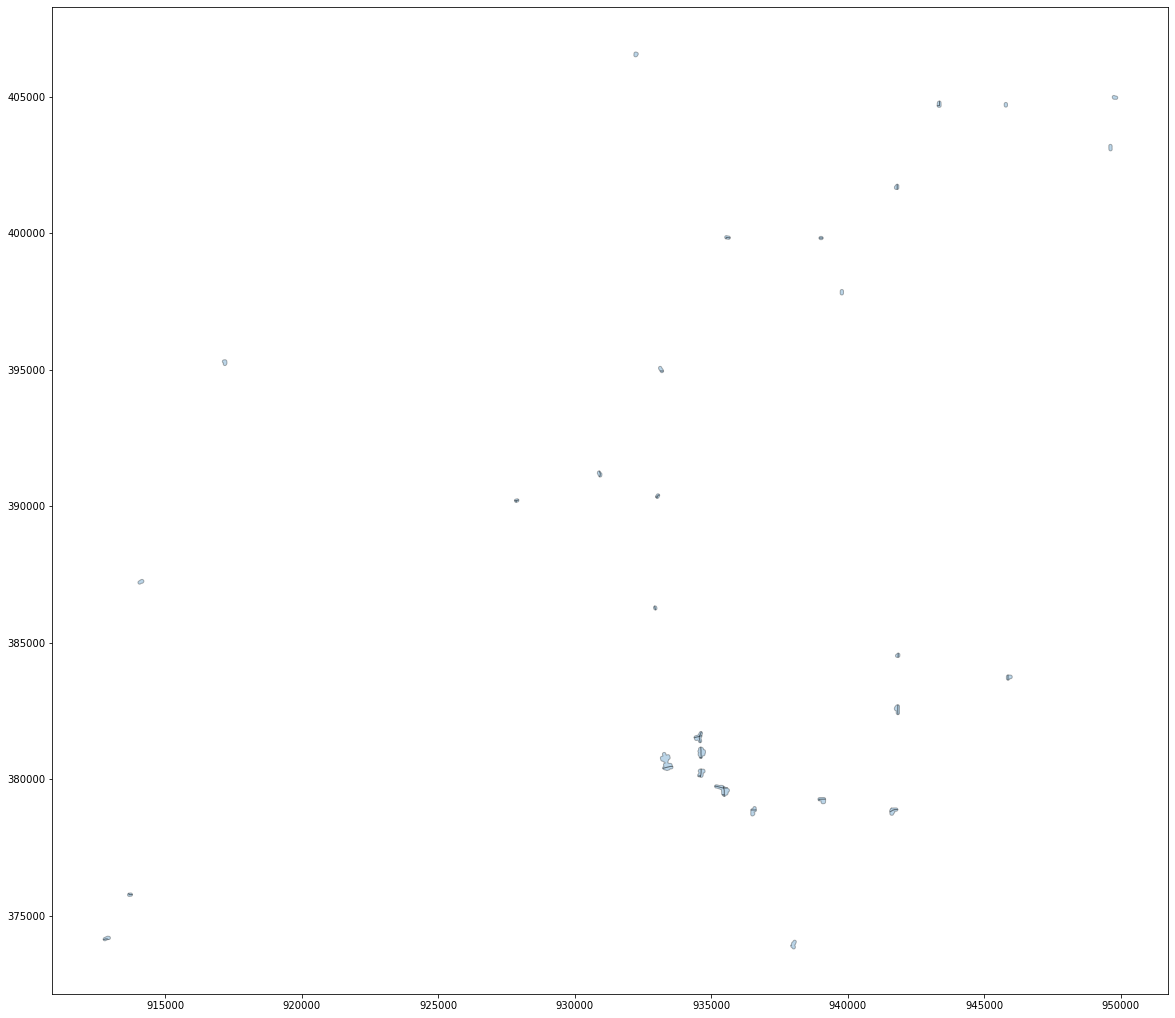

In [1214]:
ax = buffer_clip_race.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1215]:
 inter_race=gpd.overlay(gdf1, buffer_clip_race, how='intersection', make_valid=True, keep_geom_type=False)
 inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             NaN   53.569129   44.246575   5.178082    164.0  ...   
2             3.0  206.745402  102.547945  14.027397    218.0  ...   
3             NaN   53.569129   44.246575   5.178082    164.0  ...   
4             NaN  173.486231   29.082192   3.356164     87.0  ...   

      INTPTLAT      INTPTLON          GISJOIN    Shape_Leng    Shape_Area  \
0  +40.0843340  -105.2472222  G08001300127012  30374.847316  3.397677e+07   
1  +40.0843340  -105.2472222  G08001300127012  30374.847316  3.397677e+07   
2  +40.0946642  -105.3248929  G08001300137011  35342.904324  3.640288e+07   
3  +40.0946642  -105.3248929  G08001300137011  35342.904324  3.640288e+07   
4  +40.0946642  -105.3248929  G08001300137011  35342.904324  3.640288e+07   

   AHY2E001 AHY2E002 AHY2E003 Total block Area  \
0      1201     1201        0     3.397441e+07   
1      1201     1201        0     3.397441e+07   
2      3292     3200       36     3.640047e+07   
3      3292     3200       36     3.640047e+07   
4      3292     3200       36     3.640047e+07   

                                            geometry  
0  POLYGON ((933016.151 386261.250, 933016.461 38...  
1  POLYGON ((933086.125 390322.380, 933083.673 39...  
2  POLYGON ((932962.556 386195.467, 932956.676 38...  
3  POLYGON ((932975.268 390321.014, 932973.216 39...  
4  POLYGON ((927884.852 390144.680, 927881.572 39...  

[5 rows x 26 columns]

In [1216]:
inter_race["buffered area"]=inter_race.area
inter_race['area factor']=inter_race['buffered area']/inter_race["Total block Area"]
inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...   
1             NaN   53.569129   44.246575   5.178082    164.0  ...   
2             3.0  206.745402  102.547945  14.027397    218.0  ...   
3             NaN   53.569129   44.246575   5.178082    164.0  ...   
4             NaN  173.486231   29.082192   3.356164     87.0  ...   

           GISJOIN    Shape_Leng    Shape_Area  AHY2E001 AHY2E002  AHY2E003  \
0  G08001300127012  30374.847316  3.397677e+07      1201     1201         0   
1  G08001300127012  30374.847316  3.397677e+07      1201     1201         0   
2  G08001300137011  35342.904324  3.640288e+07      3292     3200        36   
3  G08001300137011  35342.904324  3.640288e+07      3292     3200        36   
4  G08001300137011  35342.904324  3.640288e+07      3292     3200        36   

  Total block Area                                           geometry  \
0     3.397441e+07  POLYGON ((933016.151 386261.250, 933016.461 38...   
1     3.397441e+07  POLYGON ((933086.125 390322.380, 933083.673 39...   
2     3.640047e+07  POLYGON ((932962.556 386195.467, 932956.676 38...   
3     3.640047e+07  POLYGON ((932975.268 390321.014, 932973.216 39...   
4     3.640047e+07  POLYGON ((927884.852 390144.680, 927881.572 39...   

  buffered area  area factor  
0   8490.712133     0.000250  
1   7055.206159     0.000208  
2   6444.441931     0.000177  
3    359.829465     0.000010  
4   5720.182539     0.000157  

[5 rows x 28 columns]

In [1217]:
output_pct_race= inter_race.loc[:, ['osm_id_sensor', 'AHY2E001','AHY2E002','AHY2E003','area factor']]
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY2E001  AHY2E002  AHY2E003  area factor
0    385509341.0      1201      1201         0     0.000250
1     17022948.0      1201      1201         0     0.000208
2    385509341.0      3292      3200        36     0.000177
3     17022948.0      3292      3200        36     0.000010
4     43751772.0      3292      3200        36     0.000157

In [1218]:
output_pct_race.iloc[:, 1:4] = output_pct_race.iloc[:, 1:4].mul(output_pct_race['area factor'],axis=0)
output_pct_race=output_pct_race.drop(['area factor'],axis=1)
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY2E001  AHY2E002  AHY2E003
0    385509341.0  0.300148  0.300148  0.000000
1     17022948.0  0.249402  0.249402  0.000000
2    385509341.0  0.582825  0.566537  0.006374
3     17022948.0  0.032542  0.031633  0.000356
4     43751772.0  0.517324  0.502867  0.005657

# Aggregate by ID

In [1219]:
output_pct_race=output_pct_race.groupby('osm_id_sensor', as_index=False).sum()
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY2E001  AHY2E002  AHY2E003
0     17013477.0  0.170436  0.163075  0.000000
1     17018830.0  0.562002  0.541697  0.020305
2     17022894.0  0.451410  0.417373  0.001674
3     17022948.0  0.810361  0.788569  0.010343
4     17024738.0  0.729020  0.656992  0.022066

# Percentange of White and African American

In [1220]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_race['pct_white']=(output_pct_race['AHY2E002']/output_pct_race['AHY2E001'])*100
output_pct_race['pct_African_American']=(output_pct_race['AHY2E003']/output_pct_race['AHY2E001'])*100
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY2E001  AHY2E002  AHY2E003  pct_white  \
0     17013477.0  0.170436  0.163075  0.000000  95.681063   
1     17018830.0  0.562002  0.541697  0.020305  96.386946   
2     17022894.0  0.451410  0.417373  0.001674  92.459827   
3     17022948.0  0.810361  0.788569  0.010343  97.310844   
4     17024738.0  0.729020  0.656992  0.022066  90.119931   

   pct_African_American  
0              0.000000  
1              3.613054  
2              0.370828  
3              1.276359  
4              3.026842

In [1221]:
output_pct_race1=output_pct_race.drop(['AHY2E001','AHY2E002','AHY2E003'],axis=1)
output_pct_race1.columns=['osm_id','pct_white','pct_African_American']
output_pct_race1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_white  pct_African_American
0  17013477.0  95.681063              0.000000
1  17018830.0  96.386946              3.613054
2  17022894.0  92.459827              0.370828
3  17022948.0  97.310844              1.276359
4  17024738.0  90.119931              3.026842

# Percentage of Male and Female

In [1222]:
#gender=pd.read_csv("../input/oregon-sd-data/age by sex.csv")
gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AJWBM040  AJWBM041  AJWBM042  \
0  Adams County        1      NaN     NaN  ...        33        19        26   
1  Adams County        1      NaN     NaN  ...        48        15        30   
2  Adams County        1      NaN     NaN  ...        32        30        29   
3  Adams County        1      NaN     NaN  ...        12        47        39   
4  Adams County        1      NaN     NaN  ...        19        33        15   

   AJWBM043  AJWBM044  AJWBM045  AJWBM046  AJWBM047  AJWBM048  AJWBM049  
0        60        19        12        23        12        12        32  
1        13        13        28        12        38        12        12  
2        17        23        23        17        19        12        12  
3        20         2        12        10        12        12        12  
4        12        12        17        12        33        12        12  

[5 rows x 136 columns]

In [1223]:
gender1=pd.merge(bg_proj, gender, left_on='GISJOIN', right_on='GISJOIN', how='left')
gender1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJWBM040 AJWBM041 AJWBM042  \
0  Block Group 1  G5030        S  320934.0  ...        33       19       26   
1  Block Group 2  G5030        S  320612.0  ...        48       15       30   
2  Block Group 1  G5030        S  319446.0  ...        32       30       29   
3  Block Group 2  G5030        S  157958.0  ...        12       47       39   
4  Block Group 3  G5030        S  159972.0  ...        19       33       15   

   AJWBM043  AJWBM044 AJWBM045  AJWBM046 AJWBM047  AJWBM048  AJWBM049  
0        60        19       12        23       12        12        32  
1        13        13       28        12       38        12        12  
2        17        23       23        17       19        12        12  
3        20         2       12        10       12        12        12  
4        12        12       17        12       33        12        12  

[5 rows x 152 columns]

In [1224]:
# Clip the data using GeoPandas clip
buffer_clip_gender = gpd.clip(gender1, gdf1)
buffer_clip_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   
723  G08001300122021      08      013  012202        1  080130122021   
724  G08001300122022      08      013  012202        2  080130122022   
725  G08001300122023      08      013  012202        3  080130122023   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJWBM040 AJWBM041 AJWBM042  \
706  Block Group 1  G5030        S  512533.0  ...        62       16       12   
707  Block Group 2  G5030        S  584894.0  ...        61       41       69   
723  Block Group 1  G5030        S  320471.0  ...        48       21       40   
724  Block Group 2  G5030        S  285625.0  ...        12       40       12   
725  Block Group 3  G5030        S  255159.0  ...        12       38        6   

     AJWBM043  AJWBM044 AJWBM045  AJWBM046 AJWBM047  AJWBM048  AJWBM049  
706        12        37       21        12       24        12        12  
707        47        50       31        17       33        24        24  
723        36        78       17        68       12        12        12  
724        70        12       12        12       12        12        12  
725        41        12       18        12       12        12        12  

[5 rows x 152 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


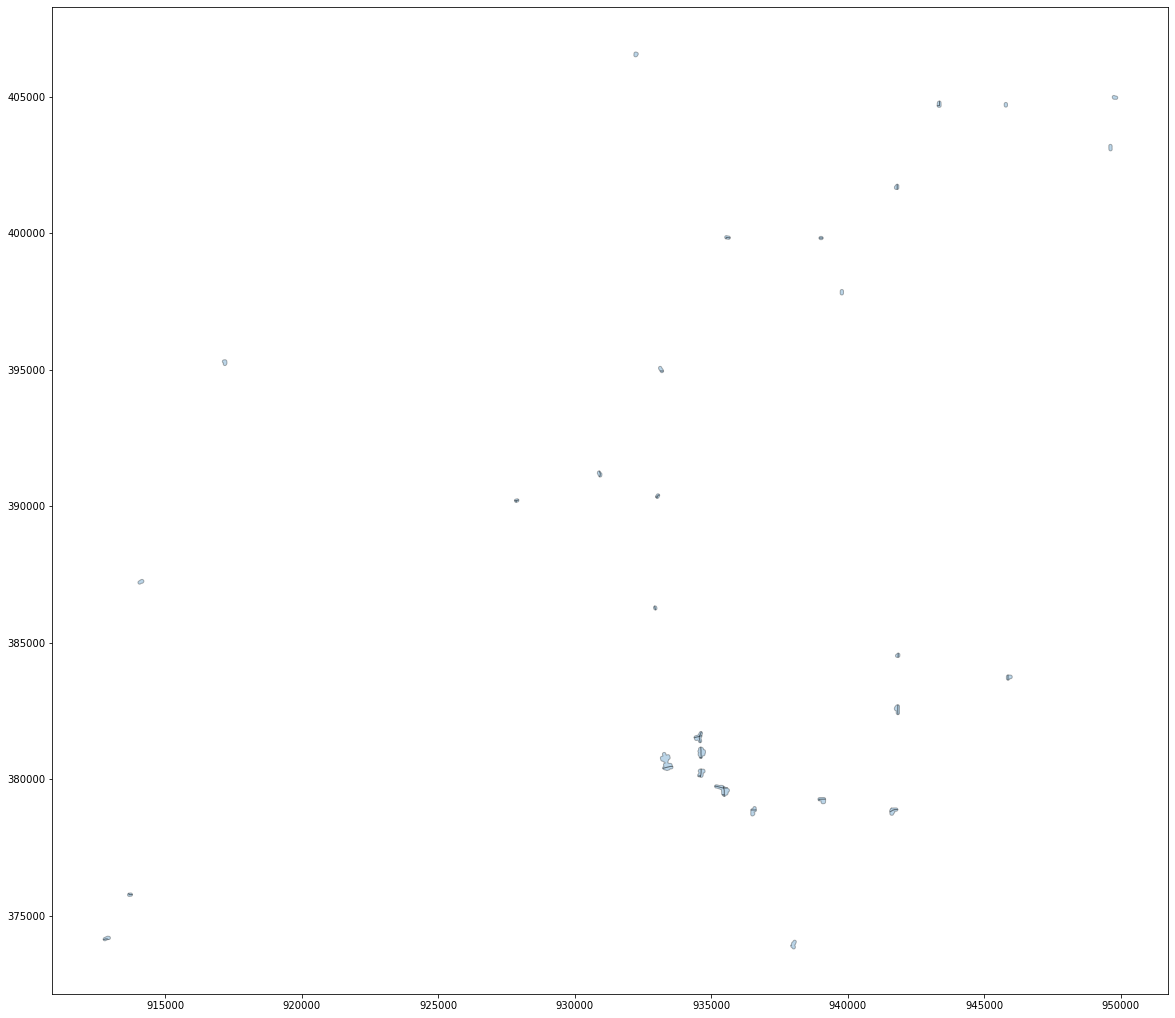

In [1225]:
ax = buffer_clip_gender.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1226]:
 inter_gender=gpd.overlay(gdf1, buffer_clip_gender, how='intersection', make_valid=True, keep_geom_type=False)
 inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJWBM041  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        32   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        32   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        55   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        55   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        55   

   AJWBM042 AJWBM043  AJWBM044 AJWBM045  AJWBM046 AJWBM047 AJWBM048 AJWBM049  \
0        34       74        12       12        48       12       26       41   
1        34       74        12       12        48       12       26       41   
2        45       61        12       48        48       38       29       12   
3        45       61        12       48        48       38       29       12   
4        45       61        12       48        48       38       29       12   

                                            geometry  
0  POLYGON ((933016.151 386261.250, 933016.461 38...  
1  POLYGON ((933086.125 390322.380, 933083.673 39...  
2  POLYGON ((932962.556 386195.467, 932956.676 38...  
3  POLYGON ((932975.268 390321.014, 932973.216 39...  
4  POLYGON ((927884.852 390144.680, 927881.572 39...  

[5 rows x 168 columns]

In [1227]:
inter_gender["buffered area"]=inter_gender.area
inter_gender['area factor']=inter_gender['buffered area']/inter_gender["Total block Area"]
inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJWBM043  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        74   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        74   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        61   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        61   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        61   

   AJWBM044 AJWBM045  AJWBM046 AJWBM047  AJWBM048 AJWBM049  \
0        12       12        48       12        26       41   
1        12       12        48       12        26       41   
2        12       48        48       38        29       12   
3        12       48        48       38        29       12   
4        12       48        48       38        29       12   

                                            geometry buffered area area factor  
0  POLYGON ((933016.151 386261.250, 933016.461 38...   8490.712133    0.000250  
1  POLYGON ((933086.125 390322.380, 933083.673 39...   7055.206159    0.000208  
2  POLYGON ((932962.556 386195.467, 932956.676 38...   6444.441931    0.000177  
3  POLYGON ((932975.268 390321.014, 932973.216 39...    359.829465    0.000010  
4  POLYGON ((927884.852 390144.680, 927881.572 39...   5720.182539    0.000157  

[5 rows x 170 columns]

In [1228]:
#'AHYQE001',=total, 'AHYQE002'=male,AHYQE026=female
gender_filter=inter_gender.loc[:, ['osm_id_sensor', 'AJWBE001', 'AJWBE002', 'AJWBE026','area factor']]
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWBE001  AJWBE002  AJWBE026  area factor
0    385509341.0      1452       692       760     0.000250
1     17022948.0      1452       692       760     0.000208
2    385509341.0      3340      2003      1337     0.000177
3     17022948.0      3340      2003      1337     0.000010
4     43751772.0      3340      2003      1337     0.000157

In [1229]:
gender_filter.iloc[:, 1:4] = gender_filter.iloc[:, 1:4].mul(gender_filter['area factor'],axis=0)
gender_filter=gender_filter.drop(['area factor'],axis=1)
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWBE001  AJWBE002  AJWBE026
0    385509341.0  0.362876  0.172941  0.189935
1     17022948.0  0.301526  0.143702  0.157823
2    385509341.0  0.591323  0.354617  0.236706
3     17022948.0  0.033017  0.019800  0.013217
4     43751772.0  0.524867  0.314763  0.210104

In [1230]:
# Aggregate by ID
output_pct_gender=gender_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWBE001  AJWBE002  AJWBE026
0     17013477.0  0.155714  0.089607  0.066108
1     17018830.0  0.520081  0.260041  0.260041
2     17022894.0  0.474566  0.219009  0.255557
3     17022948.0  0.897460  0.417723  0.479737
4     17024738.0  0.677809  0.292690  0.385119

In [1231]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_gender['pct_male']=(output_pct_gender['AJWBE002']/output_pct_gender['AJWBE001'])*100
output_pct_gender['pct_female']=(output_pct_gender['AJWBE026']/output_pct_gender['AJWBE001'])*100
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWBE001  AJWBE002  AJWBE026   pct_male  pct_female
0     17013477.0  0.155714  0.089607  0.066108  57.545455   42.454545
1     17018830.0  0.520081  0.260041  0.260041  50.000000   50.000000
2     17022894.0  0.474566  0.219009  0.255557  46.149324   53.850676
3     17022948.0  0.897460  0.417723  0.479737  46.545065   53.454935
4     17024738.0  0.677809  0.292690  0.385119  43.181818   56.818182

In [1232]:
output_pct_gender1=output_pct_gender.drop(['AJWBE001', 'AJWBE002', 'AJWBE026'],axis=1)
output_pct_gender1.columns=['osm_id','pct_male','pct_female']
output_pct_gender1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   pct_male  pct_female
0  17013477.0  57.545455   42.454545
1  17018830.0  50.000000   50.000000
2  17022894.0  46.149324   53.850676
3  17022948.0  46.545065   53.454935
4  17024738.0  43.181818   56.818182

# Number of Student (student access) and Education (pct of at least college education population)

In [1233]:
#edu=pd.read_csv("../input/oregon-sd-data/education.csv")
edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2015-2019     CO      NaN        NaN  Colorado       8   
1  G08000100078012  2015-2019     CO      NaN        NaN  Colorado       8   
2  G08000100078021  2015-2019     CO      NaN        NaN  Colorado       8   
3  G08000100078022  2015-2019     CO      NaN        NaN  Colorado       8   
4  G08000100078023  2015-2019     CO      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  ...  ALWGM016  ALWGM017  ALWGM018  \
0  Adams County        1      NaN  ...        32       114        26   
1  Adams County        1      NaN  ...        61       152        32   
2  Adams County        1      NaN  ...        62       134        34   
3  Adams County        1      NaN  ...        44       143        42   
4  Adams County        1      NaN  ...        32       156        78   

   ALWGM019  ALWGM020  ALWGM021  ALWGM022  ALWGM023  ALWGM024  ALWGM025  
0        66        83        42        48        12        12        12  
1        35       110        50        50         8        12        23  
2        38        34         9        29        22        12        13  
3        73        73        27        46        34        12        12  
4        30        43        29        35        25        12        12  

[5 rows x 94 columns]

In [1234]:
edu1=pd.merge(bg_proj, edu, left_on='GISJOIN', right_on='GISJOIN', how='left')
edu1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  ALWGM016 ALWGM017 ALWGM018  \
0  Block Group 1  G5030        S  320934.0  ...        32      114       26   
1  Block Group 2  G5030        S  320612.0  ...        61      152       32   
2  Block Group 1  G5030        S  319446.0  ...        62      134       34   
3  Block Group 2  G5030        S  157958.0  ...        44      143       42   
4  Block Group 3  G5030        S  159972.0  ...        32      156       78   

   ALWGM019  ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024  ALWGM025  
0        66        83       42        48       12       12        12  
1        35       110       50        50        8       12        23  
2        38        34        9        29       22       12        13  
3        73        73       27        46       34       12        12  
4        30        43       29        35       25       12        12  

[5 rows x 110 columns]

In [1235]:
# Clip the data using GeoPandas clip
buffer_clip_edu = gpd.clip(edu1, gdf1)
buffer_clip_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   
723  G08001300122021      08      013  012202        1  080130122021   
724  G08001300122022      08      013  012202        2  080130122022   
725  G08001300122023      08      013  012202        3  080130122023   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  ALWGM016 ALWGM017 ALWGM018  \
706  Block Group 1  G5030        S  512533.0  ...        50       12       12   
707  Block Group 2  G5030        S  584894.0  ...        12       78       28   
723  Block Group 1  G5030        S  320471.0  ...        21       16       21   
724  Block Group 2  G5030        S  285625.0  ...        21       12       12   
725  Block Group 3  G5030        S  255159.0  ...        12       24       12   

     ALWGM019  ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024  ALWGM025  
706        80       127       84       154      181       32        12  
707        29        92       31       179      163       75        67  
723        50        12       54        84      155       26       126  
724        99        59       47       192       61       15        42  
725        32        71       22       153       89       18        12  

[5 rows x 110 columns]

In [1236]:
#ax = buffer_clip_edu.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1237]:
inter_edu=gpd.overlay(gdf1, buffer_clip_edu, how='intersection', make_valid=True, keep_geom_type=False)
inter_edu.head(5)

site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  ALWGM017  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        53   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        53   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        94   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        94   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        94   

   ALWGM018 ALWGM019  ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024 ALWGM025  \
0        26       30        55       54       110       98       53       44   
1        26       30        55       54       110       98       53       44   
2        28       76       102      183       176      125       79       94   
3        28       76       102      183       176      125       79       94   
4        28       76       102      183       176      125       79       94   

                                            geometry  
0  POLYGON ((933016.151 386261.250, 933016.461 38...  
1  POLYGON ((933086.125 390322.380, 933083.673 39...  
2  POLYGON ((932962.556 386195.467, 932956.676 38...  
3  POLYGON ((932975.268 390321.014, 932973.216 39...  
4  POLYGON ((927884.852 390144.680, 927881.572 39...  

[5 rows x 126 columns]

In [1238]:
inter_edu["buffered area"]=inter_edu.area
inter_edu['area factor']=inter_edu['buffered area']/inter_edu["Total block Area"]
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  ALWGM019  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        30   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        30   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        76   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        76   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        76   

   ALWGM020 ALWGM021  ALWGM022 ALWGM023  ALWGM024 ALWGM025  \
0        55       54       110       98        53       44   
1        55       54       110       98        53       44   
2       102      183       176      125        79       94   
3       102      183       176      125        79       94   
4       102      183       176      125        79       94   

                                            geometry buffered area area factor  
0  POLYGON ((933016.151 386261.250, 933016.461 38...   8490.712133    0.000250  
1  POLYGON ((933086.125 390322.380, 933083.673 39...   7055.206159    0.000208  
2  POLYGON ((932962.556 386195.467, 932956.676 38...   6444.441931    0.000177  
3  POLYGON ((932975.268 390321.014, 932973.216 39...    359.829465    0.000010  
4  POLYGON ((927884.852 390144.680, 927881.572 39...   5720.182539    0.000157  

[5 rows x 128 columns]

In [1239]:
edu_filter=inter_edu.loc[:, ['osm_id_sensor', 'ALWGE001', 'ALWGE019','ALWGE020','ALWGE021', 'ALWGE022','ALWGE023','ALWGE024','ALWGE025','area factor']]
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALWGE001  ALWGE019  ALWGE020  ALWGE021  ALWGE022  ALWGE023  \
0    385509341.0       993        25        83        44       383       268   
1     17022948.0       993        25        83        44       383       268   
2    385509341.0      2587       107       200       348       861       518   
3     17022948.0      2587       107       200       348       861       518   
4     43751772.0      2587       107       200       348       861       518   

   ALWGE024  ALWGE025  area factor  
0        74        55     0.000250  
1        74        55     0.000208  
2       161       209     0.000177  
3       161       209     0.000010  
4       161       209     0.000157

In [1240]:
edu_filter.iloc[:, 1:9] = edu_filter.iloc[:, 1:9].mul(edu_filter['area factor'],axis=0)
edu_filter=edu_filter.drop(['area factor'],axis=1)
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALWGE001  ALWGE019  ALWGE020  ALWGE021  ALWGE022  ALWGE023  \
0    385509341.0  0.248166  0.006248  0.020743  0.010996  0.095717  0.066977   
1     17022948.0  0.206209  0.005192  0.017236  0.009137  0.079535  0.055654   
2    385509341.0  0.458010  0.018944  0.035409  0.061611  0.152434  0.091708   
3     17022948.0  0.025573  0.001058  0.001977  0.003440  0.008511  0.005121   
4     43751772.0  0.406536  0.016815  0.031429  0.054687  0.135303  0.081402   

   ALWGE024  ALWGE025  
0  0.018494  0.013745  
1  0.015367  0.011421  
2  0.028504  0.037002  
3  0.001592  0.002066  
4  0.025300  0.032843

In [1241]:
# Aggregate by ID
output_pct_edu=edu_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALWGE001  ALWGE019  ALWGE020  ALWGE021  ALWGE022  ALWGE023  \
0     17013477.0  0.121599  0.009201  0.008918  0.003822  0.058322  0.020101   
1     17018830.0  0.374013  0.007860  0.065501  0.029476  0.094322  0.049781   
2     17022894.0  0.365759  0.015066  0.041012  0.027899  0.116340  0.041012   
3     17022948.0  0.681208  0.019868  0.083676  0.037091  0.216064  0.194240   
4     17024738.0  0.444656  0.025813  0.050378  0.024148  0.168203  0.077024   

   ALWGE024  ALWGE025  
0  0.003681  0.000849  
1  0.021615  0.007860  
2  0.007254  0.015624  
3  0.046920  0.028014  
4  0.019985  0.008327

# Number of students 

In [1242]:
scll.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AJYEM010  AJYEM011  AJYEM012  \
0  Adams County        1      NaN     NaN  ...        52        43        41   
1  Adams County        1      NaN     NaN  ...        41        22        57   
2  Adams County        1      NaN     NaN  ...        15        16        28   
3  Adams County        1      NaN     NaN  ...        21        52        48   
4  Adams County        1      NaN     NaN  ...        20        39        40   

   AJYEM013  AJYEM014  AJYEM015  AJYEM016  AJYEM017  AJYEM018  AJYEM019  
0        34        42        40        31        48        12       267  
1       124        54        34        39        16        14       275  
2        29        12        31         9        12        10       238  
3        12        27        15        44        48        11       243  
4        31        39        31        65        23        26       276  

[5 rows x 76 columns]

In [1243]:
scl1=pd.merge(bg_proj, scll, left_on='GISJOIN', right_on='GISJOIN', how='left')
scl1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJYEM010 AJYEM011 AJYEM012  \
0  Block Group 1  G5030        S  320934.0  ...        52       43       41   
1  Block Group 2  G5030        S  320612.0  ...        41       22       57   
2  Block Group 1  G5030        S  319446.0  ...        15       16       28   
3  Block Group 2  G5030        S  157958.0  ...        21       52       48   
4  Block Group 3  G5030        S  159972.0  ...        20       39       40   

   AJYEM013  AJYEM014 AJYEM015  AJYEM016 AJYEM017  AJYEM018  AJYEM019  
0        34        42       40        31       48        12       267  
1       124        54       34        39       16        14       275  
2        29        12       31         9       12        10       238  
3        12        27       15        44       48        11       243  
4        31        39       31        65       23        26       276  

[5 rows x 92 columns]

In [1244]:
# Clip the data using GeoPandas clip
buffer_clip_scl = gpd.clip(scl1, gdf1)
buffer_clip_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   
723  G08001300122021      08      013  012202        1  080130122021   
724  G08001300122022      08      013  012202        2  080130122022   
725  G08001300122023      08      013  012202        3  080130122023   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJYEM010 AJYEM011 AJYEM012  \
706  Block Group 1  G5030        S  512533.0  ...        12       12       12   
707  Block Group 2  G5030        S  584894.0  ...        19       12       24   
723  Block Group 1  G5030        S  320471.0  ...        66       12       12   
724  Block Group 2  G5030        S  285625.0  ...        12       12       12   
725  Block Group 3  G5030        S  255159.0  ...        12       12       12   

     AJYEM013  AJYEM014 AJYEM015  AJYEM016 AJYEM017  AJYEM018  AJYEM019  
706        12        12       12        12      104        95       251  
707        12        12       12        12      125       132       377  
723        12        12       12        12       51        58       193  
724        12        12       12        97      281        59       434  
725        12        12       12        12      363       150       265  

[5 rows x 92 columns]

In [1245]:
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJYEM011  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        44   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        44   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        41   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        41   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        41   

   AJYEM012 AJYEM013  AJYEM014 AJYEM015  AJYEM016 AJYEM017 AJYEM018 AJYEM019  \
0        21       30        27       30        27       28       33      164   
1        21       30        27       30        27       28       33      164   
2        28       35        21       16       140      111       58      333   
3        28       35        21       16       140      111       58      333   
4        28       35        21       16       140      111       58      333   

                                            geometry  
0  POLYGON ((933016.151 386261.250, 933016.461 38...  
1  POLYGON ((933086.125 390322.380, 933083.673 39...  
2  POLYGON ((932962.556 386195.467, 932956.676 38...  
3  POLYGON ((932975.268 390321.014, 932973.216 39...  
4  POLYGON ((927884.852 390144.680, 927881.572 39...  

[5 rows x 108 columns]

In [1246]:
inter_scl["buffered area"]=inter_scl.area
inter_scl['area factor']=inter_scl['buffered area']/inter_scl["Total block Area"]
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJYEM013  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        30   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        30   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        35   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        35   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        35   

   AJYEM014 AJYEM015  AJYEM016 AJYEM017  AJYEM018 AJYEM019  \
0        27       30        27       28        33      164   
1        27       30        27       28        33      164   
2        21       16       140      111        58      333   
3        21       16       140      111        58      333   
4        21       16       140      111        58      333   

                                            geometry buffered area area factor  
0  POLYGON ((933016.151 386261.250, 933016.461 38...   8490.712133    0.000250  
1  POLYGON ((933086.125 390322.380, 933083.673 39...   7055.206159    0.000208  
2  POLYGON ((932962.556 386195.467, 932956.676 38...   6444.441931    0.000177  
3  POLYGON ((932975.268 390321.014, 932973.216 39...    359.829465    0.000010  
4  POLYGON ((927884.852 390144.680, 927881.572 39...   5720.182539    0.000157  

[5 rows x 110 columns]

In [1247]:
scl_filter=inter_scl.loc[:, ['osm_id_sensor', 'AJYEE001', 'AJYEE017', 'AJYEE018','area factor']]
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJYEE001  AJYEE017  AJYEE018  area factor
0    385509341.0      1422        18        28     0.000250
1     17022948.0      1422        18        28     0.000208
2    385509341.0      3282       171       107     0.000177
3     17022948.0      3282       171       107     0.000010
4     43751772.0      3282       171       107     0.000157

In [1248]:
scl_filter.iloc[:, 1:4] = scl_filter.iloc[:, 1:4].mul(scl_filter['area factor'],axis=0)
scl_filter=scl_filter.drop(['area factor'],axis=1)
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJYEE001  AJYEE017  AJYEE018
0    385509341.0  0.355379  0.004498  0.006998
1     17022948.0  0.295296  0.003738  0.005815
2    385509341.0  0.581055  0.030274  0.018944
3     17022948.0  0.032444  0.001690  0.001058
4     43751772.0  0.515753  0.026872  0.016815

In [1249]:
scl_filter['total student']=scl_filter['AJYEE017']+scl_filter['AJYEE018']
output_student=scl_filter.loc[:,['osm_id_sensor','total student']]
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0    385509341.0       0.011496
1     17022948.0       0.009552
2    385509341.0       0.049218
3     17022948.0       0.002748
4     43751772.0       0.043687

In [1250]:
output_student=output_student.groupby('osm_id_sensor', as_index=False).sum()
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0     17013477.0       0.009201
1     17018830.0       0.017685
2     17022894.0       0.017298
3     17022948.0       0.012301
4     17024738.0       0.015821

In [1251]:
output_student.columns=['osm_id', 'Student Access']
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Student Access
0  17013477.0        0.009201
1  17018830.0        0.017685
2  17022894.0        0.017298
3  17022948.0        0.012301
4  17024738.0        0.015821

# Education ( pct of at least college population)

In [1252]:
# Calculate percentage of education 
output_pct_edu['total_at_least_college_education']=output_pct_edu.iloc[:,2:9].sum(axis=1)
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALWGE001  ALWGE019  ALWGE020  ALWGE021  ALWGE022  ALWGE023  \
0     17013477.0  0.121599  0.009201  0.008918  0.003822  0.058322  0.020101   
1     17018830.0  0.374013  0.007860  0.065501  0.029476  0.094322  0.049781   
2     17022894.0  0.365759  0.015066  0.041012  0.027899  0.116340  0.041012   
3     17022948.0  0.681208  0.019868  0.083676  0.037091  0.216064  0.194240   
4     17024738.0  0.444656  0.025813  0.050378  0.024148  0.168203  0.077024   

   ALWGE024  ALWGE025  total_at_least_college_education  
0  0.003681  0.000849                          0.104895  
1  0.021615  0.007860                          0.276416  
2  0.007254  0.015624                          0.264206  
3  0.046920  0.028014                          0.625875  
4  0.019985  0.008327                          0.373878

In [1253]:
output_pct_edu['pct_at_least_college_education']=(output_pct_edu['total_at_least_college_education']/output_pct_edu['ALWGE001'])*100
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALWGE001  ALWGE019  ALWGE020  ALWGE021  ALWGE022  ALWGE023  \
0     17013477.0  0.121599  0.009201  0.008918  0.003822  0.058322  0.020101   
1     17018830.0  0.374013  0.007860  0.065501  0.029476  0.094322  0.049781   
2     17022894.0  0.365759  0.015066  0.041012  0.027899  0.116340  0.041012   
3     17022948.0  0.681208  0.019868  0.083676  0.037091  0.216064  0.194240   
4     17024738.0  0.444656  0.025813  0.050378  0.024148  0.168203  0.077024   

   ALWGE024  ALWGE025  total_at_least_college_education  \
0  0.003681  0.000849                          0.104895   
1  0.021615  0.007860                          0.276416   
2  0.007254  0.015624                          0.264206   
3  0.046920  0.028014                          0.625875   
4  0.019985  0.008327                          0.373878   

   pct_at_least_college_education  
0                       86.263097  
1                       73.905429  
2                       72.234935  
3                       91.877176  
4                       84.082397

In [1254]:
output_pct_edu1=output_pct_edu.loc[:,['osm_id_sensor','pct_at_least_college_education']]
output_pct_edu1.columns=['osm_id','pct_at_least_college_education']
output_pct_edu1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_at_least_college_education
0  17013477.0                       86.263097
1  17018830.0                       73.905429
2  17022894.0                       72.234935
3  17022948.0                       91.877176
4  17024738.0                       84.082397

# Median Age

In [1255]:
#age=pd.read_csv("../input/oregon-sd-data/median_age.csv")
age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  BTTRA  BTBGA  \
0  Adams County        1      NaN     NaN  ...    NaN    NaN   
1  Adams County        1      NaN     NaN  ...    NaN    NaN   
2  Adams County        1      NaN     NaN  ...    NaN    NaN   
3  Adams County        1      NaN     NaN  ...    NaN    NaN   
4  Adams County        1      NaN     NaN  ...    NaN    NaN   

                                              NAME_E  AJWCE001  AJWCE002  \
0  Block Group 1, Census Tract 78.01, Adams Count...      30.6      30.0   
1  Block Group 2, Census Tract 78.01, Adams Count...      27.7      28.6   
2  Block Group 1, Census Tract 78.02, Adams Count...      27.9      24.7   
3  Block Group 2, Census Tract 78.02, Adams Count...      36.1      40.4   
4  Block Group 3, Census Tract 78.02, Adams Count...      29.9      30.8   

   AJWCE003                                             NAME_M  AJWCM001  \
0      32.4  Block Group 1, Census Tract 78.01, Adams Count...       5.2   
1      25.7  Block Group 2, Census Tract 78.01, Adams Count...       3.8   
2      31.7  Block Group 1, Census Tract 78.02, Adams Count...       8.0   
3      21.8  Block Group 2, Census Tract 78.02, Adams Count...      15.2   
4      29.4  Block Group 3, Census Tract 78.02, Adams Count...       3.8   

   AJWCM002  AJWCM003  
0       6.0       9.5  
1       4.1       2.4  
2       9.1      10.2  
3       3.4       5.4  
4       5.1       5.3  

[5 rows x 44 columns]

In [1256]:
age1=pd.merge(bg_proj, age, left_on='GISJOIN', right_on='GISJOIN', how='left')
age1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  BTTRA BTBGA  \
0  Block Group 1  G5030        S  320934.0  ...    NaN   NaN   
1  Block Group 2  G5030        S  320612.0  ...    NaN   NaN   
2  Block Group 1  G5030        S  319446.0  ...    NaN   NaN   
3  Block Group 2  G5030        S  157958.0  ...    NaN   NaN   
4  Block Group 3  G5030        S  159972.0  ...    NaN   NaN   

                                              NAME_E  AJWCE001  AJWCE002  \
0  Block Group 1, Census Tract 78.01, Adams Count...      30.6      30.0   
1  Block Group 2, Census Tract 78.01, Adams Count...      27.7      28.6   
2  Block Group 1, Census Tract 78.02, Adams Count...      27.9      24.7   
3  Block Group 2, Census Tract 78.02, Adams Count...      36.1      40.4   
4  Block Group 3, Census Tract 78.02, Adams Count...      29.9      30.8   

  AJWCE003                                             NAME_M AJWCM001  \
0     32.4  Block Group 1, Census Tract 78.01, Adams Count...      5.2   
1     25.7  Block Group 2, Census Tract 78.01, Adams Count...      3.8   
2     31.7  Block Group 1, Census Tract 78.02, Adams Count...      8.0   
3     21.8  Block Group 2, Census Tract 78.02, Adams Count...     15.2   
4     29.4  Block Group 3, Census Tract 78.02, Adams Count...      3.8   

   AJWCM002  AJWCM003  
0       6.0       9.5  
1       4.1       2.4  
2       9.1      10.2  
3       3.4       5.4  
4       5.1       5.3  

[5 rows x 60 columns]

In [1257]:
# Clip the data using GeoPandas clip
buffer_clip_age = gpd.clip(age1, gdf1)
buffer_clip_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   
723  G08001300122021      08      013  012202        1  080130122021   
724  G08001300122022      08      013  012202        2  080130122022   
725  G08001300122023      08      013  012202        3  080130122023   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  BTTRA BTBGA  \
706  Block Group 1  G5030        S  512533.0  ...    NaN   NaN   
707  Block Group 2  G5030        S  584894.0  ...    NaN   NaN   
723  Block Group 1  G5030        S  320471.0  ...    NaN   NaN   
724  Block Group 2  G5030        S  285625.0  ...    NaN   NaN   
725  Block Group 3  G5030        S  255159.0  ...    NaN   NaN   

                                                NAME_E  AJWCE001  AJWCE002  \
706  Block Group 1, Census Tract 121.02, Boulder Co...      32.4      35.4   
707  Block Group 2, Census Tract 121.02, Boulder Co...      31.7      30.2   
723  Block Group 1, Census Tract 122.02, Boulder Co...      46.9      48.7   
724  Block Group 2, Census Tract 122.02, Boulder Co...      25.0      26.7   
725  Block Group 3, Census Tract 122.02, Boulder Co...      23.8      25.8   

    AJWCE003                                             NAME_M AJWCM001  \
706     29.6  Block Group 1, Census Tract 121.02, Boulder Co...      6.5   
707     37.1  Block Group 2, Census Tract 121.02, Boulder Co...      5.4   
723     46.4  Block Group 1, Census Tract 122.02, Boulder Co...      4.0   
724     22.8  Block Group 2, Census Tract 122.02, Boulder Co...      1.5   
725     22.6  Block Group 3, Census Tract 122.02, Boulder Co...      1.7   

     AJWCM002  AJWCM003  
706       8.4       4.7  
707       3.7      11.8  
723      10.3      11.2  
724       2.4       1.1  
725       4.3       1.2  

[5 rows x 60 columns]

In [1258]:
inter_age=gpd.overlay(gdf1, buffer_clip_age, how='intersection', make_valid=True, keep_geom_type=False)
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  BTBGA  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
1             NaN   53.569129   44.246575   5.178082    164.0  ...    NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
3             NaN   53.569129   44.246575   5.178082    164.0  ...    NaN   
4             NaN  173.486231   29.082192   3.356164     87.0  ...    NaN   

                                              NAME_E AJWCE001  AJWCE002  \
0  Block Group 2, Census Tract 127.01, Boulder Co...     51.4      51.6   
1  Block Group 2, Census Tract 127.01, Boulder Co...     51.4      51.6   
2  Block Group 1, Census Tract 137.01, Boulder Co...     46.7      47.5   
3  Block Group 1, Census Tract 137.01, Boulder Co...     46.7      47.5   
4  Block Group 1, Census Tract 137.01, Boulder Co...     46.7      47.5   

  AJWCE003                                             NAME_M AJWCM001  \
0     51.2  Block Group 2, Census Tract 127.01, Boulder Co...      3.4   
1     51.2  Block Group 2, Census Tract 127.01, Boulder Co...      3.4   
2     45.3  Block Group 1, Census Tract 137.01, Boulder Co...      2.3   
3     45.3  Block Group 1, Census Tract 137.01, Boulder Co...      2.3   
4     45.3  Block Group 1, Census Tract 137.01, Boulder Co...      2.3   

  AJWCM002 AJWCM003                                           geometry  
0      3.5      5.1  POLYGON ((933016.151 386261.250, 933016.461 38...  
1      3.5      5.1  POLYGON ((933086.125 390322.380, 933083.673 39...  
2      2.2      4.2  POLYGON ((932962.556 386195.467, 932956.676 38...  
3      2.2      4.2  POLYGON ((932975.268 390321.014, 932973.216 39...  
4      2.2      4.2  POLYGON ((927884.852 390144.680, 927881.572 39...  

[5 rows x 76 columns]

In [1259]:
inter_age["buffered area"]=inter_age.area
inter_age['area factor']=inter_age['buffered area']/inter_age["Total block Area"]
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJWCE001  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...      51.4   
1             NaN   53.569129   44.246575   5.178082    164.0  ...      51.4   
2             3.0  206.745402  102.547945  14.027397    218.0  ...      46.7   
3             NaN   53.569129   44.246575   5.178082    164.0  ...      46.7   
4             NaN  173.486231   29.082192   3.356164     87.0  ...      46.7   

   AJWCE002 AJWCE003                                             NAME_M  \
0      51.6     51.2  Block Group 2, Census Tract 127.01, Boulder Co...   
1      51.6     51.2  Block Group 2, Census Tract 127.01, Boulder Co...   
2      47.5     45.3  Block Group 1, Census Tract 137.01, Boulder Co...   
3      47.5     45.3  Block Group 1, Census Tract 137.01, Boulder Co...   
4      47.5     45.3  Block Group 1, Census Tract 137.01, Boulder Co...   

  AJWCM001  AJWCM002 AJWCM003  \
0      3.4       3.5      5.1   
1      3.4       3.5      5.1   
2      2.3       2.2      4.2   
3      2.3       2.2      4.2   
4      2.3       2.2      4.2   

                                            geometry buffered area area factor  
0  POLYGON ((933016.151 386261.250, 933016.461 38...   8490.712133    0.000250  
1  POLYGON ((933086.125 390322.380, 933083.673 39...   7055.206159    0.000208  
2  POLYGON ((932962.556 386195.467, 932956.676 38...   6444.441931    0.000177  
3  POLYGON ((932975.268 390321.014, 932973.216 39...    359.829465    0.000010  
4  POLYGON ((927884.852 390144.680, 927881.572 39...   5720.182539    0.000157  

[5 rows x 78 columns]

In [1260]:
#    Table 1:     Median Age by Sex
#    Universe:    Total population
#    Source code: B01002
#    NHGIS code:  ALT1
#        ALT1E001:    Median age: Total
#        ALT1E002:    Median age: Male
#        ALT1E003:    Median age: Female
age_filter=inter_age.loc[:, ['osm_id_sensor','GEOID','AJWCE001']]
age_filter.columns=['osm_id_sensor','GEOID','AJWCE001']
age_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJWCE001
0    385509341.0  080130127012      51.4
1     17022948.0  080130127012      51.4
2    385509341.0  080130137011      46.7
3     17022948.0  080130137011      46.7
4     43751772.0  080130137011      46.7

In [1261]:
#age_filter.iloc[:, 1:2] = age_filter.iloc[:, 1:2].mul(age_filter['area factor'],axis=0)
#age_filter=age_filter.drop(['area factor'],axis=1)
#age_filter

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1262]:
# Aggregate by ID
#output_median_age=age_filter.groupby('ID', as_index=False).mean()
#output_median_age

In [1263]:
#output_median_age.columns=['ID', 'Median_Age']
#output_median_age

# Median HH_income

In [1264]:
#income=pd.read_csv("../input/oregon-sd-data/median_hh_income.csv")
income.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  SDELMA  SDSECA  SDUNIA  \
0  Adams County        1      NaN     NaN  ...     NaN     NaN     NaN   
1  Adams County        1      NaN     NaN  ...     NaN     NaN     NaN   
2  Adams County        1      NaN     NaN  ...     NaN     NaN     NaN   
3  Adams County        1      NaN     NaN  ...     NaN     NaN     NaN   
4  Adams County        1      NaN     NaN  ...     NaN     NaN     NaN   

   PUMA5A  BTTRA  BTBGA                                             NAME_E  \
0     NaN    NaN    NaN  Block Group 1, Census Tract 78.01, Adams Count...   
1     NaN    NaN    NaN  Block Group 2, Census Tract 78.01, Adams Count...   
2     NaN    NaN    NaN  Block Group 1, Census Tract 78.02, Adams Count...   
3     NaN    NaN    NaN  Block Group 2, Census Tract 78.02, Adams Count...   
4     NaN    NaN    NaN  Block Group 3, Census Tract 78.02, Adams Count...   

   AJZAE001                                             NAME_M  AJZAM001  
0   30455.0  Block Group 1, Census Tract 78.01, Adams Count...    8501.0  
1   34939.0  Block Group 2, Census Tract 78.01, Adams Count...    6612.0  
2   23936.0  Block Group 1, Census Tract 78.02, Adams Count...    6809.0  
3   43594.0  Block Group 2, Census Tract 78.02, Adams Count...   13728.0  
4   27350.0  Block Group 3, Census Tract 78.02, Adams Count...   22043.0  

[5 rows x 40 columns]

In [1265]:
income1=pd.merge(bg_proj, income, left_on='GISJOIN', right_on='GISJOIN', how='left')
income1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  SDELMA SDSECA SDUNIA  PUMA5A  \
0  Block Group 1  G5030        S  320934.0  ...     NaN    NaN    NaN     NaN   
1  Block Group 2  G5030        S  320612.0  ...     NaN    NaN    NaN     NaN   
2  Block Group 1  G5030        S  319446.0  ...     NaN    NaN    NaN     NaN   
3  Block Group 2  G5030        S  157958.0  ...     NaN    NaN    NaN     NaN   
4  Block Group 3  G5030        S  159972.0  ...     NaN    NaN    NaN     NaN   

   BTTRA BTBGA                                             NAME_E AJZAE001  \
0    NaN   NaN  Block Group 1, Census Tract 78.01, Adams Count...  30455.0   
1    NaN   NaN  Block Group 2, Census Tract 78.01, Adams Count...  34939.0   
2    NaN   NaN  Block Group 1, Census Tract 78.02, Adams Count...  23936.0   
3    NaN   NaN  Block Group 2, Census Tract 78.02, Adams Count...  43594.0   
4    NaN   NaN  Block Group 3, Census Tract 78.02, Adams Count...  27350.0   

                                              NAME_M  AJZAM001  
0  Block Group 1, Census Tract 78.01, Adams Count...    8501.0  
1  Block Group 2, Census Tract 78.01, Adams Count...    6612.0  
2  Block Group 1, Census Tract 78.02, Adams Count...    6809.0  
3  Block Group 2, Census Tract 78.02, Adams Count...   13728.0  
4  Block Group 3, Census Tract 78.02, Adams Count...   22043.0  

[5 rows x 56 columns]

In [1266]:
# Clip the data using GeoPandas clip
buffer_clip_income = gpd.clip(income1, gdf1)
buffer_clip_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   
723  G08001300122021      08      013  012202        1  080130122021   
724  G08001300122022      08      013  012202        2  080130122022   
725  G08001300122023      08      013  012202        3  080130122023   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  SDELMA SDSECA SDUNIA  \
706  Block Group 1  G5030        S  512533.0  ...     NaN    NaN    NaN   
707  Block Group 2  G5030        S  584894.0  ...     NaN    NaN    NaN   
723  Block Group 1  G5030        S  320471.0  ...     NaN    NaN    NaN   
724  Block Group 2  G5030        S  285625.0  ...     NaN    NaN    NaN   
725  Block Group 3  G5030        S  255159.0  ...     NaN    NaN    NaN   

     PUMA5A  BTTRA BTBGA                                             NAME_E  \
706     NaN    NaN   NaN  Block Group 1, Census Tract 121.02, Boulder Co...   
707     NaN    NaN   NaN  Block Group 2, Census Tract 121.02, Boulder Co...   
723     NaN    NaN   NaN  Block Group 1, Census Tract 122.02, Boulder Co...   
724     NaN    NaN   NaN  Block Group 2, Census Tract 122.02, Boulder Co...   
725     NaN    NaN   NaN  Block Group 3, Census Tract 122.02, Boulder Co...   

     AJZAE001                                             NAME_M  AJZAM001  
706   52647.0  Block Group 1, Census Tract 121.02, Boulder Co...   23893.0  
707  106855.0  Block Group 2, Census Tract 121.02, Boulder Co...   36892.0  
723       NaN  Block Group 1, Census Tract 122.02, Boulder Co...       NaN  
724   37645.0  Block Group 2, Census Tract 122.02, Boulder Co...   19345.0  
725   19261.0  Block Group 3, Census Tract 122.02, Boulder Co...   17275.0  

[5 rows x 56 columns]

In [1267]:
inter_income=gpd.overlay(gdf1, buffer_clip_income, how='intersection', make_valid=True, keep_geom_type=False)
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  SDSECA  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
1             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
3             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   
4             NaN  173.486231   29.082192   3.356164     87.0  ...     NaN   

   SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN   NaN   

                                              NAME_E  AJZAE001  \
0  Block Group 2, Census Tract 127.01, Boulder Co...  189118.0   
1  Block Group 2, Census Tract 127.01, Boulder Co...  189118.0   
2  Block Group 1, Census Tract 137.01, Boulder Co...   78716.0   
3  Block Group 1, Census Tract 137.01, Boulder Co...   78716.0   
4  Block Group 1, Census Tract 137.01, Boulder Co...   78716.0   

                                              NAME_M AJZAM001  \
0  Block Group 2, Census Tract 127.01, Boulder Co...  50481.0   
1  Block Group 2, Census Tract 127.01, Boulder Co...  50481.0   
2  Block Group 1, Census Tract 137.01, Boulder Co...  14107.0   
3  Block Group 1, Census Tract 137.01, Boulder Co...  14107.0   
4  Block Group 1, Census Tract 137.01, Boulder Co...  14107.0   

                                            geometry  
0  POLYGON ((933016.151 386261.250, 933016.461 38...  
1  POLYGON ((933086.125 390322.380, 933083.673 39...  
2  POLYGON ((932962.556 386195.467, 932956.676 38...  
3  POLYGON ((932975.268 390321.014, 932973.216 39...  
4  POLYGON ((927884.852 390144.680, 927881.572 39...  

[5 rows x 72 columns]

In [1268]:
inter_income["buffered area"]=inter_income.area
inter_income['area factor']=inter_income['buffered area']/inter_income["Total block Area"]
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  PUMA5A  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
1             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
3             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   
4             NaN  173.486231   29.082192   3.356164     87.0  ...     NaN   

   BTTRA BTBGA                                             NAME_E  AJZAE001  \
0    NaN   NaN  Block Group 2, Census Tract 127.01, Boulder Co...  189118.0   
1    NaN   NaN  Block Group 2, Census Tract 127.01, Boulder Co...  189118.0   
2    NaN   NaN  Block Group 1, Census Tract 137.01, Boulder Co...   78716.0   
3    NaN   NaN  Block Group 1, Census Tract 137.01, Boulder Co...   78716.0   
4    NaN   NaN  Block Group 1, Census Tract 137.01, Boulder Co...   78716.0   

                                              NAME_M AJZAM001  \
0  Block Group 2, Census Tract 127.01, Boulder Co...  50481.0   
1  Block Group 2, Census Tract 127.01, Boulder Co...  50481.0   
2  Block Group 1, Census Tract 137.01, Boulder Co...  14107.0   
3  Block Group 1, Census Tract 137.01, Boulder Co...  14107.0   
4  Block Group 1, Census Tract 137.01, Boulder Co...  14107.0   

                                            geometry buffered area area factor  
0  POLYGON ((933016.151 386261.250, 933016.461 38...   8490.712133    0.000250  
1  POLYGON ((933086.125 390322.380, 933083.673 39...   7055.206159    0.000208  
2  POLYGON ((932962.556 386195.467, 932956.676 38...   6444.441931    0.000177  
3  POLYGON ((932975.268 390321.014, 932973.216 39...    359.829465    0.000010  
4  POLYGON ((927884.852 390144.680, 927881.572 39...   5720.182539    0.000157  

[5 rows x 74 columns]

In [1269]:
income_filter=inter_income.loc[:, ['osm_id_sensor','GEOID', 'AJZAE001','area factor']]
income_filter.columns=['osm_id_sensor','GEOID', 'AJZAE001','area factor']
income_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJZAE001  area factor
0    385509341.0  080130127012  189118.0     0.000250
1     17022948.0  080130127012  189118.0     0.000208
2    385509341.0  080130137011   78716.0     0.000177
3     17022948.0  080130137011   78716.0     0.000010
4     43751772.0  080130137011   78716.0     0.000157

# HH_density

In [1270]:
#hhdensity=pd.read_csv("../input/oregon-sd-data/household_type.csv")
hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  \
0  Adams County        1      NaN     NaN  ...   
1  Adams County        1      NaN     NaN  ...   
2  Adams County        1      NaN     NaN  ...   
3  Adams County        1      NaN     NaN  ...   
4  Adams County        1      NaN     NaN  ...   

                                              NAME_M  AJXKM001  AJXKM002  \
0  Block Group 1, Census Tract 78.01, Adams Count...       101        91   
1  Block Group 2, Census Tract 78.01, Adams Count...       101       100   
2  Block Group 1, Census Tract 78.02, Adams Count...        93        91   
3  Block Group 2, Census Tract 78.02, Adams Count...        84        70   
4  Block Group 3, Census Tract 78.02, Adams Count...        92        93   

   AJXKM003  AJXKM004  AJXKM005  AJXKM006  AJXKM007  AJXKM008  AJXKM009  
0        80        57        16        55        99        87        34  
1        61        89        62        68        82        69        51  
2        71        79        42        72        64        46        42  
3        50        64        35        53        76        53        65  
4        87        64        41        52        77        55        53  

[5 rows x 56 columns]

In [1271]:
hhdensity1=pd.merge(bg_proj, hhdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  \
0  Block Group 1  G5030        S  320934.0  ...   
1  Block Group 2  G5030        S  320612.0  ...   
2  Block Group 1  G5030        S  319446.0  ...   
3  Block Group 2  G5030        S  157958.0  ...   
4  Block Group 3  G5030        S  159972.0  ...   

                                              NAME_M AJXKM001 AJXKM002  \
0  Block Group 1, Census Tract 78.01, Adams Count...      101       91   
1  Block Group 2, Census Tract 78.01, Adams Count...      101      100   
2  Block Group 1, Census Tract 78.02, Adams Count...       93       91   
3  Block Group 2, Census Tract 78.02, Adams Count...       84       70   
4  Block Group 3, Census Tract 78.02, Adams Count...       92       93   

   AJXKM003  AJXKM004 AJXKM005  AJXKM006 AJXKM007  AJXKM008  AJXKM009  
0        80        57       16        55       99        87        34  
1        61        89       62        68       82        69        51  
2        71        79       42        72       64        46        42  
3        50        64       35        53       76        53        65  
4        87        64       41        52       77        55        53  

[5 rows x 72 columns]

In [1272]:
hhdensity1['Total Block HH']=hhdensity1.AJXKE001
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G08000100078011      08      001  007801        1  080010078011   
1  G08000100078012      08      001  007801        2  080010078012   
2  G08000100078021      08      001  007802        1  080010078021   
3  G08000100078022      08      001  007802        2  080010078022   
4  G08000100078023      08      001  007802        3  080010078023   

        NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJXKM001 AJXKM002 AJXKM003  \
0  Block Group 1  G5030        S  320934.0  ...       101       91       80   
1  Block Group 2  G5030        S  320612.0  ...       101      100       61   
2  Block Group 1  G5030        S  319446.0  ...        93       91       71   
3  Block Group 2  G5030        S  157958.0  ...        84       70       50   
4  Block Group 3  G5030        S  159972.0  ...        92       93       87   

   AJXKM004  AJXKM005 AJXKM006  AJXKM007 AJXKM008  AJXKM009  Total Block HH  
0        57        16       55        99       87        34             556  
1        89        62       68        82       69        51             724  
2        79        42       72        64       46        42             564  
3        64        35       53        76       53        65             388  
4        64        41       52        77       55        53             493  

[5 rows x 73 columns]

In [1273]:
# Clip the data using GeoPandas clip
buffer_clip_hhdensity1 = gpd.clip(hhdensity1, gdf1)
buffer_clip_hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
706  G08001300121021      08      013  012102        1  080130121021   
707  G08001300121022      08      013  012102        2  080130121022   
723  G08001300122021      08      013  012202        1  080130122021   
724  G08001300122022      08      013  012202        2  080130122022   
725  G08001300122023      08      013  012202        3  080130122023   

          NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  AJXKM001 AJXKM002 AJXKM003  \
706  Block Group 1  G5030        S  512533.0  ...       148      113       72   
707  Block Group 2  G5030        S  584894.0  ...       177      177      138   
723  Block Group 1  G5030        S  320471.0  ...       144       73       73   
724  Block Group 2  G5030        S  285625.0  ...       203      121       42   
725  Block Group 3  G5030        S  255159.0  ...       197      152       43   

     AJXKM004  AJXKM005 AJXKM006  AJXKM007 AJXKM008  AJXKM009  Total Block HH  
706        88        31       79       139      125        79             854  
707        57        57       12        99       85        96             764  
723        12        12       12       147      135        62             525  
724       111        73       83       194       97       191            1057  
725       140       137       26       155       94       168             886  

[5 rows x 73 columns]

In [1274]:
inter_hhdensity=gpd.overlay(gdf1, buffer_clip_hhdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJXKM002  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        74   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        74   
2             3.0  206.745402  102.547945  14.027397    218.0  ...       124   
3             NaN   53.569129   44.246575   5.178082    164.0  ...       124   
4             NaN  173.486231   29.082192   3.356164     87.0  ...       124   

   AJXKM003 AJXKM004  AJXKM005 AJXKM006  AJXKM007 AJXKM008 AJXKM009  \
0        71       32        12       32        55       49       24   
1        71       32        12       32        55       49       24   
2       123       77        51       52       162      141      118   
3       123       77        51       52       162      141      118   
4       123       77        51       52       162      141      118   

  Total Block HH                                           geometry  
0            528  POLYGON ((933016.151 386261.250, 933016.461 38...  
1            528  POLYGON ((933086.125 390322.380, 933083.673 39...  
2           1382  POLYGON ((932962.556 386195.467, 932956.676 38...  
3           1382  POLYGON ((932975.268 390321.014, 932973.216 39...  
4           1382  POLYGON ((927884.852 390144.680, 927881.572 39...  

[5 rows x 89 columns]

In [1275]:
inter_hhdensity["buffered area"]=inter_hhdensity.area
inter_hhdensity['area factor']=inter_hhdensity['buffered area']/inter_hhdensity["Total block Area"]
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJXKM004  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        32   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        32   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        77   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        77   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        77   

   AJXKM005 AJXKM006  AJXKM007 AJXKM008  AJXKM009 Total Block HH  \
0        12       32        55       49        24            528   
1        12       32        55       49        24            528   
2        51       52       162      141       118           1382   
3        51       52       162      141       118           1382   
4        51       52       162      141       118           1382   

                                            geometry buffered area area factor  
0  POLYGON ((933016.151 386261.250, 933016.461 38...   8490.712133    0.000250  
1  POLYGON ((933086.125 390322.380, 933083.673 39...   7055.206159    0.000208  
2  POLYGON ((932962.556 386195.467, 932956.676 38...   6444.441931    0.000177  
3  POLYGON ((932975.268 390321.014, 932973.216 39...    359.829465    0.000010  
4  POLYGON ((927884.852 390144.680, 927881.572 39...   5720.182539    0.000157  

[5 rows x 91 columns]

In [1276]:
# Aggregate by ID
hh=inter_hhdensity.loc[:,['osm_id_sensor',"GEOID","Total Block HH",'buffered area']]
#hh.columns=['osm_id_sensor',"GEOID","Total Block HH",'buffered area']
hh.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  Total Block HH  buffered area
0    385509341.0  080130127012             528    8490.712133
1     17022948.0  080130127012             528    7055.206159
2    385509341.0  080130137011            1382    6444.441931
3     17022948.0  080130137011            1382     359.829465
4     43751772.0  080130137011            1382    5720.182539

In [1277]:
#    Table 1:     Household Type (Including Living Alone)
#    Universe:    Households
#    Source code: B11001
#    NHGIS code:  AHZZ
#        AHZZE001:    Total
#        AHZZE002:    Family households
#        AHZZE003:    Family households: Married-couple family
#        AHZZE004:    Family households: Other family
#        AHZZE005:    Family households: Other family: Male householder, no wife present
#        AHZZE006:    Family households: Other family: Female householder, no husband present
#        AHZZE007:    Nonfamily households
#        AHZZE008:    Nonfamily households: Householder living alone
#        AHZZE009:    Nonfamily households: Householder not living alone
hhdensity_filter=inter_hhdensity.loc[:, ['osm_id_sensor', 'GEOID','AJXKE001','area factor']]
#hhdensity_filter.columns=['osm_id_sensor', 'GEOID','ALU9E001','area factor']
hh_factor=hhdensity_filter.copy()
hh_factor.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJXKE001  area factor
0    385509341.0  080130127012       528     0.000250
1     17022948.0  080130127012       528     0.000208
2    385509341.0  080130137011      1382     0.000177
3     17022948.0  080130137011      1382     0.000010
4     43751772.0  080130137011      1382     0.000157

In [1278]:
hh_factor["buffered_hh"]=hh_factor['AJXKE001']*hh_factor['area factor']
hh_factor['hh factor']=hh_factor['buffered_hh']/hh_factor['AJXKE001']
hh_factor.head() # factor is basically same

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJXKE001  area factor  buffered_hh  hh factor
0    385509341.0  080130127012       528     0.000250     0.131955   0.000250
1     17022948.0  080130127012       528     0.000208     0.109646   0.000208
2    385509341.0  080130137011      1382     0.000177     0.244673   0.000177
3     17022948.0  080130137011      1382     0.000010     0.013661   0.000010
4     43751772.0  080130137011      1382     0.000157     0.217176   0.000157

In [1279]:
hh_factor1=hh_factor.loc[:,["osm_id_sensor","GEOID","buffered_hh"]]
hh_factor1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  buffered_hh
0    385509341.0  080130127012     0.131955
1     17022948.0  080130127012     0.109646
2    385509341.0  080130137011     0.244673
3     17022948.0  080130137011     0.013661
4     43751772.0  080130137011     0.217176

In [1280]:
hhdensity_filter.iloc[:, 2:3] = hhdensity_filter.iloc[:, 2:3].mul(hhdensity_filter['area factor'],axis=0)
hhdensity_filter=hhdensity_filter.drop(['area factor'],axis=1)
hhf=hhdensity_filter.copy()
hhdensity_filter.head()


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJXKE001
0    385509341.0  080130127012  0.131955
1     17022948.0  080130127012  0.109646
2    385509341.0  080130137011  0.244673
3     17022948.0  080130137011  0.013661
4     43751772.0  080130137011  0.217176

In [1281]:
# Aggregate by ID
hhdensity_filter=hhdensity_filter.drop(["GEOID"],axis=1)
output_hhdensity=hhdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJXKE001
0     17013477.0  0.074743
1     17018830.0  0.184059
2     17022894.0  0.173533
3     17022948.0  0.343027
4     17024738.0  0.239398

In [1282]:
# Aggregate by ID
output_hhdensity=pd.merge(output_hhdensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_hhdensity=output_hhdensity.loc[:,['osm_id_sensor','AJXKE001','buffer_area']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1283]:
output_hhdensity['HH_density']=output_hhdensity.AJXKE001/output_hhdensity.buffer_area
output_hhdensity.head()

osm_id_sensor  AJXKE001  buffer_area  HH_density
0     17013477.0  0.074743     0.009898    7.551011
1     17018830.0  0.184059     0.008120   22.666663
2     17022894.0  0.173533     0.006727   25.797723
3     17022948.0  0.343027     0.006824   50.266105
4     17024738.0  0.239398     0.008629   27.744022

In [1284]:
output_hhdensity1=output_hhdensity.loc[:, ['osm_id_sensor', 'HH_density']]
output_hhdensity1.columns=['osm_id', 'HH_density']
output_hhdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  HH_density
0  17013477.0    7.551011
1  17018830.0   22.666663
2  17022894.0   25.797723
3  17022948.0   50.266105
4  17024738.0   27.744022

# Weighted HH_income

In [1285]:
whh_income=pd.merge(income_filter, hh_factor1, on=['osm_id_sensor', 'GEOID'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJZAE001  area factor  buffered_hh
0    385509341.0  080130127012  189118.0     0.000250     0.131955
1     17022948.0  080130127012  189118.0     0.000208     0.109646
2    385509341.0  080130137011   78716.0     0.000177     0.244673
3     17022948.0  080130137011   78716.0     0.000010     0.013661
4     43751772.0  080130137011   78716.0     0.000157     0.217176

In [1286]:
whh_income['wt_incme']=whh_income['AJZAE001'].mul(whh_income['buffered_hh'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJZAE001  area factor  buffered_hh  \
0    385509341.0  080130127012  189118.0     0.000250     0.131955   
1     17022948.0  080130127012  189118.0     0.000208     0.109646   
2    385509341.0  080130137011   78716.0     0.000177     0.244673   
3     17022948.0  080130137011   78716.0     0.000010     0.013661   
4     43751772.0  080130137011   78716.0     0.000157     0.217176   

       wt_incme  
0  24955.079218  
1  20735.979014  
2  19259.695118  
3   1075.377179  
4  17095.191935

In [1287]:
income_filter=whh_income.drop(['GEOID','AJZAE001','area factor'],axis=1)
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0    385509341.0     0.131955  24955.079218
1     17022948.0     0.109646  20735.979014
2    385509341.0     0.244673  19259.695118
3     17022948.0     0.013661   1075.377179
4     43751772.0     0.217176  17095.191935

In [1288]:
# Aggregate by ID
income_filter=income_filter.groupby('osm_id_sensor', as_index=False).sum()
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0     17013477.0     0.074743   5185.289577
1     17018830.0     0.184059  21817.061480
2     17022894.0     0.173533  16389.173395
3     17022948.0     0.343027  62537.890787
4     17024738.0     0.239398  24583.330713

In [1289]:
income_filter['HH weighted income']=income_filter['wt_incme']/income_filter['buffered_hh']
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme  HH weighted income
0     17013477.0     0.074743   5185.289577        69375.000000
1     17018830.0     0.184059  21817.061480       118533.000000
2     17022894.0     0.173533  16389.173395        94444.000000
3     17022948.0     0.343027  62537.890787       182312.057107
4     17024738.0     0.239398  24583.330713       102688.000000

In [1290]:
output_income=income_filter.drop(['buffered_hh','wt_incme'],axis=1)
output_income.columns=['osm_id', 'Median_HH_income']
output_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median_HH_income
0  17013477.0      69375.000000
1  17018830.0     118533.000000
2  17022894.0      94444.000000
3  17022948.0     182312.057107
4  17024738.0     102688.000000

# Population Density

In [1291]:
#pdensity=pd.read_csv("../input/oregon-sd-data/population.csv")
pdensity1=pd.merge(bg_proj, pdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_pdensity1 = gpd.clip(pdensity1, gdf1)
inter_pdensity=gpd.overlay(gdf1, buffer_clip_pdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  SDSECA  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
1             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
3             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   
4             NaN  173.486231   29.082192   3.356164     87.0  ...     NaN   

   SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN   NaN   

                                              NAME_E AJWME001  \
0  Block Group 2, Census Tract 127.01, Boulder Co...     1452   
1  Block Group 2, Census Tract 127.01, Boulder Co...     1452   
2  Block Group 1, Census Tract 137.01, Boulder Co...     3340   
3  Block Group 1, Census Tract 137.01, Boulder Co...     3340   
4  Block Group 1, Census Tract 137.01, Boulder Co...     3340   

                                              NAME_M AJWMM001  \
0  Block Group 2, Census Tract 127.01, Boulder Co...      251   
1  Block Group 2, Census Tract 127.01, Boulder Co...      251   
2  Block Group 1, Census Tract 137.01, Boulder Co...      423   
3  Block Group 1, Census Tract 137.01, Boulder Co...      423   
4  Block Group 1, Census Tract 137.01, Boulder Co...      423   

                                            geometry  
0  POLYGON ((933016.151 386261.250, 933016.461 38...  
1  POLYGON ((933086.125 390322.380, 933083.673 39...  
2  POLYGON ((932962.556 386195.467, 932956.676 38...  
3  POLYGON ((932975.268 390321.014, 932973.216 39...  
4  POLYGON ((927884.852 390144.680, 927881.572 39...  

[5 rows x 72 columns]

In [1292]:
inter_pdensity["buffered area"]=inter_pdensity.area
inter_pdensity['area factor']=inter_pdensity['buffered area']/inter_pdensity["Total block Area"]
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  PUMA5A  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
1             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...     NaN   
3             NaN   53.569129   44.246575   5.178082    164.0  ...     NaN   
4             NaN  173.486231   29.082192   3.356164     87.0  ...     NaN   

   BTTRA BTBGA                                             NAME_E AJWME001  \
0    NaN   NaN  Block Group 2, Census Tract 127.01, Boulder Co...     1452   
1    NaN   NaN  Block Group 2, Census Tract 127.01, Boulder Co...     1452   
2    NaN   NaN  Block Group 1, Census Tract 137.01, Boulder Co...     3340   
3    NaN   NaN  Block Group 1, Census Tract 137.01, Boulder Co...     3340   
4    NaN   NaN  Block Group 1, Census Tract 137.01, Boulder Co...     3340   

                                              NAME_M AJWMM001  \
0  Block Group 2, Census Tract 127.01, Boulder Co...      251   
1  Block Group 2, Census Tract 127.01, Boulder Co...      251   
2  Block Group 1, Census Tract 137.01, Boulder Co...      423   
3  Block Group 1, Census Tract 137.01, Boulder Co...      423   
4  Block Group 1, Census Tract 137.01, Boulder Co...      423   

                                            geometry buffered area area factor  
0  POLYGON ((933016.151 386261.250, 933016.461 38...   8490.712133    0.000250  
1  POLYGON ((933086.125 390322.380, 933083.673 39...   7055.206159    0.000208  
2  POLYGON ((932962.556 386195.467, 932956.676 38...   6444.441931    0.000177  
3  POLYGON ((932975.268 390321.014, 932973.216 39...    359.829465    0.000010  
4  POLYGON ((927884.852 390144.680, 927881.572 39...   5720.182539    0.000157  

[5 rows x 74 columns]

In [1293]:
pdensity_filter=inter_pdensity.loc[:, ['osm_id_sensor', 'AJWME001','area factor']]
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWME001  area factor
0    385509341.0      1452     0.000250
1     17022948.0      1452     0.000208
2    385509341.0      3340     0.000177
3     17022948.0      3340     0.000010
4     43751772.0      3340     0.000157

In [1294]:
age_pop=inter_pdensity.loc[:, ['osm_id_sensor', 'GEOID','AJWME001','area factor']]
#age_pop.columns=['osm_id_sensor', 'GEOID','ALUBE001','area factor']
age_pop.iloc[:, 2:3]=age_pop.iloc[:, 2:3].mul(age_pop['area factor'],axis=0)
age_pop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJWME001  area factor
0    385509341.0  080130127012  0.362876     0.000250
1     17022948.0  080130127012  0.301526     0.000208
2    385509341.0  080130137011  0.591323     0.000177
3     17022948.0  080130137011  0.033017     0.000010
4     43751772.0  080130137011  0.524867     0.000157

In [1295]:
pp=inter_pdensity.loc[:, ['osm_id_sensor','GEOID', 'AJWME001','area factor']]
#pp.columns=['osm_id_sensor','GEOID', 'AJWME001','area factor']
pp.columns=['osm_id','GEOID', 'AJWME001','pp factor']
pp1=pp.loc[:,["osm_id",'GEOID',"pp factor"]]
pp1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         GEOID  pp factor
0  385509341.0  080130127012   0.000250
1   17022948.0  080130127012   0.000208
2  385509341.0  080130137011   0.000177
3   17022948.0  080130137011   0.000010
4   43751772.0  080130137011   0.000157

In [1296]:
pdensity_filter.iloc[:, 1:2] = pdensity_filter.iloc[:, 1:2].mul(pdensity_filter['area factor'],axis=0)
pdensity_filter=pdensity_filter.drop(['area factor'],axis=1)
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWME001
0    385509341.0  0.362876
1     17022948.0  0.301526
2    385509341.0  0.591323
3     17022948.0  0.033017
4     43751772.0  0.524867

In [1297]:
# Aggregate by ID
output_pdensity=pdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pdensity=pd.merge(output_pdensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_pdensity=output_pdensity.loc[:,['osm_id_sensor','AJWME001','buffer_area']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1298]:
output_pdensity['population_density']=output_pdensity.AJWME001/output_pdensity.buffer_area
output_pdensity.head()

osm_id_sensor  AJWME001  buffer_area  population_density
0     17013477.0  0.155714     0.009898           15.731274
1     17018830.0  0.520081     0.008120           64.047438
2     17022894.0  0.474566     0.006727           70.549722
3     17022948.0  0.897460     0.006824          131.511151
4     17024738.0  0.677809     0.008629           78.551769

In [1299]:
output_pdensity1=output_pdensity.loc[:, ['osm_id_sensor', 'population_density']]
output_pdensity1.columns=['osm_id', 'population_density']
output_pdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  population_density
0  17013477.0           15.731274
1  17018830.0           64.047438
2  17022894.0           70.549722
3  17022948.0          131.511151
4  17024738.0           78.551769

# Weighted Median Age

In [1300]:
w_age=pd.merge(age_pop,age_filter,on=["osm_id_sensor","GEOID"])
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJWME001  area factor  AJWCE001
0    385509341.0  080130127012  0.362876     0.000250      51.4
1     17022948.0  080130127012  0.301526     0.000208      51.4
2    385509341.0  080130137011  0.591323     0.000177      46.7
3     17022948.0  080130137011  0.033017     0.000010      46.7
4     43751772.0  080130137011  0.524867     0.000157      46.7

In [1301]:
w_age['w_age']=(w_age['AJWME001'].mul(w_age['AJWCE001'],axis=0))
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AJWME001  area factor  AJWCE001      w_age
0    385509341.0  080130127012  0.362876     0.000250      51.4  18.651849
1     17022948.0  080130127012  0.301526     0.000208      51.4  15.498422
2    385509341.0  080130137011  0.591323     0.000177      46.7  27.614787
3     17022948.0  080130137011  0.033017     0.000010      46.7   1.541889
4     43751772.0  080130137011  0.524867     0.000157      46.7  24.511296

In [1302]:
#w_age.iloc[:, 3:4] = w_age.iloc[:, 3:4].mul(w_age['pp factor'],axis=0)
age_filter1=w_age.drop(['GEOID','AJWCE001','area factor'],axis=1)
age_filter1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWME001      w_age
0    385509341.0  0.362876  18.651849
1     17022948.0  0.301526  15.498422
2    385509341.0  0.591323  27.614787
3     17022948.0  0.033017   1.541889
4     43751772.0  0.524867  24.511296

In [1303]:
# Aggregate by ID
output_median_age=age_filter1.groupby('osm_id_sensor', as_index=False).sum()
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWME001      w_age
0     17013477.0  0.155714   8.875721
1     17018830.0  0.520081  25.640004
2     17022894.0  0.474566  23.823212
3     17022948.0  0.897460  48.507402
4     17024738.0  0.677809  27.857966

In [1304]:
output_median_age['median weighted age']=output_median_age['w_age']/output_median_age['AJWME001']
output_median_age=output_median_age.drop(['AJWME001','w_age'],axis=1)
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  median weighted age
0     17013477.0            57.000000
1     17018830.0            49.300000
2     17022894.0            50.200000
3     17022948.0            54.049644
4     17024738.0            41.100000

In [1305]:
output_median_age.columns=["osm_id","Median Age"]
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median Age
0  17013477.0   57.000000
1  17018830.0   49.300000
2  17022894.0   50.200000
3  17022948.0   54.049644
4  17024738.0   41.100000

# Employment Density

In [1306]:
#edensity=pd.read_csv("../input/employment/nhgis0012_ds233_20175_2017_blck_grp.csv")
edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2014-2018      NaN        NaN  Colorado       8   
1  G08000100078012  2014-2018      NaN        NaN  Colorado       8   
2  G08000100078021  2014-2018      NaN        NaN  Colorado       8   
3  G08000100078022  2014-2018      NaN        NaN  Colorado       8   
4  G08000100078023  2014-2018      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AJ1FM064  AJ1FM065  AJ1FM066  \
0  Adams County        1      NaN     NaN  ...        46        44        29   
1  Adams County        1      NaN     NaN  ...        38        21        17   
2  Adams County        1      NaN     NaN  ...        35        54        12   
3  Adams County        1      NaN     NaN  ...        39        48        12   
4  Adams County        1      NaN     NaN  ...        13        31        64   

   AJ1FM067  AJ1FM068  AJ1FM069  AJ1FM070  AJ1FM071  AJ1FM072  AJ1FM073  
0        12        29        12        69        44        12        46  
1        17        12        12        53        52        12        13  
2        12        12        12        12        12        12        12  
3        12        12        12        23        12        15        19  
4        12        64        12       119       119        12        12  

[5 rows x 184 columns]

In [1307]:

edensity1=pd.merge(bg_proj, edensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_edensity1 = gpd.clip(edensity1, gdf1)
inter_edensity=gpd.overlay(gdf1, buffer_clip_edensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJ1FM065  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        44   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        44   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        89   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        89   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        89   

   AJ1FM066 AJ1FM067  AJ1FM068 AJ1FM069  AJ1FM070 AJ1FM071 AJ1FM072 AJ1FM073  \
0        12       12        12       12        12       12       12       12   
1        12       12        12       12        12       12       12       12   
2        12       12        12       12        26       26       12       12   
3        12       12        12       12        26       26       12       12   
4        12       12        12       12        26       26       12       12   

                                            geometry  
0  POLYGON ((933016.151 386261.250, 933016.461 38...  
1  POLYGON ((933086.125 390322.380, 933083.673 39...  
2  POLYGON ((932962.556 386195.467, 932956.676 38...  
3  POLYGON ((932975.268 390321.014, 932973.216 39...  
4  POLYGON ((927884.852 390144.680, 927881.572 39...  

[5 rows x 216 columns]

In [1308]:
inter_edensity["buffered area"]=inter_edensity.area
inter_edensity['area factor']=inter_edensity['buffered area']/inter_edensity["Total block Area"]
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  AJ1FM067  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        12   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        12   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        12   

   AJ1FM068 AJ1FM069  AJ1FM070 AJ1FM071  AJ1FM072 AJ1FM073  \
0        12       12        12       12        12       12   
1        12       12        12       12        12       12   
2        12       12        26       26        12       12   
3        12       12        26       26        12       12   
4        12       12        26       26        12       12   

                                            geometry buffered area area factor  
0  POLYGON ((933016.151 386261.250, 933016.461 38...   8490.712133    0.000250  
1  POLYGON ((933086.125 390322.380, 933083.673 39...   7055.206159    0.000208  
2  POLYGON ((932962.556 386195.467, 932956.676 38...   6444.441931    0.000177  
3  POLYGON ((932975.268 390321.014, 932973.216 39...    359.829465    0.000010  
4  POLYGON ((927884.852 390144.680, 927881.572 39...   5720.182539    0.000157  

[5 rows x 218 columns]

In [1309]:
filtered_columns=['osm_id_sensor','AJ1FE001','area factor']
edensity_filter=inter_edensity.reindex(columns = filtered_columns)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJ1FE001  area factor
0    385509341.0       547     0.000250
1     17022948.0       547     0.000208
2    385509341.0      1722     0.000177
3     17022948.0      1722     0.000010
4     43751772.0      1722     0.000157

In [1310]:
edensity_filter.iloc[:, 1:2] = edensity_filter.iloc[:, 1:2].mul(edensity_filter['area factor'],axis=0)
edensity_filter=edensity_filter.drop(['area factor'],axis=1)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJ1FE001
0    385509341.0  0.136703
1     17022948.0  0.113591
2    385509341.0  0.304868
3     17022948.0  0.017022
4     43751772.0  0.270605

In [1311]:
# Aggregate by ID
output_edensity=edensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_edensity=pd.merge(output_edensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_edensity=output_edensity.loc[:,['osm_id_sensor','AJ1FE001','buffer_area']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1312]:
output_edensity['employment_density']=output_edensity.AJ1FE001/output_edensity.buffer_area
output_edensity.head()

osm_id_sensor  AJ1FE001  buffer_area  employment_density
0     17013477.0  0.079981     0.009898            8.080154
1     17018830.0  0.238425     0.008120           29.361798
2     17022894.0  0.260858     0.006727           38.779536
3     17022948.0  0.421152     0.006824           61.714347
4     17024738.0  0.282698     0.008629           32.762071

In [1313]:
output_edensity1=output_edensity.loc[:, ['osm_id_sensor', 'employment_density']]
output_edensity1.columns=['osm_id', 'employment_density']
output_edensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  employment_density
0  17013477.0            8.080154
1  17018830.0           29.361798
2  17022894.0           38.779536
3  17022948.0           61.714347
4  17024738.0           32.762071

# Number of Jobs within the Buffer (LEHD data)

In [1314]:
# Number of Jobs within buffer
Number_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


w_geocode  C000  CA01  CA02  CA03  CE01  CE02  CE03  CNS01  CNS02  \
0  80010078011000     7     2     3     2     1     1     5      0      0   
1  80010078011003     1     0     1     0     0     0     1      0      0   
2  80010078011004    26     6    11     9     4    13     9      0      0   
3  80010078011007   170    15    95    60   102    52    16      0      0   
4  80010078011008    67    15    38    14     6    23    38      0      0   

   ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  CFS04  CFS05  \
0  ...      0      0      0      0      0      0      0      0      0   
1  ...      0      0      0      0      0      0      0      0      0   
2  ...      0      0      0      0      0      0      0      0      0   
3  ...      0      0      0      0      0      0      0      0      0   
4  ...      0      0      0      0      0      0      0      0      0   

   createdate  
0    20201120  
1    20201120  
2    20201120  
3    20201120  
4    20201120  

[5 rows x 53 columns]

In [1315]:
bg_lehd1=bg_lehd.drop_duplicates(subset='BLOCKID10')
bg_lehd1['BLOCKID10'] = pd.to_numeric(bg_lehd1['BLOCKID10'])
bg_lehd1.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10       object
COUNTYFP10      object
TRACTCE10       object
BLOCKCE         object
BLOCKID10        int64
PARTFLG         object
HOUSING10        int64
POP10            int64
geometry      geometry
dtype: object

In [1316]:
print(bg_lehd1.crs)

epsg:4269


In [1317]:
# set the co-ordinate system first
bg_lehd2 = bg_lehd1.set_crs("EPSG:4269")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_lehd2_proj = bg_lehd2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_lehd2_proj = bg_lehd2_proj.to_crs('epsg:2772')
bg_lehd2_proj.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE       BLOCKID10 PARTFLG  HOUSING10  \
0        08        001    008402    1246  80010084021246       N          5   
1        08        001    008402    1240  80010084021240       N          3   
2        08        001    008402    1392  80010084021392       N          0   
3        08        001    008523    3045  80010085233045       N          0   
4        08        001    008523    3047  80010085233047       N          1   

   POP10                                           geometry  
0     14  POLYGON ((1039509.293 351764.898, 1039509.386 ...  
1      9  POLYGON ((1051550.967 351251.634, 1050895.312 ...  
2      0  POLYGON ((1065042.365 351430.196, 1065010.572 ...  
3      0  POLYGON ((971008.738 374660.055, 971009.779 37...  
4      0  POLYGON ((971014.431 374652.880, 971030.054 37...

In [1318]:
bg_lehd2_proj["Total block Area"]=bg_lehd2_proj.area
bg_lehd2_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE       BLOCKID10 PARTFLG  HOUSING10  \
0        08        001    008402    1246  80010084021246       N          5   
1        08        001    008402    1240  80010084021240       N          3   
2        08        001    008402    1392  80010084021392       N          0   
3        08        001    008523    3045  80010085233045       N          0   
4        08        001    008523    3047  80010085233047       N          1   

   POP10                                           geometry  Total block Area  
0     14  POLYGON ((1039509.293 351764.898, 1039509.386 ...      3.701553e+07  
1      9  POLYGON ((1051550.967 351251.634, 1050895.312 ...      1.061803e+08  
2      0  POLYGON ((1065042.365 351430.196, 1065010.572 ...      9.732591e+06  
3      0  POLYGON ((971008.738 374660.055, 971009.779 37...      6.065931e+03  
4      0  POLYGON ((971014.431 374652.880, 971030.054 37...      1.125057e+04

In [1319]:
job1=pd.merge(bg_lehd2_proj, Number_job, left_on='BLOCKID10', right_on='w_geocode', how='left')
buffer_clip_job1 = gpd.clip(job1, gdf1)
buffer_clip_job1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE       BLOCKID10 PARTFLG  \
24239        08        013    012710    1018  80130127101018       N   
24401        08        013    012204    3020  80130122043020       N   
24403        08        013    012204    3059  80130122043059       N   
24441        08        013    012102    2000  80130121022000       N   
24444        08        013    012204    3048  80130122043048       N   

       HOUSING10  POP10                                           geometry  \
24239          1      5  POLYGON ((938949.311 379260.642, 939093.181 37...   
24401          0      0  POLYGON ((933144.083 380748.709, 933142.892 38...   
24403          0      0  POLYGON ((933275.463 380491.471, 933281.235 38...   
24441        210    356  POLYGON ((934633.196 381725.000, 934630.092 38...   
24444          0      4  POLYGON ((933275.463 380491.471, 933268.659 38...   

       Total block Area  ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  \
24239      33538.977442  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
24401       8117.909192  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
24403      20284.970090  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
24441     195413.973247  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
24444      23236.288237  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       CFS04  CFS05  createdate  
24239    0.0    0.0  20201120.0  
24401    0.0    0.0  20201120.0  
24403    0.0    0.0  20201120.0  
24441    0.0    0.0  20201120.0  
24444    0.0    0.0  20201120.0  

[5 rows x 63 columns]

In [1320]:
inter_job=gpd.overlay(gdf1, buffer_clip_job1, how='intersection', make_valid=True, keep_geom_type=False)
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  CFA03  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   
1             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   
3             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   
4             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   

   CFA04 CFA05  CFS01 CFS02  CFS03 CFS04 CFS05  createdate  \
0    0.0   0.0    0.0   0.0    0.0   0.0   0.0  20201120.0   
1    NaN   NaN    NaN   NaN    NaN   NaN   NaN         NaN   
2    0.0   0.0    0.0   0.0    0.0   0.0   0.0  20201120.0   
3    0.0   0.0    0.0   0.0    0.0   0.0   0.0  20201120.0   
4    0.0   0.0    0.0   0.0    0.0   0.0   0.0  20201120.0   

                                            geometry  
0  POLYGON ((932989.819 386326.758, 932991.857 38...  
1  POLYGON ((932941.450 386343.870, 932947.330 38...  
2  POLYGON ((932962.556 386195.467, 932956.676 38...  
3  POLYGON ((932901.028 386322.078, 932904.967 38...  
4  POLYGON ((932935.176 386306.734, 932933.451 38...  

[5 rows x 79 columns]

In [1321]:
inter_job["buffered area"]=inter_job.area
inter_job['area factor']=inter_job['buffered area']/inter_job["Total block Area"]
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
4  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  CFA05  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   
1             3.0  206.745402  102.547945  14.027397    218.0  ...    NaN   
2             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   
3             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   
4             3.0  206.745402  102.547945  14.027397    218.0  ...    0.0   

   CFS01 CFS02  CFS03 CFS04  CFS05  createdate  \
0    0.0   0.0    0.0   0.0    0.0  20201120.0   
1    NaN   NaN    NaN   NaN    NaN         NaN   
2    0.0   0.0    0.0   0.0    0.0  20201120.0   
3    0.0   0.0    0.0   0.0    0.0  20201120.0   
4    0.0   0.0    0.0   0.0    0.0  20201120.0   

                                            geometry buffered area area factor  
0  POLYGON ((932989.819 386326.758, 932991.857 38...      6.059487    0.000002  
1  POLYGON ((932941.450 386343.870, 932947.330 38...   2069.531531    0.053195  
2  POLYGON ((932962.556 386195.467, 932956.676 38...   5352.326898    0.003179  
3  POLYGON ((932901.028 386322.078, 932904.967 38...    649.391001    0.001800  
4  POLYGON ((932935.176 386306.734, 932933.451 38...    591.163163    0.622343  

[5 rows x 81 columns]

In [1322]:
 # columns to keep
filtered_columns=['osm_id_sensor','C000','area factor']
job_filter=inter_job.reindex(columns = filtered_columns)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  C000  area factor
0    385509341.0  63.0     0.000002
1    385509341.0   NaN     0.053195
2    385509341.0   8.0     0.003179
3    385509341.0   9.0     0.001800
4    385509341.0   1.0     0.622343

In [1323]:
job_filter.iloc[:, 1:2] = job_filter.iloc[:, 1:2].mul(job_filter['area factor'],axis=0)
job_filter=job_filter.drop(['area factor'],axis=1)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      C000
0    385509341.0  0.000113
1    385509341.0       NaN
2    385509341.0  0.025429
3    385509341.0  0.016202
4    385509341.0  0.622343

In [1324]:
# Aggregate by ID
output_job=job_filter.groupby('osm_id_sensor', as_index=False).sum()
output_job.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      C000
0     17013477.0  0.000012
1     17018830.0  0.128269
2     17022894.0  0.112023
3     17022948.0  0.038343
4     17024738.0  0.021082

In [1325]:
output_job.columns=['osm_id', 'Number of jobs']
output_job1=output_job
output_job1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Number of jobs
0  17013477.0        0.000012
1  17018830.0        0.128269
2  17022894.0        0.112023
3  17022948.0        0.038343
4  17024738.0        0.021082

# percentage of bike commute or Bike commute per Square miles

In [1326]:
bike_commute.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA     STATE  STATEA  \
0  G08000100078011  2015-2019     CO      NaN        NaN  Colorado       8   
1  G08000100078012  2015-2019     CO      NaN        NaN  Colorado       8   
2  G08000100078021  2015-2019     CO      NaN        NaN  Colorado       8   
3  G08000100078022  2015-2019     CO      NaN        NaN  Colorado       8   
4  G08000100078023  2015-2019     CO      NaN        NaN  Colorado       8   

         COUNTY  COUNTYA  COUSUBA  ...  ALU1M012  ALU1M013  ALU1M014  \
0  Adams County        1      NaN  ...        12        12       103   
1  Adams County        1      NaN  ...        12        12        59   
2  Adams County        1      NaN  ...        12        12        12   
3  Adams County        1      NaN  ...        12        12        12   
4  Adams County        1      NaN  ...        12        12        12   

   ALU1M015  ALU1M016  ALU1M017  ALU1M018  ALU1M019  ALU1M020  ALU1M021  
0        12        12        34        19        33        61        66  
1        12        12        12         9        36        12        13  
2        12        27        12        34        34        12        24  
3        12        28        12        44        14        12        21  
4        12        12        12        12        85        12        12  

[5 rows x 86 columns]

In [1327]:
bikecom1=pd.merge(bg_proj, bike_commute, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_bikecom1 = gpd.clip(bikecom1, gdf1)
inter_bikecom1=gpd.overlay(gdf1, buffer_clip_bikecom1, how='intersection', make_valid=True, keep_geom_type=False)
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  ALU1M013  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        12   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        12   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        12   

   ALU1M014 ALU1M015  ALU1M016 ALU1M017  ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0        12       12        12       12        12       12       12       69   
1        12       12        12       12        12       12       12       69   
2        12       12        12       20        38        8       29      101   
3        12       12        12       20        38        8       29      101   
4        12       12        12       20        38        8       29      101   

                                            geometry  
0  POLYGON ((933016.151 386261.250, 933016.461 38...  
1  POLYGON ((933086.125 390322.380, 933083.673 39...  
2  POLYGON ((932962.556 386195.467, 932956.676 38...  
3  POLYGON ((932975.268 390321.014, 932973.216 39...  
4  POLYGON ((927884.852 390144.680, 927881.572 39...  

[5 rows x 118 columns]

In [1328]:
inter_bikecom1["buffered area"]=inter_bikecom1.area
inter_bikecom1['area factor']=inter_bikecom1['buffered area']/inter_bikecom1["Total block Area"]
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                      site_name sensor_type  year   region  \
0  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
1  S009BOU                        NEVA RD  short-term  2019  Boulder   
2  P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
3  S009BOU                        NEVA RD  short-term  2019  Boulder   
4  S025BOU                JAMES CANYON DR  short-term  2019  Boulder   

   travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  ALU1M015  \
0             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
1             NaN   53.569129   44.246575   5.178082    164.0  ...        12   
2             3.0  206.745402  102.547945  14.027397    218.0  ...        12   
3             NaN   53.569129   44.246575   5.178082    164.0  ...        12   
4             NaN  173.486231   29.082192   3.356164     87.0  ...        12   

   ALU1M016 ALU1M017  ALU1M018 ALU1M019  ALU1M020 ALU1M021  \
0        12       12        12       12        12       69   
1        12       12        12       12        12       69   
2        12       20        38        8        29      101   
3        12       20        38        8        29      101   
4        12       20        38        8        29      101   

                                            geometry buffered area area factor  
0  POLYGON ((933016.151 386261.250, 933016.461 38...   8490.712133    0.000250  
1  POLYGON ((933086.125 390322.380, 933083.673 39...   7055.206159    0.000208  
2  POLYGON ((932962.556 386195.467, 932956.676 38...   6444.441931    0.000177  
3  POLYGON ((932975.268 390321.014, 932973.216 39...    359.829465    0.000010  
4  POLYGON ((927884.852 390144.680, 927881.572 39...   5720.182539    0.000157  

[5 rows x 120 columns]

In [1329]:
#Table 1:     Means of Transportation to Work
#    Universe:    Workers 16 years and over
#    Source code: B08301
#    NHGIS code:  ALU1
#        ALU1E001:    Total
#        ALU1E002:    Car, truck, or van
#        ALU1E003:    Car, truck, or van: Drove alone
#        ALU1E004:    Car, truck, or van: Carpooled
#        ALU1E005:    Car, truck, or van: Carpooled: In 2-person carpool
#        ALU1E006:    Car, truck, or van: Carpooled: In 3-person carpool
#        ALU1E007:    Car, truck, or van: Carpooled: In 4-person carpool
#        ALU1E008:    Car, truck, or van: Carpooled: In 5- or 6-person carpool
#        ALU1E009:    Car, truck, or van: Carpooled: In 7-or-more-person carpool
 #       ALU1E010:    Public transportation (excluding taxicab)
#        ALU1E011:    Public transportation (excluding taxicab): Bus
#        ALU1E012:    Public transportation (excluding taxicab): Subway or elevated rail
#        ALU1E013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#        ALU1E014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro público in Puerto Rico)
#       ALU1E015:    Public transportation (excluding taxicab): Ferryboat
#        ALU1E016:    Taxicab
#        ALU1E017:    Motorcycle
#        ALU1E018:    Bicycle
#        ALU1E019:    Walked
#        ALU1E020:    Other means
#        ALU1E021:    Worked from home

# columns to keep
filtered_columns=['osm_id_sensor','ALU1E001','ALU1E018','area factor']
bikecom_filter=inter_bikecom1.reindex(columns = filtered_columns)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALU1E001  ALU1E018  area factor
0    385509341.0       629         0     0.000250
1     17022948.0       629         0     0.000208
2    385509341.0      1703        34     0.000177
3     17022948.0      1703        34     0.000010
4     43751772.0      1703        34     0.000157

In [1330]:
bikecom_filter.iloc[:, 1:3] = bikecom_filter.iloc[:, 1:3].mul(bikecom_filter['area factor'],axis=0)
bikecom_filter=bikecom_filter.drop(['area factor'],axis=1)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALU1E001  ALU1E018
0    385509341.0  0.157196  0.000000
1     17022948.0  0.130620  0.000000
2    385509341.0  0.301504  0.006019
3     17022948.0  0.016835  0.000336
4     43751772.0  0.267619  0.005343

In [1331]:
# Aggregate by ID
output_bikecom=bikecom_filter.groupby('osm_id_sensor', as_index=False).sum()
output_bikecom=pd.merge(output_bikecom,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_bikecom=output_bikecom.loc[:,['osm_id_sensor','ALU1E001','ALU1E018','buffer_area']]
output_bikecom.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALU1E001  ALU1E018  buffer_area
0     17013477.0  0.079839  0.000000     0.009898
1     17018830.0  0.227945  0.000000     0.008120
2     17022894.0  0.273691  0.000000     0.006727
3     17022948.0  0.402583  0.000336     0.006824
4     17024738.0  0.281449  0.004996     0.008629

In [1332]:
# Calculate the percentage pf bike commuter and bike commuter density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1333]:
output_bikecom['Percentage of Bike Commuter']=(output_bikecom['ALU1E018']/output_bikecom['ALU1E001'])*100
output_bikecom['bike commuter density']=output_bikecom.ALU1E018/output_bikecom.buffer_area
output_bikecom=output_bikecom.drop(['buffer_area'],axis=1)
output_bikecom.columns=["osm_id","Total Commuter", "Bike Commuter", "Percentage of Bike Commuter",'bike commuter density']
output_bikecom.head()

osm_id  Total Commuter  Bike Commuter  Percentage of Bike Commuter  \
0  17013477.0        0.079839       0.000000                     0.000000   
1  17018830.0        0.227945       0.000000                     0.000000   
2  17022894.0        0.273691       0.000000                     0.000000   
3  17022948.0        0.402583       0.000336                     0.083486   
4  17024738.0        0.281449       0.004996                     1.775148   

   bike commuter density  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.049251  
4               0.579006

# Extract slope from raster file

In [1334]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1335]:
# set the co-ordinate system first
stravas = strava_proj.set_crs("EPSG:2772")
stravas ["length"]=stravas["geometry"].length # in m
# Let's take a copy of our layer
strava_slope = stravas.copy()

# Reproject the geometries by replacing the values with projected ones
strava_slope_new = strava_slope.to_crs(epsg=4269)
strava_slope_new.head(10)

OBJECTID    ID     OSM_ID          OSM_NAME OSM_META    OSM_SOURCE  \
0         1   1.0  4271726.0       30th Street     None  5.207434e+08   
1         2   2.0  4271726.0       30th Street     None  1.041202e+09   
2         3   3.0  4271726.0       30th Street     None  2.703585e+09   
3         4   4.0  4271726.0       30th Street     None  1.041202e+09   
4         5   5.0  4279016.0  Table Mesa Court     None  2.567663e+07   
5         6   6.0  4279016.0  Table Mesa Court     None  3.929910e+08   
6         7   7.0  4280551.0     Stephens Road     None  2.568937e+07   
7         8   8.0  4280551.0     Stephens Road     None  2.568937e+07   
8         9  10.0  4375030.0              None     None  1.764405e+08   
9        10  38.0  4924640.0        Oak Circle     None  3.232482e+07   

     OSM_TARGET  CLAZZ  FLAGS    SOURCE  ...   KMH      COST      REVERSE_CO  \
0  1.041202e+09   32.0    3.0     760.0  ...  50.0  0.001203  1000000.000000   
1  2.703585e+09   32.0    3.0  298999.0  ...  50.0  0.000872  1000000.000000   
2  1.041202e+09   32.0    3.0  448631.0  ...  50.0  0.001769  1000000.000000   
3  5.207539e+08   32.0    3.0  299007.0  ...  50.0  0.001714  1000000.000000   
4  3.929910e+08   32.0    3.0     996.0  ...  50.0  0.000691        0.000691   
5  3.929910e+08   32.0    3.0     997.0  ...  50.0  0.001877        0.001877   
6  2.568937e+07   32.0    3.0     998.0  ...  50.0  0.002682        0.002682   
7  1.764882e+08   32.0    3.0   21663.0  ...  50.0  0.004651        0.004651   
8  2.667869e+07   91.0    6.0    1002.0  ...   5.0  0.008712        0.008712   
9  1.760635e+08   32.0    3.0    1020.0  ...  50.0  0.003786        0.003786   

           X1         Y1          X2         Y2  Shape_Leng  \
0 -105.253117  39.999954 -105.253115  39.999413    0.000541   
1 -105.253115  39.999413 -105.253114  39.999021    0.000392   
2 -105.253114  39.999021 -105.253111  39.998225    0.000795   
3 -105.253111  39.998225 -105.252981  39.997470    0.000781   
4 -105.260134  39.980297 -105.260130  39.980607    0.000311   
5 -105.260130  39.980607 -105.260130  39.980607    0.000891   
6 -105.262728  39.981225 -105.261341  39.981711    0.001501   
7 -105.261341  39.981711 -105.258796  39.981203    0.002657   
8 -105.230841  39.993164 -105.231299  39.993279    0.000491   
9 -105.099479  39.931441 -105.101371  39.930551    0.002091   

                                            geometry      length  
0  LINESTRING (-105.25310 39.99995, -105.25310 39...   60.056793  
1  LINESTRING (-105.25310 39.99940, -105.25310 39...   43.535338  
2  LINESTRING (-105.25310 39.99901, -105.25310 39...   88.303169  
3  LINESTRING (-105.25310 39.99822, -105.25310 39...   85.590609  
4  LINESTRING (-105.26012 39.98029, -105.26012 39...   34.488057  
5  LINESTRING (-105.26012 39.98060, -105.26004 39...   93.789748  
6  LINESTRING (-105.26272 39.98122, -105.26209 39...  134.331921  
7  LINESTRING (-105.26133 39.98170, -105.26010 39...  233.004747  
8  LINESTRING (-105.23083 39.99316, -105.23087 39...   43.635045  
9  LINESTRING (-105.09947 39.93143, -105.10017 39...  189.557150  

[10 rows x 22 columns]

In [1336]:
# get the slope for each link of the network
strava_slope_new=GeoDataFrame.explode(strava_slope_new)
# First identify the starting and ending node of each link
strava_slope_new['starting point'] = None
strava_slope_new['ending point'] = None

for index, row in strava_slope_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    strava_slope_new.at[index,'starting point'] = Point(first_coord)
    strava_slope_new.at[index,'ending point'] = Point(last_coord)
    strava_slope_new

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1337]:
strava_slope_new.head(5)

OBJECTID   ID     OSM_ID          OSM_NAME OSM_META    OSM_SOURCE  \
0 0         1  1.0  4271726.0       30th Street     None  5.207434e+08   
1 0         2  2.0  4271726.0       30th Street     None  1.041202e+09   
2 0         3  3.0  4271726.0       30th Street     None  2.703585e+09   
3 0         4  4.0  4271726.0       30th Street     None  1.041202e+09   
4 0         5  5.0  4279016.0  Table Mesa Court     None  2.567663e+07   

       OSM_TARGET  CLAZZ  FLAGS    SOURCE  ...      REVERSE_CO          X1  \
0 0  1.041202e+09   32.0    3.0     760.0  ...  1000000.000000 -105.253117   
1 0  2.703585e+09   32.0    3.0  298999.0  ...  1000000.000000 -105.253115   
2 0  1.041202e+09   32.0    3.0  448631.0  ...  1000000.000000 -105.253114   
3 0  5.207539e+08   32.0    3.0  299007.0  ...  1000000.000000 -105.253111   
4 0  3.929910e+08   32.0    3.0     996.0  ...        0.000691 -105.260134   

            Y1          X2         Y2  Shape_Leng     length  \
0 0  39.999954 -105.253115  39.999413    0.000541  60.056793   
1 0  39.999413 -105.253114  39.999021    0.000392  43.535338   
2 0  39.999021 -105.253111  39.998225    0.000795  88.303169   
3 0  39.998225 -105.252981  39.997470    0.000781  85.590609   
4 0  39.980297 -105.260130  39.980607    0.000311  34.488057   

                                              geometry  \
0 0  LINESTRING (-105.25310 39.99995, -105.25310 39...   
1 0  LINESTRING (-105.25310 39.99940, -105.25310 39...   
2 0  LINESTRING (-105.25310 39.99901, -105.25310 39...   
3 0  LINESTRING (-105.25310 39.99822, -105.25310 39...   
4 0  LINESTRING (-105.26012 39.98029, -105.26012 39...   

                                   starting point  \
0 0  POINT (-105.2531046563963 39.99994539965464)   
1 0  POINT (-105.2531028590122 39.99940450217688)   
2 0   POINT (-105.253101561709 39.99901240404818)   
3 0  POINT (-105.2530988655419 39.99821710750916)   
4 0   POINT (-105.260122380822 39.98028861256802)   

                                     ending point  
0 0  POINT (-105.2531028590122 39.99940450217688)  
1 0   POINT (-105.253101561709 39.99901240404818)  
2 0  POINT (-105.2530988655419 39.99821710750916)  
3 0  POINT (-105.2529689696879 39.99746141020555)  
4 0  POINT (-105.2601180794046 39.98059921089892)  

[5 rows x 24 columns]

In [1338]:
sf1=strava_slope_new.loc[:,["OSM_ID","starting point"]]
sf1.columns=["OSM_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["OSM_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                     geometry   start_lon  start_lat
0 0  4271726.0  POINT (-105.25310 39.99995) -105.253105  39.999945
1 0  4271726.0  POINT (-105.25310 39.99940) -105.253103  39.999405
2 0  4271726.0  POINT (-105.25310 39.99901) -105.253102  39.999012
3 0  4271726.0  POINT (-105.25310 39.99822) -105.253099  39.998217
4 0  4279016.0  POINT (-105.26012 39.98029) -105.260122  39.980289

In [1339]:
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = eu.index(x,y)
sf2["starting_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1340]:
ef1=strava_slope_new.loc[:,["OSM_ID","ending point"]]
ef1
ef1.columns=["OSM_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["OSM_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

OSM_ID                     geometry     end_lon    end_lat
0 0  4271726.0  POINT (-105.25310 39.99940) -105.253103  39.999405
1 0  4271726.0  POINT (-105.25310 39.99901) -105.253102  39.999012
2 0  4271726.0  POINT (-105.25310 39.99822) -105.253099  39.998217
3 0  4271726.0  POINT (-105.25297 39.99746) -105.252969  39.997461
4 0  4279016.0  POINT (-105.26012 39.98060) -105.260118  39.980599

In [1341]:
ef1["ending_ele"]= None
#point in test['geometry']:
x = ef1["end_lon"]
y = ef1["end_lat"]
row, col = eu.index(x,y)
ef1["ending_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1342]:
s=sf2
s=s.drop(["geometry"],axis=1)
s.head(5)

OSM_ID   start_lon  start_lat  starting_ele
0 0  4271726.0 -105.253105  39.999945   1626.226074
1 0  4271726.0 -105.253103  39.999405   1626.247925
2 0  4271726.0 -105.253102  39.999012   1626.670776
3 0  4271726.0 -105.253099  39.998217   1628.044434
4 0  4279016.0 -105.260122  39.980289   1687.918091

In [1343]:
e=ef1
e=e.drop(["geometry"],axis=1)
e.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID     end_lon    end_lat   ending_ele
0 0  4271726.0 -105.253103  39.999405  1626.247925
1 0  4271726.0 -105.253102  39.999012  1626.670776
2 0  4271726.0 -105.253099  39.998217  1628.044434
3 0  4271726.0 -105.252969  39.997461  1629.751099
4 0  4279016.0 -105.260118  39.980599  1689.275269

In [1344]:
strava_slope_new=strava_slope_new.loc[:, ['OSM_ID',"geometry","length"]]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1345]:
from functools import reduce
strava_all=[strava_slope_new,s,e]

strava_all1= reduce(lambda  left,right: pd.merge(left,right,on=['OSM_ID'],
                                            how='outer'), strava_all).fillna('0')

In [1346]:
strava_all1["slope"]=abs((strava_all1['starting_ele']-strava_all1['ending_ele'])/strava_all1['length'])*100
strava_all1=strava_all1.drop_duplicates(subset=['OSM_ID'], keep='first')
strava_all1.head()

OSM_ID                                           geometry      length  \
0   4271726.0  LINESTRING (-105.25310 39.99995, -105.25310 39...   60.056793   
64  4279016.0  LINESTRING (-105.26012 39.98029, -105.26012 39...   34.488057   
72  4280551.0  LINESTRING (-105.26272 39.98122, -105.26209 39...  134.331921   
80  4375030.0  LINESTRING (-105.23083 39.99316, -105.23087 39...   43.635045   
81  4924640.0  LINESTRING (-105.09947 39.93143, -105.10017 39...  189.557150   

     start_lon  start_lat  starting_ele     end_lon    end_lat   ending_ele  \
0  -105.253105  39.999945   1626.226074 -105.253103  39.999405  1626.247925   
64 -105.260122  39.980289   1687.918091 -105.260118  39.980599  1689.275269   
72 -105.262716  39.981217   1702.048950 -105.261329  39.981703  1695.930420   
80 -105.230829  39.993156   1619.429199 -105.231287  39.993270  1619.290161   
81 -105.099468  39.931433   1662.161011 -105.101360  39.930542  1658.676514   

       slope  
0   0.036383  
64  3.935211  
72  4.554785  
80  0.318639  
81  1.838230

In [1347]:
print(strava_all1.crs)
strava_all2=strava_all1.copy()

epsg:4269


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1348]:
# set the co-ordinate system first
strava_all2 = strava_all2.set_crs("EPSG:4269")

# Reproject the geometries by replacing the values with projected ones
strava_all2_slope = strava_all2.to_crs(epsg=2772)
strava_all2_slope.head(10)

OSM_ID                                           geometry  \
0      4271726.0  LINESTRING (935484.289 378843.973, 935484.610 ...   
64     4279016.0  LINESTRING (934890.955 376659.816, 934891.229 ...   
72     4280551.0  LINESTRING (934669.155 376762.300, 934722.873 ...   
80     4375030.0  LINESTRING (937388.697 378095.667, 937385.433 ...   
81     4924640.0  LINESTRING (948637.841 371284.929, 948578.154 ...   
424    4925196.0  LINESTRING (948952.508 371729.705, 948955.797 ...   
3799   4925376.0  LINESTRING (949101.652 371159.707, 949103.122 ...   
3807   4925763.0  LINESTRING (946853.551 371403.755, 946860.202 ...   
3815  16981132.0  LINESTRING (947577.532 369816.267, 947585.713 ...   
3816  16981172.0  LINESTRING (946721.020 369956.319, 946706.923 ...   

          length   start_lon  start_lat  starting_ele     end_lon    end_lat  \
0      60.056793 -105.253105  39.999945   1626.226074 -105.253103  39.999405   
64     34.488057 -105.260122  39.980289   1687.918091 -105.260118  39.980599   
72    134.331921 -105.262716  39.981217   1702.048950 -105.261329  39.981703   
80     43.635045 -105.230829  39.993156   1619.429199 -105.231287  39.993270   
81    189.557150 -105.099468  39.931433   1662.161011 -105.101360  39.930542   
424    48.472358 -105.095763  39.935426   1662.035522 -105.095707  39.934991   
3799   28.667757 -105.094049  39.930286   1658.412354 -105.093972  39.930035   
3807   35.386569 -105.120336  39.932574   1635.354614 -105.119931  39.932514   
3815   11.494389 -105.111948  39.918248   1680.202881 -105.111851  39.918320   
3816   14.098896 -105.121959  39.919542   1679.478638 -105.122124  39.919541   

       ending_ele     slope  
0     1626.247925  0.036383  
64    1689.275269  3.935211  
72    1695.930420  4.554785  
80    1619.290161  0.318639  
81    1658.676514  1.838230  
424   1662.019775  0.032487  
3799  1656.885010  5.327741  
3807  1634.558594  2.249499  
3815  1680.593506  3.398397  
3816  1679.103760  2.658917

In [1349]:
#Identify the OSM ID link that have bridge

inter_road_bridge=pd.merge (left=bridge_only, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
inter_road_bridge=inter_road_bridge.loc[:,["osm_id_sensor", "bridge"]]
#inter_road_bridge=inter_road_bridge.drop_duplicates(subset='osm_id_1')
#inter_road_bridge = inter_road_bridge[inter_road_bridge['bridge'] > 0]
inter_road_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge
0     17013477.0       0
1     17016731.0       0
2     17018038.0       0
3     17018364.0       0
4     17018830.0       0

In [1350]:
strava_all2_slope=strava_all2_slope.loc[:,['geometry','slope']]
gdf1=gdf1.loc[:,['osm_id_sensor','geometry']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1351]:
# Now clip with buffer for each location
#buffer_clip_slope = gpd.clip(strava_all2_slope, gdf1)
#buffer_clip_slope=buffer_clip_slope.drop(["osm_id"],axis=1)
buffer_clip_slope1=gpd.sjoin(strava_all2_slope,gdf1,op='intersects') 
buffer_clip_slope1.head(5)

geometry     slope  \
312135   LINESTRING (912929.593 374128.098, 912928.663 ...  1.720426   
475442   LINESTRING (912926.499 374254.928, 912928.663 ...  3.061963   
539690   LINESTRING (913048.757 374100.174, 912956.494 ...  2.284377   
1295663  LINESTRING (912783.981 374133.512, 912887.062 ...  8.729231   
408329   LINESTRING (936904.999 378443.930, 936894.319 ...  0.469464   

         index_right  osm_id_sensor  
312135           258     17026172.0  
475442           258     17026172.0  
539690           258     17026172.0  
1295663          258     17026172.0  
408329            48    397727284.0

In [1352]:
#Make all link having bridge  slope is zero
buffer_clip_slope2=pd.merge(inter_road_bridge,buffer_clip_slope1, right_on='osm_id_sensor', left_on='osm_id_sensor',how='inner')
buffer_clip_slope2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0     17013477.0       0  LINESTRING (914043.093 387162.591, 914046.650 ...   
1     17013477.0       0  LINESTRING (914155.671 387247.126, 914148.669 ...   
2     17013477.0       0  LINESTRING (914142.646 387232.603, 914154.399 ...   
3     17018830.0       0  LINESTRING (939789.889 397878.035, 939956.578 ...   
4     17018830.0       0  LINESTRING (939788.385 397808.356, 939252.118 ...   

      slope  index_right  
0  1.875901          216  
1  6.076998          216  
2  0.936850          216  
3  0.774079          118  
4  0.990104          118

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

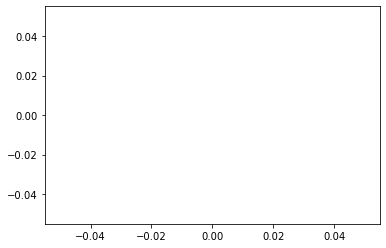

In [1353]:
# Separate bridge and non bridge data
bridge_presence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge ==1] 
bridge_presence.slope.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

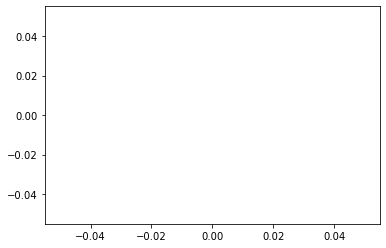

In [1354]:
bridge_presence['slope']=0
bridge_presence.slope.plot()

In [1355]:
bridge_absence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge==0] 
bridge_absence.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0     17013477.0       0  LINESTRING (914043.093 387162.591, 914046.650 ...   
1     17013477.0       0  LINESTRING (914155.671 387247.126, 914148.669 ...   
2     17013477.0       0  LINESTRING (914142.646 387232.603, 914154.399 ...   
3     17018830.0       0  LINESTRING (939789.889 397878.035, 939956.578 ...   
4     17018830.0       0  LINESTRING (939788.385 397808.356, 939252.118 ...   

      slope  index_right  
0  1.875901          216  
1  6.076998          216  
2  0.936850          216  
3  0.774079          118  
4  0.990104          118

In [1356]:
# now join again
buffer_clip_slope3=pd.concat([bridge_presence,bridge_absence])
# put the cap for the slope as maximum 25%
buffer_clip_slope3=buffer_clip_slope3[buffer_clip_slope3['slope']<25]
buffer_clip_slope3.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0     17013477.0       0  LINESTRING (914043.093 387162.591, 914046.650 ...   
1     17013477.0       0  LINESTRING (914155.671 387247.126, 914148.669 ...   
2     17013477.0       0  LINESTRING (914142.646 387232.603, 914154.399 ...   
3     17018830.0       0  LINESTRING (939789.889 397878.035, 939956.578 ...   
4     17018830.0       0  LINESTRING (939788.385 397808.356, 939252.118 ...   

      slope  index_right  
0  1.875901          216  
1  6.076998          216  
2  0.936850          216  
3  0.774079          118  
4  0.990104          118

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

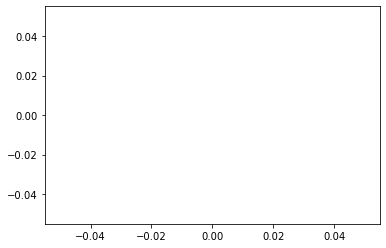

In [1357]:
check=buffer_clip_slope3[buffer_clip_slope3['bridge']== 1]
check.slope.plot()

In [1358]:
# Now calculate the mean slope for each count location
output_slope=buffer_clip_slope3.groupby(by=['osm_id_sensor'])['slope'].mean().reset_index()
output_slope.columns=['osm_id','slope']
output_slope.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     slope
0  17013477.0  2.963250
1  17018830.0  0.882091
2  17022894.0  0.361140
3  17022948.0  3.763412
4  17024738.0  4.036532

# Import Weather Daily level data from weather underground website Using python coding

1. https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
2. https://bojanstavrikj.github.io/content/page1/wunderground_scraper

In [1359]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!pip install webdriver-manager
#!pip install chromedriver 
#!pip3 install webdrivermanager


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1360]:
from bs4 import BeautifulSoup as BS #conda install -c anaconda beautifulsoup4 
from selenium import webdriver
from functools import reduce
import pandas as pd
import time

In [1361]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from os import system as System
from webdriver_manager.utils import ChromeType
#from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [1362]:
    def render_page(url):
        options = Options()
        options.add_argument("user-data-dir=C:\\Users\\mxm5116\\Desktop\\Profile 1")
        driver = webdriver.Chrome(executable_path=r'C:/Program Files/Google/Chrome/Application/chromedriver_win32/chromedriver.exe', chrome_options=options)
        driver.get(url)
        time.sleep(3)
        r = driver.page_source
        driver.quit()
        return r  

In [1363]:
# driver =webdriver.Chrome(r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')
# driver = webdriver.Firefox(executable_path=r'C:\Users\mxm5116\Downloads\geckodriver-v0.29.0-win64\geckodriver.exe')
#chrome_options = Options()
# chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')

#driver.get(r'https://www.google.com')
#time.sleep(5)
#r = driver.page_source
#print(r)

In [1364]:
#def render_page(url):
#        chrome_options = Options()
#        chrome_options.add_argument('--headless')
#        chrome_options.add_argument('--no-sandbox')
#        chrome_options.add_argument('--disable-dev-shm-usage')
#        driver = webdriver.Chrome("executable_path=r"C:/Users/mxm5116/Downloads/chromedriver_win32/chromedriver.exe")
#        driver.get(url)
#        time.sleep(3)
#        r = driver.page_source
#        driver.quit()
#       return r

In [1365]:
  def scraper(page, dates):
        output = pd.DataFrame()

        for d in dates:

            url = str(str(page) + str(d))
            print(url)

            r = render_page(url)
            print(r)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)

        print('Scraper done!')

        output = output[['Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                         'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                         'Pres_avg', 'Pres_min', 'Precipitation', 'Date']]

        return output


# Please input the date and page link to extract the data for your study area here

In [1366]:
dates = ['2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12']
# insert the date you want to extract the data
page = 'https://www.wunderground.com/history/monthly/us/or/portland/KPDX/date/'
# insert your study location link here
#df_output = scraper(page,dates)

In [1367]:
w19=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/boulder_weather.csv")
w19.head()

Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  Hum_max  Hum_avg  Hum_min  \
0       6.4         3        4      0.7       -2       88     77.9       65   
1      19.3         1       13      5.9       -3       88     61.3       28   
2      32.0        12       19     14.2        5       81     53.2       22   
3      38.8        21       22     18.3       15       89     48.6       20   
4      40.7        23       20     18.6       16       74     44.2       23   

   Wind_max  Wind_avg  Wind_min  Pres_max  Pres_avg  Pres_min  Precipitation  \
0        13       5.6         0      25.2      25.1      25.0            0.0   
1         9       3.7         0      25.0      25.0      25.0            0.0   
2         8       3.7         0      25.0      24.9      24.9            0.0   
3         9       4.8         0      25.0      25.0      24.9            0.0   
4        10       5.6         0      25.0      24.9      24.9            0.0   

       Date  
0  2019-1-1  
1  2019-1-2  
2  2019-1-3  
3  2019-1-4  
4  2019-1-5

In [1368]:
output_weather=w19.loc[:, ['Temp_avg', 'Hum_avg','Precipitation']]
output_weather

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg  Hum_avg  Precipitation
0         6.4     77.9           0.00
1        19.3     61.3           0.00
2        32.0     53.2           0.00
3        38.8     48.6           0.00
4        40.7     44.2           0.00
..        ...      ...            ...
359      28.6     88.2           0.00
360      26.0     86.2           0.01
361      24.6     49.2           0.00
362      20.2     60.9           0.00
363      22.8     65.9           0.00

[364 rows x 3 columns]

In [1369]:
output_weather.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg         float64
Hum_avg          float64
Precipitation    float64
dtype: object

In [1370]:
# Convert object to float
output_weather2=output_weather.astype(str).astype(float)

In [1371]:
output_weather2.isnull().values.any()

False

In [1372]:
# Take the average for annual
output_weather3=output_weather2.mean()
output_weather3

Temp_avg         47.495330
Hum_avg          60.606044
Precipitation     0.021209
dtype: float64

# Aggregate all output together in a dataframe

In [1373]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
df_all = [emerging_data,output_bikecom,output_lane,output_intersection_density1a,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_intersection_density1,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway,output_bikeway_all_lane,output_bikeway_all_track, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_bridge,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1,output_slope]

In [1374]:
#Merge by ID
df_merged_eco_short = reduce(lambda  left,right: pd.merge(left,right,on=['osm_id'],
                                            how='left'), df_all)
df_merged_eco_short=df_merged_eco_short.drop_duplicates(subset='site_id')
df_merged_eco_short.head()

osm_id  site_id sensor_type       AADBT     stv_adb  stv_c_adb  \
0  385509341.0  P001BOU   permanent  206.745402  102.547945  14.027397   
1   43176757.0  P002BOU   permanent  479.543452   29.739726  10.452055   
2  439968204.0  P003BOU   permanent  607.273809   52.397260  16.424658   
3   43313642.0  P004BOU   permanent  502.851786   29.904110   9.972603   
4   46148772.0  P005BOU   permanent  601.530238   20.808219   9.095890   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0    218.0        0.458700       0.006019                     1.312285  ...   
1   5359.0      136.470572      17.000804                    12.457487  ...   
2   4518.0      138.143676      12.400563                     8.976569  ...   
3   3750.0      235.652820      44.874348                    19.042568  ...   
4   2382.0       86.426472       8.437731                     9.762901  ...   

   pct_female Student Access  pct_at_least_college_education  Median Age  \
0   44.711991       0.060714                       93.253283   48.487382   
1   46.045367     152.627021                       95.630072   23.590715   
2   55.921386      40.041576                       94.384203   35.744291   
3   47.817023     127.260629                       97.825260   24.350659   
4   45.970696      28.808824                       95.475638   34.200000   

   Median_HH_income   HH_density  population_density  employment_density  \
0     117396.325272    65.313228          165.473110           76.575350   
1      39434.425420  3755.901854        11287.463573         6401.319674   
2      41222.151109  3589.245613         7441.048613         5017.901342   
3      37184.313762  5522.091477        11922.936346         8777.009693   
4      87313.000000  1722.670565         3800.315671         2634.467915   

   Number of jobs     slope  
0        0.690462  1.484353  
1      152.964946  3.127135  
2       22.741271  0.664353  
3      598.460515  0.718577  
4     2617.428072  1.200773  

[5 rows x 82 columns]

In [1375]:
#dfs = [df1, df2, df3, df4, df5] 
#from functools import partial 
#outer_merge = partial(pd.merge, how='left') 
#reduce(outer_merge, df_all )

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1376]:
# Add weather data in this new data frame
df_merged_eco_short['Temp_avg'] = pd.Series(output_weather3.Temp_avg, index=df_merged_eco_short.index)
df_merged_eco_short['Hum_avg '] = pd.Series(output_weather3.Hum_avg , index=df_merged_eco_short.index)
df_merged_eco_short['Precipitation'] = pd.Series(output_weather3.Precipitation, index=df_merged_eco_short.index)
df_merged_eco_short.head()

osm_id  site_id sensor_type       AADBT     stv_adb  stv_c_adb  \
0  385509341.0  P001BOU   permanent  206.745402  102.547945  14.027397   
1   43176757.0  P002BOU   permanent  479.543452   29.739726  10.452055   
2  439968204.0  P003BOU   permanent  607.273809   52.397260  16.424658   
3   43313642.0  P004BOU   permanent  502.851786   29.904110   9.972603   
4   46148772.0  P005BOU   permanent  601.530238   20.808219   9.095890   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0    218.0        0.458700       0.006019                     1.312285  ...   
1   5359.0      136.470572      17.000804                    12.457487  ...   
2   4518.0      138.143676      12.400563                     8.976569  ...   
3   3750.0      235.652820      44.874348                    19.042568  ...   
4   2382.0       86.426472       8.437731                     9.762901  ...   

   Median Age Median_HH_income   HH_density  population_density  \
0   48.487382    117396.325272    65.313228          165.473110   
1   23.590715     39434.425420  3755.901854        11287.463573   
2   35.744291     41222.151109  3589.245613         7441.048613   
3   24.350659     37184.313762  5522.091477        11922.936346   
4   34.200000     87313.000000  1722.670565         3800.315671   

   employment_density  Number of jobs     slope  Temp_avg   Hum_avg   \
0           76.575350        0.690462  1.484353  47.49533  60.606044   
1         6401.319674      152.964946  3.127135  47.49533  60.606044   
2         5017.901342       22.741271  0.664353  47.49533  60.606044   
3         8777.009693      598.460515  0.718577  47.49533  60.606044   
4         2634.467915     2617.428072  1.200773  47.49533  60.606044   

   Precipitation  
0       0.021209  
1       0.021209  
2       0.021209  
3       0.021209  
4       0.021209  

[5 rows x 85 columns]

In [1377]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco_short, 'Eco_short_2019_updated_Boulder_0.1_mile_network_buffer_data.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Use Keplergl to produce dynamic Map for all variables

In [1378]:
# Make dynamic visualization
#!pip install keplergl

In [1379]:
ecoshort.head(5)

site_id                      site_name sensor_type  year   region  \
0   P001BOU  B90004 US 36 North of Boulder   permanent  2019  Boulder   
7   P002BOU        Folsom at Boulder Creek   permanent  2019  Boulder   
14  P003BOU                 Folsom at Pine   permanent  2019  Boulder   
21  P004BOU            Folsom at South St.   permanent  2019  Boulder   
28  P005BOU       Eco-Totem 13th at Walnut   permanent  2019  Boulder   

    travel_pattern       AADBT     stv_adb  stv_c_adb  stl_raw  ...  \
0              3.0  206.745402  102.547945  14.027397    218.0  ...   
7              2.0  479.543452   29.739726  10.452055   5359.0  ...   
14             1.0  607.273809   52.397260  16.424658   4518.0  ...   
21             2.0  502.851786   29.904110   9.972603   3750.0  ...   
28             2.0  601.530238   20.808219   9.095890   2382.0  ...   

    osm_id_sensor  buff_dist                       geometry  \
0     385509341.0        2.0  POINT (932901.665 386478.901)   
7      43176757.0        2.0  POINT (934626.854 380273.771)   
14    439968204.0        2.0  POINT (934566.338 381533.917)   
21     43313642.0        2.0  POINT (934625.443 380996.780)   
28     46148772.0        2.0  POINT (933316.523 380773.375)   

    min_dist_to_school min_dist_to_college min_dist_to_university  lanes  \
0          5155.748831        22889.223647           14959.494580      2   
7          2995.203388         3427.045328            1166.086558      3   
14         1809.498034         6857.187175            3806.818604      1   
21         1954.097262         5322.953049            2219.966504      4   
28         1671.759654         4333.880131            3434.960037      1   

    maxspeed  min_dist_to_polygon min_dist_to_CBD  
0       55.0          1988.820553    19492.883148  
7       30.0           437.747658     4769.321567  
14      20.0          1193.369394     5537.399582  
21      30.0          2274.703848     4910.170002  
28      20.0          2400.267766      843.437835  

[5 rows x 23 columns]

In [1380]:
ecoshort_selected=ecoshort.loc[:,["osm_id_sensor","geometry"]]
ecoshort_selected
print(ecoshort_selected.crs)

epsg:2772


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1381]:
# set the co-ordinate system first
ecoshort_selected1 = ecoshort_selected.set_crs("EPSG:2772")
# Let's take a copy of our layer
ecoshort_selected_3D = ecoshort_selected1.copy()

# Reproject the geometries by replacing the values with projected ones
ecoshort_selected_3D  = ecoshort_selected_3D .to_crs(epsg=4211) # Initially given
ecoshort_selected_3D.head()

osm_id_sensor                     geometry
0     385509341.0  POINT (-105.28313 40.06877)
7      43176757.0  POINT (-105.26310 40.01285)
14    439968204.0  POINT (-105.26377 40.02420)
21     43313642.0  POINT (-105.26310 40.01936)
28     46148772.0  POINT (-105.27844 40.01738)

In [1382]:
ecoshort_selected_3D['Lon'] = ecoshort_selected_3D.geometry.x
ecoshort_selected_3D['Lat'] = ecoshort_selected_3D.geometry.y
ecoshort_selected_3D=ecoshort_selected_3D.drop(['geometry'],axis=1)
ecoshort_selected_3D.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         Lon        Lat
0     385509341.0 -105.283132  40.068772
7      43176757.0 -105.263103  40.012846
14    439968204.0 -105.263773  40.024197
21     43313642.0 -105.263097  40.019358
28     46148772.0 -105.278436  40.017376

In [1383]:
ecoshort_selected_3D.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    float64
Lon              float64
Lat              float64
dtype: object

In [1384]:
print(gdf1.crs)
# set the co-ordinate system first
gdf_selected1 = gdf1.set_crs("EPSG:2772")

# Reproject the geometries by replacing the values with projected ones
gdf_selected_3D  = gdf_selected1.to_crs(epsg=4211) # Initially given
gdf_selected_3D=gdf_selected_3D.loc[:,["osm_id_sensor","geometry"]]
gdf_selected_3D['geometry'] = gdf_selected_3D['geometry'].apply(shapely.geometry.shape)
gdf_selected_3D
newdf=(pd.merge(ecoshort_selected_3D, gdf_selected_3D, left_on='osm_id_sensor', right_on='osm_id_sensor', how='inner'))
buffer_vis=newdf
buffer_vis.columns=['osm_id_sensor','Lon','Lat','geometry']
buffer_vis.head()

epsg:2772


osm_id_sensor         Lon        Lat  \
0    385509341.0 -105.283132  40.068772   
1     43176757.0 -105.263103  40.012846   
2    439968204.0 -105.263773  40.024197   
3     43313642.0 -105.263097  40.019358   
4     46148772.0 -105.278436  40.017376   

                                            geometry  
0  POLYGON ((-105.28181 40.06686, -105.28180 40.0...  
1  POLYGON ((-105.26350 40.01109, -105.26351 40.0...  
2  POLYGON ((-105.26438 40.02321, -105.26442 40.0...  
3  POLYGON ((-105.26247 40.01753, -105.26250 40.0...  
4  POLYGON ((-105.27878 40.01600, -105.27885 40.0...

In [1385]:
# Make a copy of our data frame to visualize it
df_dynamic=df_merged_eco_short.copy()
#cols = df_dynamic.columns
#df_dynamic[cols[1:]] = df_dynamic[cols[1:]].astype(str).astype(float)
#df_dynamic
# Bring the buffer geometry
df_dynamic1=(pd.merge(df_dynamic, buffer_vis, left_on='osm_id', right_on='osm_id_sensor', how='inner'))
df_dynamic1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT     stv_adb  stv_c_adb  \
0  385509341.0  P001BOU   permanent  206.745402  102.547945  14.027397   
1   43176757.0  P002BOU   permanent  479.543452   29.739726  10.452055   
2  439968204.0  P003BOU   permanent  607.273809   52.397260  16.424658   
3   43313642.0  P004BOU   permanent  502.851786   29.904110   9.972603   
4   46148772.0  P005BOU   permanent  601.530238   20.808219   9.095890   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0    218.0        0.458700       0.006019                     1.312285  ...   
1   5359.0      136.470572      17.000804                    12.457487  ...   
2   4518.0      138.143676      12.400563                     8.976569  ...   
3   3750.0      235.652820      44.874348                    19.042568  ...   
4   2382.0       86.426472       8.437731                     9.762901  ...   

   employment_density Number of jobs     slope  Temp_avg   Hum_avg   \
0           76.575350       0.690462  1.484353  47.49533  60.606044   
1         6401.319674     152.964946  3.127135  47.49533  60.606044   
2         5017.901342      22.741271  0.664353  47.49533  60.606044   
3         8777.009693     598.460515  0.718577  47.49533  60.606044   
4         2634.467915    2617.428072  1.200773  47.49533  60.606044   

   Precipitation  osm_id_sensor         Lon        Lat  \
0       0.021209    385509341.0 -105.283132  40.068772   
1       0.021209     43176757.0 -105.263103  40.012846   
2       0.021209    439968204.0 -105.263773  40.024197   
3       0.021209     43313642.0 -105.263097  40.019358   
4       0.021209     46148772.0 -105.278436  40.017376   

                                            geometry  
0  POLYGON ((-105.28181 40.06686, -105.28180 40.0...  
1  POLYGON ((-105.26350 40.01109, -105.26351 40.0...  
2  POLYGON ((-105.26438 40.02321, -105.26442 40.0...  
3  POLYGON ((-105.26247 40.01753, -105.26250 40.0...  
4  POLYGON ((-105.27878 40.01600, -105.27885 40.0...  

[5 rows x 89 columns]

In [1386]:
#buffer_vis=gdf1.loc[:,['osm_id_sensor','geometry']]
#buffer_vis.columns=['osm_id','geometry']
#buffer_vis

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1387]:
pd.DataFrame.to_csv(df_dynamic1, 'keplergl_2019_Network_buffer_0.1_mile_eco_short_Boulder.csv', sep=',', na_rep='0', index=False)


In [1388]:
# We do not have any null point. lets plot the map
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [1389]:
#cols = df_dynamic1.columns
#df_dynamic1[cols[1:]] = df_dynamic1[cols[1:]].astype(str).astype(float)
#df_dynamic1

In [1390]:
#from shapely import wkt
#df_dynamic1['str_geom'] = df_dynamic1.geometry.apply(lambda x: wkt.dumps(x))
#df_dynamic1=df_dynamic1.drop(['geometry'],axis=1)
#df_dynamic1
#df_dynamic1.rename(columns={'str_geom':'geometry'}, inplace=True)
#df_dynamic1

In [1391]:
#df_dynamic1.dtypes

In [1392]:
#df_dynamic2=df_dynamic1.drop(["geometry"],axis=1)
#df_dynamic3=df_dynamic1.copy()
#df_dynamic3['geometry'] = df_dynamic3['geometry'].apply(shapely.geometry.shape)
#df_dynamic3

In [1393]:
# Load a map with data and config and height
from keplergl import KeplerGl
data=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Boulder/Boulder,CO/keplergl_2019_Network_buffer_0.1_mile_eco_short_Boulder.csv")
data=data.fillna(0)
map_2 = KeplerGl(height=500, data={"data_1":data})
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':          osm_id  site_id sensor_type        AADBT     stv_adb  stv_c_adb  \
0   38550…

In [1394]:
data.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT     stv_adb  stv_c_adb  \
0  385509341.0  P001BOU   permanent  206.745402  102.547945  14.027397   
1   43176757.0  P002BOU   permanent  479.543452   29.739726  10.452055   
2  439968204.0  P003BOU   permanent  607.273809   52.397260  16.424658   
3   43313642.0  P004BOU   permanent  502.851786   29.904110   9.972603   
4   46148772.0  P005BOU   permanent  601.530238   20.808219   9.095890   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0    218.0        0.458700       0.006019                     1.312285  ...   
1   5359.0      136.470572      17.000804                    12.457487  ...   
2   4518.0      138.143676      12.400563                     8.976569  ...   
3   3750.0      235.652820      44.874348                    19.042568  ...   
4   2382.0       86.426472       8.437731                     9.762901  ...   

   employment_density  Number of jobs     slope  Temp_avg   Hum_avg   \
0           76.575350        0.690462  1.484353  47.49533  60.606044   
1         6401.319674      152.964946  3.127135  47.49533  60.606044   
2         5017.901342       22.741271  0.664353  47.49533  60.606044   
3         8777.009693      598.460515  0.718577  47.49533  60.606044   
4         2634.467915     2617.428072  1.200773  47.49533  60.606044   

   Precipitation  osm_id_sensor         Lon        Lat  \
0       0.021209    385509341.0 -105.283132  40.068772   
1       0.021209     43176757.0 -105.263103  40.012846   
2       0.021209    439968204.0 -105.263773  40.024197   
3       0.021209     43313642.0 -105.263097  40.019358   
4       0.021209     46148772.0 -105.278436  40.017376   

                                            geometry  
0  POLYGON ((-105.2818069065859 40.06686133883894...  
1  POLYGON ((-105.2634993278267 40.01109395472456...  
2  POLYGON ((-105.2643837736208 40.02321081355451...  
3  POLYGON ((-105.2624673680022 40.01753027179216...  
4  POLYGON ((-105.2787776832485 40.01599621662248...  

[5 rows x 89 columns]

In [1395]:
# save as htm file
map_2.save_to_html(file_name="Eco_short_2019_Boulder_0.1_mile_network_buffer.html")

Map saved to Eco_short_2019_Boulder_0.1_mile_network_buffer.html!


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1396]:
#conda list ipython

In [1397]:
end = time.time()
print("Tune Fit Time:", end - start)

Tune Fit Time: 906.5341031551361


# Keplergl Dynamic map is done----END

# Run Random Forest to filter the variables

# Run Negative Binomial Model to predict the AADBT